In [1]:
#pip install wordcloud
#pip install textblob

In [2]:
import pandas as pd 
import numpy as np

#stats
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud , STOPWORDS
from PIL import Image # whenever we are dealing with images .

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

import textblob
import xgboost

from textblob import TextBlob

In [3]:
# read yelp.csv into a DataFrame
yelp = pd.read_excel('C:/Users/ashis/OneDrive/Documents/Data Science 360 Assignment/Machine learning/Case Study - 5/Womens Clothing Reviews Data.xlsx')

### Exploratory Data Analysis :

In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [5]:
yelp.rename({'Recommend Flag' : 'Recommend_Flag', 'Customer Age':'Customer_Age','Review Title':'Review_Title','Review Text':'Review_Text'}, axis =1 ,inplace = True)

In [6]:
yelp.head(5)

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [7]:
yelp.isna().mean()  

Product ID        0.000000
Category          0.000596
Subcategory1      0.000596
SubCategory2      0.000596
Location          0.000000
Channel           0.000000
Customer_Age      0.000000
Review_Title      0.162224
Review_Text       0.035979
Rating            0.000000
Recommend_Flag    0.000000
dtype: float64

### Predicting Missing Value :


In [8]:
yelp = yelp.apply(lambda x: x.fillna(x.mode()[0]))

In [9]:
yelp.isna().mean()

Product ID        0.0
Category          0.0
Subcategory1      0.0
SubCategory2      0.0
Location          0.0
Channel           0.0
Customer_Age      0.0
Review_Title      0.0
Review_Text       0.0
Rating            0.0
Recommend_Flag    0.0
dtype: float64

In [10]:
#Duplicate Rows
yelp[yelp.duplicated()]

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag
5671,861,General,Tops,Knits,Gurgaon,Web,34,Love it!,Perfect fit and i've gotten so many compliment...,5,1
18747,828,General Petite,Tops,Blouses,Gurgaon,Web,46,Love it!,Perfect fit and i've gotten so many compliment...,5,1
23480,862,General Petite,Tops,Knits,Gurgaon,Web,35,Love it!,Perfect fit and i've gotten so many compliment...,5,1


In [11]:
#Dropping duplicate rows
yelp.drop_duplicates(inplace = True, ignore_index = True)

In [12]:
# Percentage of Ratings :
yelp.Rating.value_counts()/yelp.Rating.value_counts().sum()

5    0.559043
4    0.216199
3    0.122259
2    0.066644
1    0.035856
Name: Rating, dtype: float64

In [13]:
# Percentage of Recommendation :
yelp.Recommend_Flag.value_counts()/yelp.Recommend_Flag.value_counts().sum()

1    0.82234
0    0.17766
Name: Recommend_Flag, dtype: float64

In [14]:
yelp.Review_Text

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23478    I was very happy to snag this dress at such a ...
23479    It reminds me of maternity clothes. soft, stre...
23480    This fit well, but the top was very see throug...
23481    I bought this dress for a wedding i have this ...
23482    This dress in a lovely platinum is feminine an...
Name: Review_Text, Length: 23483, dtype: object

In [15]:
# Maximum length of Review :
yelp.Review_Text.apply(len).max() 

572

In [16]:
# Minimum length of Review :
yelp.Review_Text.apply(len).min() # someone write min. length of review
# as we can ignore this review bcz we can't understand from one word . 

9

In [17]:
# Number of words in review :
yelp.Review_Text.apply(lambda x: len(str(x).split())) # split will break sentence into words  .

0         8
1        62
2        98
3        22
4        36
         ..
23478    28
23479    38
23480    42
23481    86
23482    19
Name: Review_Text, Length: 23483, dtype: int64

In [18]:
# Number of distinct word present in review : 

yelp.Review_Text.apply(lambda x: len(set(str(x).split())))
# split will break sentence into words & set will break into distinct words .
# this is neccesary bcz someone is write a review but not serious abt it , so they will repeat words . 
# so we can easily tell which review we should consider for our analysis .

0         7
1        47
2        72
3        20
4        28
         ..
23478    23
23479    36
23480    36
23481    65
23482    18
Name: Review_Text, Length: 23483, dtype: int64

### Text Cleaning :

##### Converting Text into lower case 

In [19]:
cols = yelp.select_dtypes('object').columns
cols

Index(['Category', 'Subcategory1', 'SubCategory2', 'Location', 'Channel',
       'Review_Title', 'Review_Text'],
      dtype='object')

In [20]:
 yelp[cols] = yelp[cols].applymap (lambda x: x.lower())

In [21]:
yelp.head(2)

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag
0,767,initmates,intimate,intimates,mumbai,mobile,33,love it!,absolutely wonderful - silky and sexy and comf...,4,1
1,1080,general,dresses,dresses,bangalore,mobile,34,love it!,love this dress! it's sooo pretty. i happene...,5,1


####  Removing digits :

In [22]:
yelp[cols] = yelp[cols].applymap(lambda x: re.sub(r'\d', '', x))

In [23]:
 yelp.head(2)

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag
0,767,initmates,intimate,intimates,mumbai,mobile,33,love it!,absolutely wonderful - silky and sexy and comf...,4,1
1,1080,general,dresses,dresses,bangalore,mobile,34,love it!,love this dress! it's sooo pretty. i happene...,5,1


#### Removing Character:

In [24]:
yelp[cols] = yelp[cols].applymap(lambda x: re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", x))
yelp.head(3)

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag
0,767,initmates,intimate,intimates,mumbai,mobile,33,love it,absolutely wonderful silky and sexy and comfo...,4,1
1,1080,general,dresses,dresses,bangalore,mobile,34,love it,love this dress its sooo pretty i happened t...,5,1
2,1077,general,dresses,dresses,gurgaon,mobile,60,some major design flaws,i had such high hopes for this dress and reall...,3,0


#### <a> Removing Single Characters

In [25]:
yelp[cols] = yelp[cols].applymap(lambda x: re.sub(r'\s+[a-zA-Z]\s+', ' ', x))
yelp[cols].head(2)

,Category,Subcategory1,SubCategory2,Location,Channel,Review_Title,Review_Text
0,initmates,intimate,intimates,mumbai,mobile,love it,absolutely wonderful silky and sexy and comfo...
1,general,dresses,dresses,bangalore,mobile,love it,love this dress its sooo pretty happened to f...


#### <a>Removing Line Breaks and Extra Spaces

In [26]:
yelp[cols] = yelp[cols].applymap(lambda x: ' '.join(x.split()))

In [27]:
yelp[cols].head(2)

,Category,Subcategory1,SubCategory2,Location,Channel,Review_Title,Review_Text
0,initmates,intimate,intimates,mumbai,mobile,love it,absolutely wonderful silky and sexy and comfor...
1,general,dresses,dresses,bangalore,mobile,love it,love this dress its sooo pretty happened to fi...


#### <a>Removing StopWords

In [28]:
def remove_stopwords(text): 
    sw = set(stopwords.words('English'))
    x = text.split()
    new_text = [i for i in x if i not in sw]
    return ' '.join(new_text)

In [29]:
yelp[cols] = yelp[cols].applymap(remove_stopwords)
yelp[cols].head(2)

,Category,Subcategory1,SubCategory2,Location,Channel,Review_Title,Review_Text
0,initmates,intimate,intimates,mumbai,mobile,love,absolutely wonderful silky sexy comfortable
1,general,dresses,dresses,bangalore,mobile,love,love dress sooo pretty happened find store im ...


#### <a>Lemmitization

In [30]:
import nltk

In [31]:
from nltk.corpus import stopwords

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
lemm = WordNetLemmatizer()
yelp[cols] = yelp[cols].applymap(lambda x: ' '.join([lemm.lemmatize(word, pos = 'v') for word in x.split()]))

In [35]:
yelp[cols].head(2)

,Category,Subcategory1,SubCategory2,Location,Channel,Review_Title,Review_Text
0,initmates,intimate,intimate,mumbai,mobile,love,absolutely wonderful silky sexy comfortable
1,general,dress,dress,bangalore,mobile,love,love dress sooo pretty happen find store im gl...


In [36]:
yelp.head(2)

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag
0,767,initmates,intimate,intimate,mumbai,mobile,33,love,absolutely wonderful silky sexy comfortable,4,1
1,1080,general,dress,dress,bangalore,mobile,34,love,love dress sooo pretty happen find store im gl...,5,1


In [37]:
# Now I'm doing for all DataFrame i.e. every individual review .
yelp['sentiment_score'] =  yelp.Review_Text.apply(lambda x: TextBlob(x).sentiment.polarity)

In [38]:
yelp.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag,sentiment_score
0,767,initmates,intimate,intimate,mumbai,mobile,33,love,absolutely wonderful silky sexy comfortable,4,1,0.633333
1,1080,general,dress,dress,bangalore,mobile,34,love,love dress sooo pretty happen find store im gl...,5,1,0.318750
2,1077,general,dress,dress,gurgaon,mobile,60,major design flaw,high hop dress really want work initially orde...,3,0,0.082300
3,1049,general petite,bottom,pant,chennai,web,50,favorite buy,love love love jumpsuit fun flirty fabulous ev...,5,1,0.500000
4,847,general,top,blouses,bangalore,web,47,flatter shirt,shirt flatter due adjustable front tie perfect...,5,1,0.458333


In [39]:
Positive_review = yelp.Review_Text[yelp.Rating>=4]
Negative_review = yelp.Review_Text[yelp.Rating<3]

In [40]:
Positive_review

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happen find store im gl...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flatter due adjustable front tie perfect...
6        aded basket hte last mintue see would look lik...
                               ...                        
23474    bottom cute defiantly cheeky would recommend s...
23475    im impress beautiful color combinations embroi...
23477    wasnt sure order skirt couldnt see person firs...
23478    happy snag dress great price easy slip flatter...
23482    dress lovely platinum feminine fit perfectly e...
Name: Review_Text, Length: 18205, dtype: object

In [41]:
Negative_review

5        love tracy reese dress one petite feet tall us...
22       first pullover style side zipper wouldnt purch...
26       wait sweater coat ship weeks excite arrive coa...
33       order months ago finally come back order huge ...
56       pregnant think would great sleep bra soft fit ...
                               ...                        
23404    excite find fun lightweight white dress spring...
23422    order note review say sheer think would wear l...
23425    draw shirt beautiful silver gold embroidery fr...
23435    dress cute photo fit true size material slinky...
23476    surprise positive review product terrible cut ...
Name: Review_Text, Length: 2407, dtype: object

#### WordCloud For Positive and Negative Review :

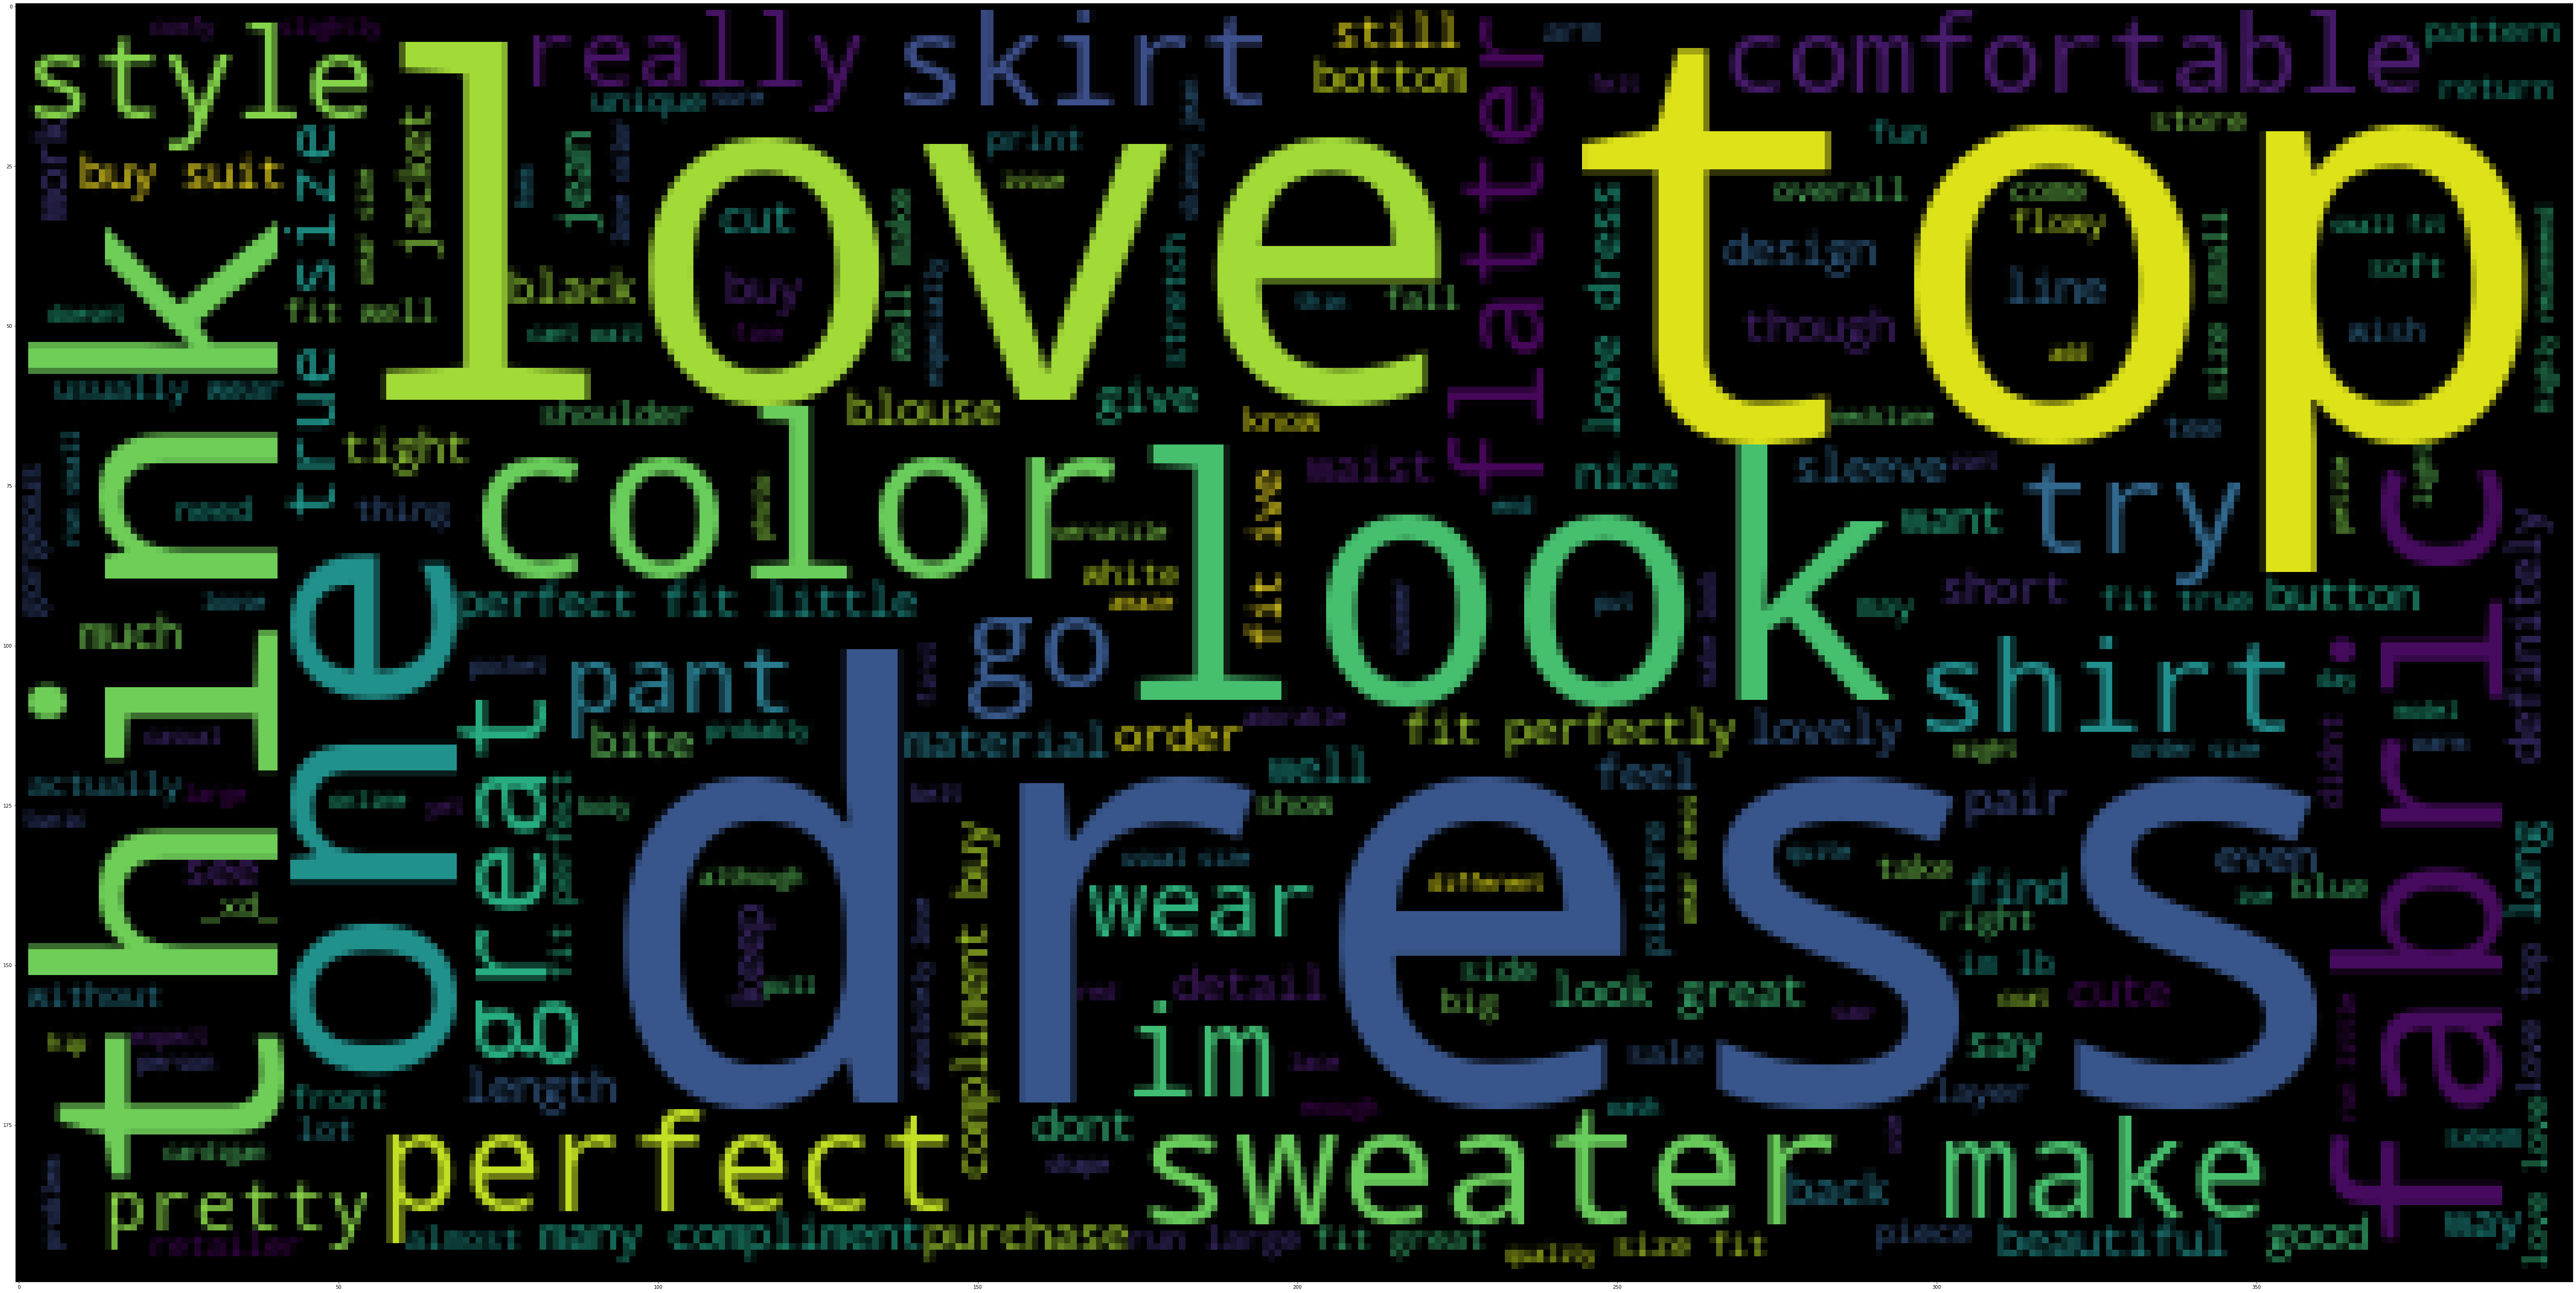

In [42]:
wordcloud = WordCloud().generate(' '.join(Positive_review.tolist()))# we create this on the basis of text.not on the basis of count .
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

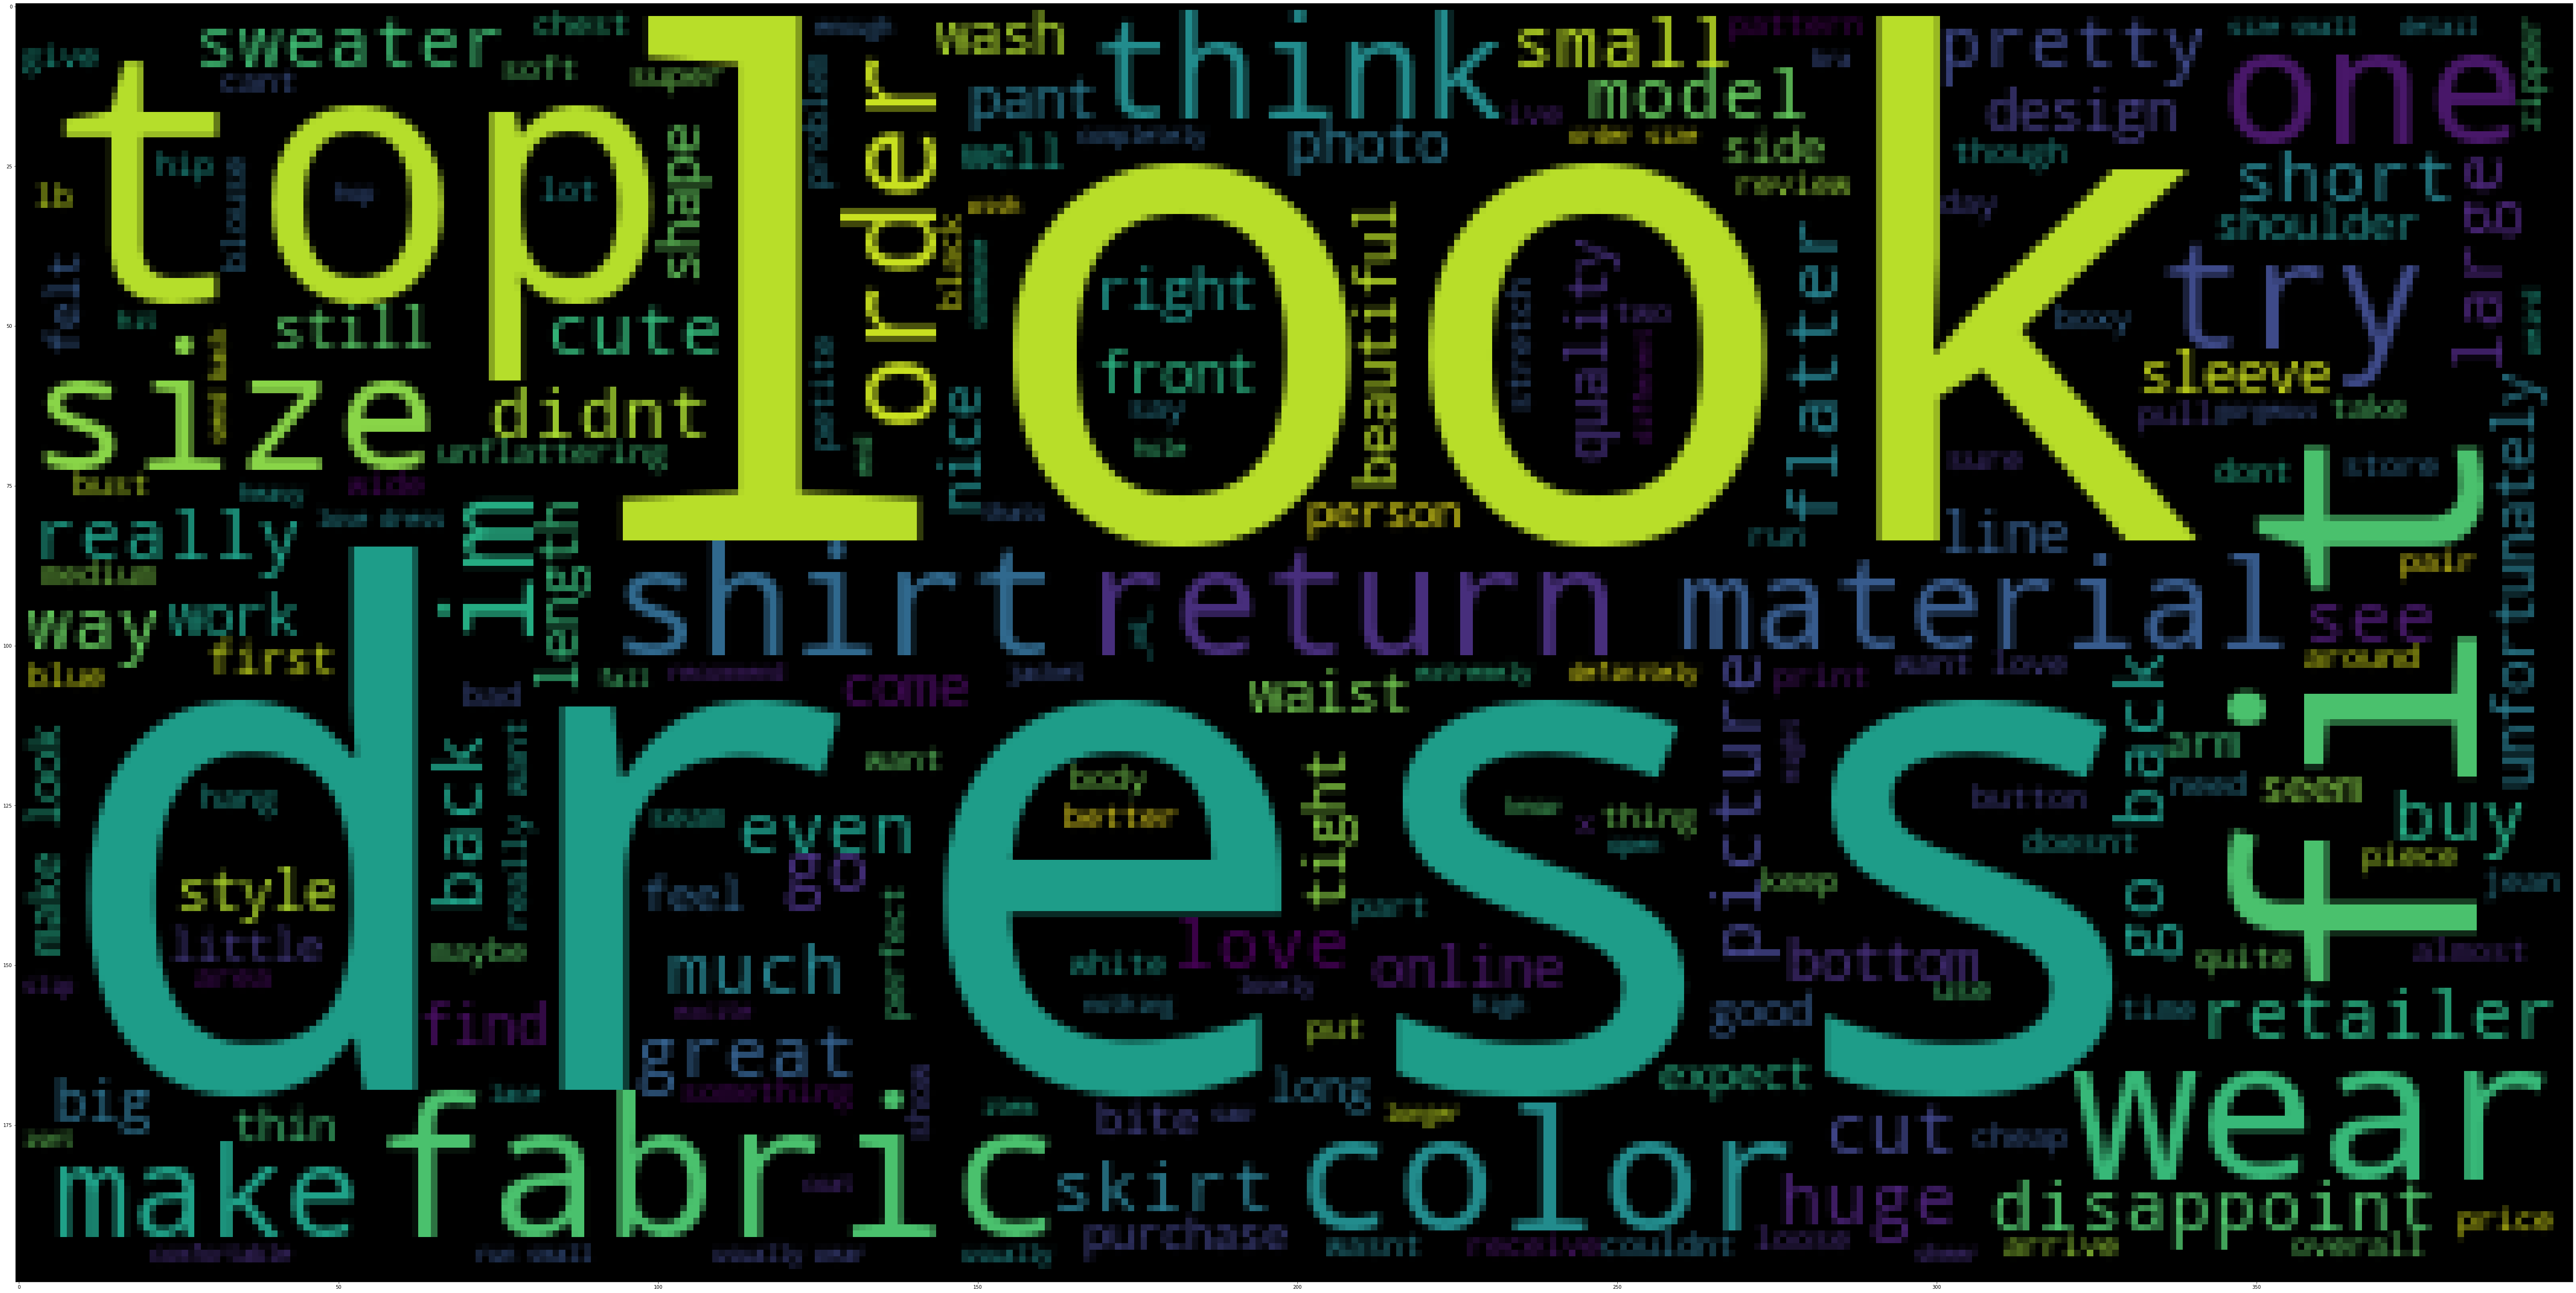

In [43]:
wordcloud = WordCloud().generate(' '.join(Negative_review.tolist()))# we create this on the basis of text.not on the basis of count .
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

In [44]:
#Train

count_vect = CountVectorizer(analyzer='word',max_features = 2000, min_df = 0.05, max_df = 0.95,
                stop_words = stopwords.words('english'))
Positive_review_count = count_vect.fit_transform(Positive_review)
Positive_review_dtm=pd.DataFrame(Positive_review_count.todense(), columns = count_vect.get_feature_names_out())



In [45]:
count_vect = CountVectorizer(analyzer='word', max_features = 2000, min_df = 0.05, max_df = 0.95,
                stop_words = stopwords.words('english'))
Negative_review_count = count_vect.fit_transform(Negative_review)
Negative_review_dtm=pd.DataFrame(Negative_review_count.todense(), columns = count_vect.get_feature_names_out())

#### <a> Bar Plot for Positive & Negative Reviews with Top 15 words :

<AxesSubplot:>

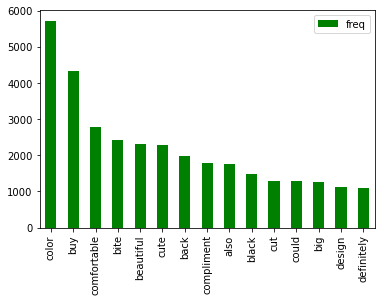

In [46]:
word_freq = pd.DataFrame(Positive_review_dtm.apply(sum).head(15), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)
word_freq.plot(kind='bar', color='Green')

<AxesSubplot:>

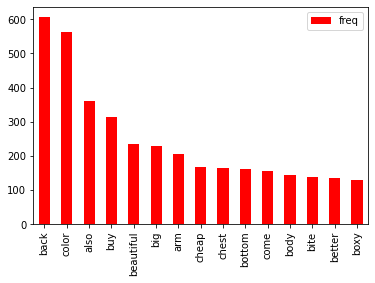

In [47]:
#fig = plt.figure(figsize=(200,50))
word_freq = pd.DataFrame(Negative_review_dtm.apply(sum).head(15), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)
word_freq.plot(kind='bar', color='red')

#### Understand Sentiment Among Customer on different categories , sub category , products by location & age groups :

<AxesSubplot:xlabel='Category'>

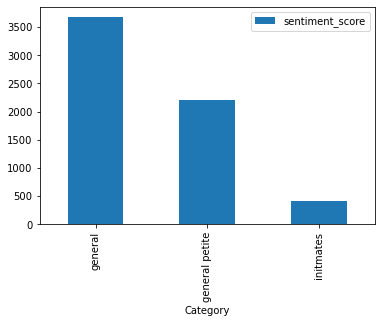

In [48]:
pd.DataFrame(yelp.groupby('Category').sentiment_score.sum()).plot(kind='bar')
# On the basis of that we can say the review written by general category having more valuable words .

<AxesSubplot:xlabel='Subcategory1'>

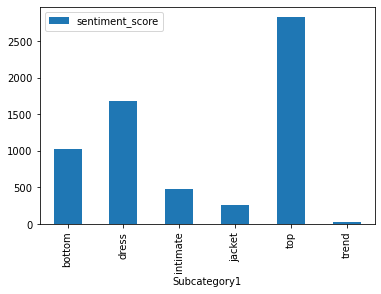

In [49]:
(pd.DataFrame(yelp.groupby('Subcategory1').sentiment_score.sum()).plot(kind='bar')) 

# On the basis of that we can say the review written for top Subcategory1 is good as compared to other. People love buying it as compared to other item .

<AxesSubplot:xlabel='SubCategory2'>

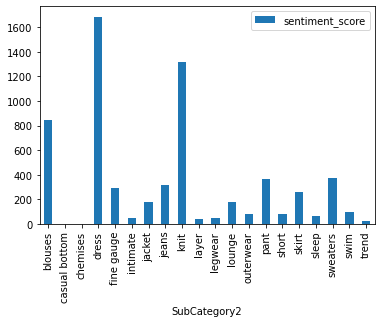

In [50]:
pd.DataFrame(yelp.groupby('SubCategory2').sentiment_score.sum()).plot(kind='bar')

# On the basis of that we can say the review written for dress in SubCategory2 is good as compared to other. People love buying it as compared to other item .
# People showing no interest in writing review on casual bottom or chemises in subCategory2

<AxesSubplot:xlabel='Location'>

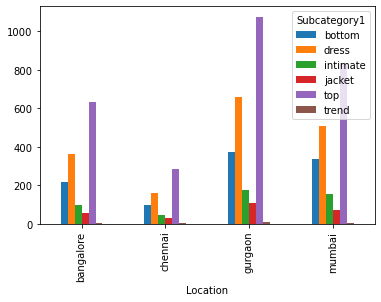

In [51]:
yelp.pivot_table( index = 'Location', columns = 'Subcategory1', values = 'sentiment_score', aggfunc = 'sum').plot( kind = 'bar')
# In all location Similar pattern we see customer loves to talk about top > dress> bottom> intimate> jacket> trend in this pattern .

<AxesSubplot:xlabel='Location'>

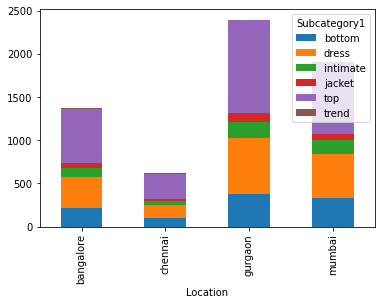

In [52]:
yelp.pivot_table( index = 'Location', columns = 'Subcategory1', 
                   values = 'sentiment_score', aggfunc = 'sum').plot( kind = 'bar' , stacked=True)

<AxesSubplot:xlabel='Location'>

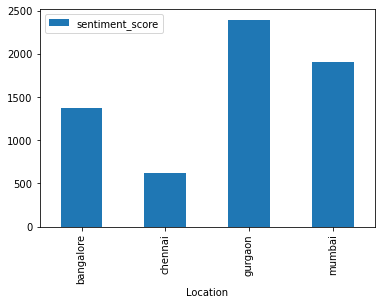

In [53]:
pd.DataFrame(yelp.groupby('Location').sentiment_score.sum()).plot(kind='bar')
# Customer from gurgaon is involving more on writing reviews & in all location top is the category1 about which customer is talking more .

<AxesSubplot:xlabel='Customer_Age'>

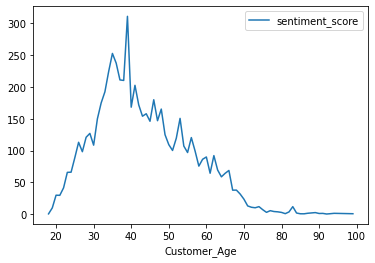

In [54]:
pd.DataFrame(yelp.groupby('Customer_Age').sentiment_score.sum()).plot(kind='line')
# Customer of age between 30 to 50 is involving more on writing reviews after 50 they are not showing much interested on cloth , but at their mid approx 40 yrs of age they are keen intreset in Fashion .

#### Perform Predictive Analytics to understand the customer behaviour who recommend the product :

In [55]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23483 entries, 0 to 23482
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product ID       23483 non-null  int64  
 1   Category         23483 non-null  object 
 2   Subcategory1     23483 non-null  object 
 3   SubCategory2     23483 non-null  object 
 4   Location         23483 non-null  object 
 5   Channel          23483 non-null  object 
 6   Customer_Age     23483 non-null  int64  
 7   Review_Title     23483 non-null  object 
 8   Review_Text      23483 non-null  object 
 9   Rating           23483 non-null  int64  
 10  Recommend_Flag   23483 non-null  int64  
 11  sentiment_score  23483 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 2.2+ MB


In [56]:
yelp[yelp.Recommend_Flag==1].head(2)

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag,sentiment_score
0,767,initmates,intimate,intimate,mumbai,mobile,33,love,absolutely wonderful silky sexy comfortable,4,1,0.633333
1,1080,general,dress,dress,bangalore,mobile,34,love,love dress sooo pretty happen find store im gl...,5,1,0.318750


#### <a>Creating Data Term Matrix - DTM

In [57]:
X_data = yelp['Review_Text']

In [58]:
#Initializing TfIdf Vectorizer
vect = TfidfVectorizer(max_features = 2000, min_df = 0.05, max_df = 0.95,
                stop_words = stopwords.words('english'))
X_tf = vect.fit_transform(X_data)

#Creating DTM dataframe
dtm = pd.DataFrame(X_tf.toarray(), columns = vect.get_feature_names_out())
dtm.head()

,also,arm,back,beautiful,better,big,bite,black,bottom,buy,...,usually,waist,want,way,wear,well,white,work,would,xs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.159064,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.320676,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.240653,0.000000,...,0.0,0.0,0.210782,0.0,0.000000,0.000000,0.0,0.194447,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.231145,0.000000,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.187207,0.276832,0.0,0.000000,0.000000,0.0


### <a>Prediction Model : For Recommend_Flag 

In [59]:
#Defining X and Y
X = dtm
Y = yelp['Recommend_Flag']

In [60]:
#Splitting Dataset into train and test dataset
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.3, random_state = 123)

#### <a>Support Vector Classifier Model

In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier
from xgboost import XGBClassifier

In [62]:
#Executing Model
sv = SVC(C = 1, random_state = 123, probability = True).fit(train_x, train_y)

#Making prediction on train and test data
train_pred_sv = sv.predict(train_x)
test_pred_sv = sv.predict(test_x)

#Calculating log loss
log_sv = metrics.log_loss(test_y, sv.predict_proba(test_x))

In [63]:
#Evaluating performance
print("Model Performance")
print("Train Dataset")
print("Accuracy : ", metrics.accuracy_score(train_y, train_pred_sv))
print("AUC      : ", metrics.roc_auc_score(train_y, sv.predict_proba(train_x)[:,1]))
print("")
print("Test Dataset")
acc_score_sv = metrics.accuracy_score(test_y, test_pred_sv)
print("Accuracy : ", acc_score_sv)
auc_sv = metrics.roc_auc_score(test_y, sv.predict_proba(test_x)[:,1])
print("AUC      : ", auc_sv)
print("Log Loss : ", log_sv )

Model Performance
Train Dataset
Accuracy :  0.9141623068499818
AUC      :  0.9703612822617628

Test Dataset
Accuracy :  0.8549325762952449
AUC      :  0.8426442740901191
Log Loss :  0.34623421404001603


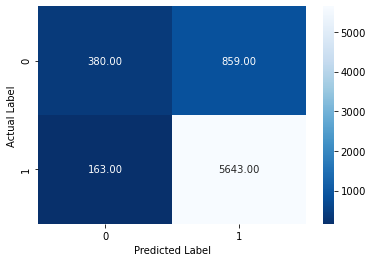

In [64]:
#Confusion Matrix
confusion_matrix = metrics.confusion_matrix(test_y, test_pred_sv)
sns.heatmap(confusion_matrix, annot = True, fmt = '.2f', cmap = 'Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [65]:
#Classification metrics scores of the model
print(metrics.classification_report(test_y, test_pred_sv))

              precision    recall  f1-score   support

           0       0.70      0.31      0.43      1239
           1       0.87      0.97      0.92      5806

    accuracy                           0.85      7045
   macro avg       0.78      0.64      0.67      7045
weighted avg       0.84      0.85      0.83      7045



#### <a>Extra Tree Model

In [66]:
#Using GridSearchCV to get best fit parameters
pm = {
      'max_depth' : [10],
       'splitter' : ['best'],
      'max_features' : [10]
     }

gscv_et = GridSearchCV(estimator = ExtraTreeClassifier(random_state = 123), 
                    param_grid = pm,
                    cv = 10,
                    scoring = 'roc_auc',
                    n_jobs = -1).fit(train_x, train_y)

In [67]:
#Using best fit parameters to fit the model
et = gscv_et.best_estimator_

#Making prediction on train and test data
train_pred_et = et.predict(train_x)
test_pred_et = et.predict(test_x)

#Calculating log loss
log_et = metrics.log_loss(test_y, et.predict_proba(test_x))

In [68]:
#Evaluating performance
print("Model Performance")
print("Train Dataset")
print("Accuracy : ", metrics.accuracy_score(train_y, train_pred_et))
print("AUC      : ", metrics.roc_auc_score(train_y, et.predict_proba(train_x)[:,1]))
print("")
print("Test Dataset")
acc_score_et = metrics.accuracy_score(test_y, test_pred_et)
print("Accuracy : ", acc_score_et)
auc_et = metrics.roc_auc_score(test_y, et.predict_proba(test_x)[:,1])
print("AUC      : ", auc_et)
print("Log Loss : ", log_et)

Model Performance
Train Dataset
Accuracy :  0.854909356369388
AUC      :  0.7952191312507786

Test Dataset
Accuracy :  0.8191625266146203
AUC      :  0.7135699425353028
Log Loss :  0.875438870493652


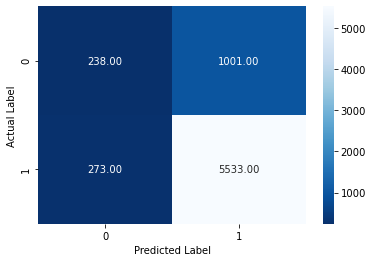

In [69]:
#Confusion Matrix
confusion_matrix = metrics.confusion_matrix(test_y, test_pred_et)
sns.heatmap(confusion_matrix, annot = True, fmt = '.2f',
            
            cmap = 'Blues_r'    
           )
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [70]:
#Classification metrics scores of the model
print(metrics.classification_report(test_y, test_pred_et))

              precision    recall  f1-score   support

           0       0.47      0.19      0.27      1239
           1       0.85      0.95      0.90      5806

    accuracy                           0.82      7045
   macro avg       0.66      0.57      0.58      7045
weighted avg       0.78      0.82      0.79      7045



#### <a>XG Boost Model

In [71]:
#Using GridSearchCV to get best fit parameters
pm = {
          'n_estimators' : [100],
          'learning_rate': [0.1]
     }

gscv_xg = GridSearchCV(estimator = XGBClassifier(random_state = 123), 
                    param_grid = pm,
                    cv = 10,
                    scoring = 'roc_auc',
                    n_jobs = -1).fit(train_x, train_y)

In [72]:
#Using best fit parameters to fit the model
xg = gscv_xg.best_estimator_

#Making prediction on train and test data
train_pred_xg = xg.predict(train_x)
test_pred_xg = xg.predict(test_x)

#Calculating log loss
log_xg = metrics.log_loss(test_y, xg.predict_proba(test_x))

In [73]:
#Evaluating performance
print("Model Performance")
print("Train Dataset")
print("Accuracy : ", metrics.accuracy_score(train_y, train_pred_xg))
print("AUC      : ", metrics.roc_auc_score(train_y, xg.predict_proba(train_x)[:,1]))
print("")
print("Test Dataset")
acc_score_xg = metrics.accuracy_score(test_y, test_pred_xg)
print("Accuracy : ", acc_score_xg)
auc_xg = metrics.roc_auc_score(test_y, xg.predict_proba(test_x)[:,1])
print("AUC      : ", auc_xg)
print("Log Loss : ", log_xg)

Model Performance
Train Dataset
Accuracy :  0.9001095023725514
AUC      :  0.9496236004066128

Test Dataset
Accuracy :  0.8526614620298084
AUC      :  0.8469306333905785
Log Loss :  0.34155980463677504


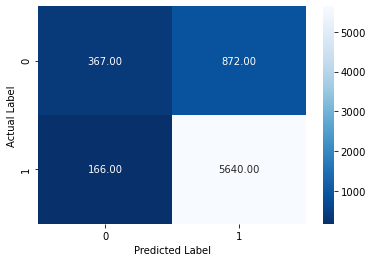

In [74]:
#Confusion Matrix
confusion_matrix = metrics.confusion_matrix(test_y, test_pred_xg)
sns.heatmap(confusion_matrix, annot = True, fmt = '.2f', cmap = 'Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [75]:
#Classification metrics scores of the model
print(metrics.classification_report(test_y, test_pred_xg))

              precision    recall  f1-score   support

           0       0.69      0.30      0.41      1239
           1       0.87      0.97      0.92      5806

    accuracy                           0.85      7045
   macro avg       0.78      0.63      0.66      7045
weighted avg       0.83      0.85      0.83      7045



#### <a> Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(train_x, train_y)

LogisticRegression(C=1000000000.0)

In [77]:
# class predictions and predicted probabilities
y_pred_class_train = logreg.predict(train_x)
y_pred_class_test = logreg.predict(test_x)


In [94]:
from sklearn.metrics import classification_report , confusion_matrix

print(metrics.classification_report(train_y, y_pred_class_train))
print(metrics.classification_report(test_y, y_pred_class_test))
acc_score_LR = metrics.accuracy_score(test_y, y_pred_class_test)

              precision    recall  f1-score   support

           0       0.66      0.69      0.67      2933
           1       0.93      0.92      0.93     13505

    accuracy                           0.88     16438
   macro avg       0.80      0.81      0.80     16438
weighted avg       0.88      0.88      0.88     16438

              precision    recall  f1-score   support

           0       0.64      0.37      0.47      1239
           1       0.88      0.96      0.91      5806

    accuracy                           0.85      7045
   macro avg       0.76      0.66      0.69      7045
weighted avg       0.84      0.85      0.84      7045



In [96]:
acc_score_LR

0.8526614620298084

In [79]:
# calculate accuracy and AUC
print(metrics.roc_auc_score(train_y, y_pred_class_train))
print(metrics.roc_auc_score(test_y, y_pred_class_test) )
auc_score_LR = metrics.roc_auc_score(test_y, y_pred_class_test) 

0.6696139235976422
0.6633290628908838


In [98]:
auc_score_LR

0.6633290628908838

In [80]:
#Calculating log loss
log_LR = metrics.log_loss(test_y, logreg.predict_proba(X=test_x))

In [97]:
log_LR

0.3420522701499617

#### <a> KNN Classification 

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [82]:
param_grid = {'n_neighbors': [4,5,6,7,8,9], 'weights': ['distance','uniform']}

model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring = 'precision')
model = model.fit(train_x, train_y)

In [83]:
# make class predictions for X_test_dtm
y_pred_class_train = model.predict(train_x)
y_pred_class = model.predict(test_x)

In [84]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(train_y, y_pred_class_train))
print(metrics.accuracy_score(test_y, y_pred_class))
acc_score_KNN = metrics.accuracy_score(test_y, y_pred_class)

0.8810682564788904
0.7970191625266146


In [85]:
# calculate AUC
print(metrics.roc_auc_score(train_y, y_pred_class_train))
print(metrics.roc_auc_score(test_y, y_pred_class_test) )
auc_score_KNN = metrics.roc_auc_score(test_y, y_pred_class_test)

0.805111756035351
0.6633290628908838


In [86]:
# confusion matrix
print(metrics.confusion_matrix(test_y, y_pred_class))

print(metrics.classification_report(train_y, y_pred_class_train))

print(metrics.classification_report(test_y, y_pred_class))

[[ 525  714]
 [ 716 5090]]
              precision    recall  f1-score   support

           0       0.66      0.69      0.67      2933
           1       0.93      0.92      0.93     13505

    accuracy                           0.88     16438
   macro avg       0.80      0.81      0.80     16438
weighted avg       0.88      0.88      0.88     16438

              precision    recall  f1-score   support

           0       0.42      0.42      0.42      1239
           1       0.88      0.88      0.88      5806

    accuracy                           0.80      7045
   macro avg       0.65      0.65      0.65      7045
weighted avg       0.80      0.80      0.80      7045



In [87]:
#Calculating log loss
log_KNN = metrics.log_loss(test_y, model.predict_proba(X=test_x))

In [99]:
log_KNN

2.0394966698739387

#### <a>Comparing metrics of each model

In [100]:
#Getting accuracy and log loss for each model
metric_data = pd.DataFrame({'Classifiers' : ['SupportVectorClassifier', 'ExtraTreeClassifier', 'XGBClassifier','KNN Classifier','Logistic Regression '],
                        'Accuracy %' : [acc_score_sv, acc_score_et, acc_score_xg,acc_score_KNN ,acc_score_LR ],
                        'ROC_AUC_Score %' : [auc_sv, auc_et, auc_xg,auc_score_KNN , auc_score_LR],    
                        'Log_Loss' : [log_sv, log_et, log_xg,log_KNN,log_LR]})

In [101]:
metric_data[['Accuracy %','ROC_AUC_Score %']] = metric_data[['Accuracy %', 'ROC_AUC_Score %']].applymap(lambda x : round((x*100),3))

In [102]:
#metric_data.to_excel(output, 'Binomial Metric Data')
metric_data

,Classifiers,Accuracy %,ROC_AUC_Score %,Log_Loss
0,SupportVectorClassifier,85.493,84.264,0.346234
1,ExtraTreeClassifier,81.916,71.357,0.875439
2,XGBClassifier,85.266,84.693,0.341560
3,KNN Classifier,79.702,66.333,2.039497
4,Logistic Regression,85.266,66.333,0.342052


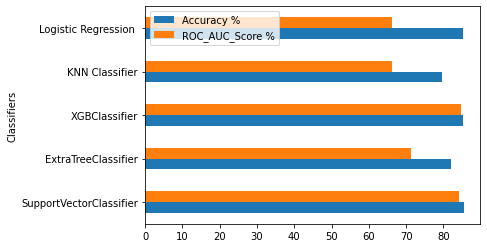

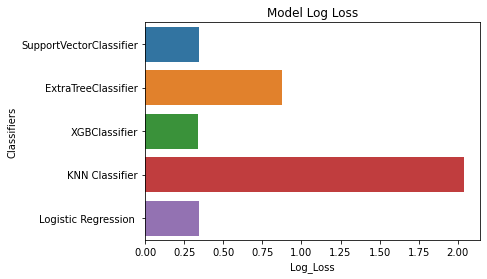

In [103]:
#Visualizing each model's accuracy and log loss metric
metric_data.plot(x = 'Classifiers', y = ['Accuracy %','ROC_AUC_Score %'], kind = 'barh')
plt.legend(loc = 2)
plt.show()

sns.barplot(data = metric_data, x = metric_data['Log_Loss'], y = metric_data.Classifiers)
plt.title('Model Log Loss')
plt.show()

<b>From above plots, XGB Classifier Model performs best. It has highest accuracy and ROC AUC Score and lowest log loss.

#### <a> Making Final Prediction 

In [104]:
yelp['pred_recommend'] = xg.predict(X)

In [105]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23483 entries, 0 to 23482
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product ID       23483 non-null  int64  
 1   Category         23483 non-null  object 
 2   Subcategory1     23483 non-null  object 
 3   SubCategory2     23483 non-null  object 
 4   Location         23483 non-null  object 
 5   Channel          23483 non-null  object 
 6   Customer_Age     23483 non-null  int64  
 7   Review_Title     23483 non-null  object 
 8   Review_Text      23483 non-null  object 
 9   Rating           23483 non-null  int64  
 10  Recommend_Flag   23483 non-null  int64  
 11  sentiment_score  23483 non-null  float64
 12  pred_recommend   23483 non-null  int32  
dtypes: float64(1), int32(1), int64(4), object(7)
memory usage: 2.2+ MB


In [106]:
yelp[['Review_Text', 'Recommend_Flag', 'pred_recommend']].head()

,Review_Text,Recommend_Flag,pred_recommend
0,absolutely wonderful silky sexy comfortable,1,1
1,love dress sooo pretty happen find store im gl...,1,1
2,high hop dress really want work initially orde...,0,1
3,love love love jumpsuit fun flirty fabulous ev...,1,1
4,shirt flatter due adjustable front tie perfect...,1,1


### May be we can use Text Recommendation or Similarity that which will recomend or not :

In [107]:
## Text Recommendation (Similarity between documents)

from sklearn.metrics.pairwise import cosine_similarity

In [110]:
#Binary Classificaiton model
Y = yelp.Recommend_Flag
X = yelp.Review_Text

train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=123)

In [112]:
train_X

3134              lovely sweater wish order xs small leave
2060     love love love dress fit like glove beautiful ...
18383    perfect denim top fabricmaterial great good qu...
16532    beautiful dress favorite print run size small ...
22860    sweater unflattering boxy fall like model soft...
                               ...                        
15377    lbs order normal xs bottom portion way size fi...
21602    love dress photos like enough keep itbut dont ...
17730    wear pant first time yesterday two party anyon...
15725    love look dress material problem try fit bite ...
19966    love top feel comfy casual like sweatshirt pai...
Name: Review_Text, Length: 16438, dtype: object

In [113]:
tfidf_vect = TfidfVectorizer(max_features = 2000, min_df = 0.05, max_df = 0.95,stop_words = stopwords.words('english'))

X_train_tfidf = tfidf_vect.fit_transform(train_X)
X_test_tfidf = tfidf_vect.transform(test_X)

dtm_tfidf_train=pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out(), index = train_X.index)
dtm_tfidf_test=pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out(), index = test_X.index)

In [114]:
dist = cosine_similarity(dtm_tfidf_train)
len(['d_'+str(i) for i in train_X.index])

dist = pd.DataFrame(dist, index =  train_X.index, columns = ['d_'+str(i) for i in train_X.index])

dist

,d_3134,d_2060,d_18383,d_16532,d_22860,d_19937,d_3876,d_13172,d_3957,d_8357,...,d_22641,d_96,d_22241,d_13435,d_7763,d_15377,d_21602,d_17730,d_15725,d_19966
3134,1.000000,0.000000,0.000000,0.136834,0.176095,0.202013,0.000000,0.128963,0.066414,0.000000,...,0.000000,0.120552,0.129211,0.000000,0.000000,0.220847,0.063647,0.000000,0.000000,0.000000
2060,0.000000,1.000000,0.216311,0.298435,0.047905,0.132284,0.070222,0.389064,0.136084,0.084453,...,0.208645,0.235150,0.229133,0.000000,0.000000,0.183621,0.418367,0.232386,0.331280,0.280904
18383,0.000000,0.216311,1.000000,0.060040,0.028204,0.000000,0.123755,0.045865,0.083246,0.000000,...,0.072244,0.151001,0.000000,0.000000,0.066077,0.156608,0.141493,0.030748,0.112831,0.180469
16532,0.136834,0.298435,0.060040,1.000000,0.053322,0.307009,0.041079,0.163853,0.056730,0.000000,...,0.087885,0.168925,0.317102,0.000000,0.000000,0.187036,0.251721,0.000000,0.299354,0.154549
22860,0.176095,0.047905,0.028204,0.053322,1.000000,0.172422,0.041060,0.093935,0.103930,0.146877,...,0.193239,0.154301,0.075077,0.000000,0.103322,0.098557,0.089615,0.000000,0.140443,0.032535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15377,0.220847,0.183621,0.156608,0.187036,0.098557,0.169722,0.000000,0.138724,0.047977,0.000000,...,0.099958,0.068516,0.161076,0.000000,0.000000,1.000000,0.192023,0.000000,0.263208,0.024895
21602,0.063647,0.418367,0.141493,0.251721,0.089615,0.295055,0.109303,0.312181,0.090785,0.083674,...,0.326693,0.272324,0.228116,0.000000,0.000000,0.192023,1.000000,0.104752,0.403334,0.285433
17730,0.000000,0.232386,0.030748,0.000000,0.000000,0.000000,0.257437,0.122018,0.092939,0.520301,...,0.062582,0.147251,0.053781,0.530543,0.000000,0.000000,0.104752,1.000000,0.072470,0.307112
15725,0.000000,0.331280,0.112831,0.299354,0.140443,0.222771,0.162361,0.394768,0.085556,0.220173,...,0.343273,0.279689,0.241918,0.000000,0.171723,0.263208,0.403334,0.072470,1.000000,0.366931


In [115]:
top_recs = dist.sort_values(by='d_3134', ascending=False)['d_3134'][1:6] 
top_recs

9066     0.649722
22491    0.643345
10588    0.634871
14261    0.634760
12436    0.596679
Name: d_3134, dtype: float64

In [116]:
yelp.Review_Text[3134]

'lovely sweater wish order xs small leave'

In [117]:
yelp.Review_Text[top_recs.index]

9066     ive look leatherfaux leather jacket age one pe...
22491    photo misrepresent large sweater giant petite ...
10588    love color rich dark green super cozy perfect ...
14261    beautiful top didnt fit small chested wide sho...
12436    love sweater get many compliment comfortable u...
Name: Review_Text, dtype: object

### Create Topics and understand themes behind the topics by performing Topic Mining :

In [118]:
#Binary Classificaiton model
Y = np.where(yelp.Rating>=4, 1, 0)
X = yelp.Review_Text

train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=123)

In [119]:
## Text Segmentation

dtm_tfidf_train = train_x

In [120]:
#pip install threadpoolctl==3.1.0

from sklearn.cluster import KMeans

model = KMeans(n_clusters=10)
res = model.fit(dtm_tfidf_train)
res

C:\Users\ashis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [121]:
res.inertia_

12550.741095347497

In [122]:
error = []

for i in range(3,20):
    model = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=1,random_state=5)
    res = model.fit(dtm_tfidf_train)
    error.append(res.inertia_)

error

[13549.300455300552,
 13353.916837277899,
 13206.048068101109,
 13054.922724766206,
 12939.864162342086,
 12769.805942271647,
 12702.610913496508,
 12664.52891098442,
 12472.318556926373,
 12387.437062356994,
 12330.23227937311,
 12269.52072420051,
 12205.249524781242,
 12098.264520537263,
 12069.222344906852,
 12011.121452059138,
 11939.396922637212]

In [123]:
model = KMeans(n_clusters=9, init='k-means++', max_iter=100, n_init=1,random_state=5)
res = model.fit(dtm_tfidf_train)

res

KMeans(max_iter=100, n_clusters=9, n_init=1, random_state=5)

In [124]:
sse_err = []
cluster_centers = np.array(res.cluster_centers_)

res.labels_

array([4, 7, 2, ..., 0, 7, 0])

In [125]:
cluster_centers

array([[ 3.07121297e-02,  3.98334564e-03,  2.18455037e-02,
         3.19190989e-02,  1.44647818e-02,  1.67408855e-02,
         2.73414809e-02,  3.21759959e-02,  1.08546376e-02,
         3.33237261e-02,  5.53935734e-02,  4.82581236e-02,
         1.45761600e-02,  1.71517748e-02,  1.76046050e-02,
         2.69018992e-02,  1.23666426e-02,  1.62907300e-02,
         1.10775938e-02,  1.24206111e-02,  2.39801201e-02,
         3.13087378e-02,  2.14021540e-02,  2.36880603e-02,
         4.15666493e-02,  1.60184933e-02,  2.49294811e-02,
         2.39959552e-02,  6.84183633e-02,  3.84123744e-02,
         1.23515327e-02,  3.70230748e-02,  1.63395043e-02,
         3.87236840e-02,  1.90637545e-02,  5.77740275e-02,
         1.88714724e-02,  4.29119787e-02,  1.10104404e-02,
         2.21580186e-02,  1.94674603e-02,  1.50649389e-02,
         1.61955097e-02,  3.68255201e-02,  4.79449917e-02,
         1.95534439e-02,  3.61099584e-02,  3.36947290e-02,
         5.31814089e-02,  8.10458423e-02,  3.39179735e-0

In [126]:
sse_err = []
cluster_centers = np.array(res.cluster_centers_)
sorted_vals = [res.cluster_centers_[i].argsort() for i in range(0,np.shape(res.cluster_centers_)[0])]
vocab = np.array(vect.get_feature_names_out())

In [127]:
words=set()
for i in range(len(res.cluster_centers_)):
    words = words.union(set(vocab[sorted_vals[i][-30:]]))
    print('Impo Words related seg:', i)
    print(vocab[sorted_vals[i][-30:]])
words=list(words)
words

Impo Words related seg: 0
['black' 'buy' 'long' 'make' 'really' 'work' 'little' 'length' 'get'
 'well' 'would' 'flatter' 'go' 'nice' 'fabric' 'perfect' 'im' 'pair'
 'like' 'comfortable' 'waist' 'look' 'color' 'size' 'great' 'fit' 'love'
 'wear' 'pant' 'skirt']
Impo Words related seg: 1
['cute' 'top' 'picture' 'get' 'way' 'material' 'didnt' 'one' 'also' 'nice'
 'model' 'go' 'good' 'dress' 'feel' 'much' 'im' 'try' 'back' 'color'
 'wear' 'love' 'really' 'fit' 'fabric' 'think' 'make' 'would' 'like'
 'look']
Impo Words related seg: 2
['bottom' 'order' 'one' 'well' 'buy' 'little' 'small' 'pretty' 'go' 'nice'
 'make' 'perfect' 'get' 'back' 'beautiful' 'really' 'would' 'im' 'flatter'
 'great' 'cute' 'fabric' 'like' 'size' 'look' 'color' 'fit' 'wear' 'love'
 'top']
Impo Words related seg: 3
['go' 'purchase' 'work' 'im' 'quality' 'well' 'super' 'would' 'short'
 'nice' 'really' 'back' 'one' 'make' 'beautiful' 'little' 'perfect'
 'material' 'flatter' 'fabric' 'get' 'buy' 'cute' 'comfortable' 'fit'

['way',
 'perfect',
 'quality',
 'great',
 'would',
 'black',
 'buy',
 'well',
 'pair',
 'love',
 'run',
 'feel',
 'flatter',
 'xs',
 'long',
 'pretty',
 'work',
 'compliment',
 'go',
 'small',
 'sweater',
 'super',
 'waist',
 'much',
 'large',
 'jeans',
 'think',
 'fall',
 'good',
 'sale',
 'summer',
 'short',
 'like',
 'size',
 'wear',
 'pant',
 'big',
 'try',
 'lbs',
 'many',
 'bottom',
 'bite',
 'one',
 'dress',
 'medium',
 'true',
 'time',
 'nice',
 'purchase',
 'petite',
 'shirt',
 'ive',
 'material',
 'really',
 'usually',
 'get',
 'im',
 'model',
 'didnt',
 'see',
 'length',
 'soft',
 'order',
 'picture',
 'color',
 'look',
 'top',
 'beautiful',
 'little',
 'back',
 'skirt',
 'cute',
 'sleeves',
 'make',
 'comfortable',
 'fit',
 'fabric',
 'also']

In [128]:
train_x.index

Int64Index([ 3134,  2060, 18383, 16532, 22860, 19937,  3876, 13172,  3957,
             8357,
            ...
            22641,    96, 22241, 13435,  7763, 15377, 21602, 17730, 15725,
            19966],
           dtype='int64', length=16438)

In [129]:
pd.Series(res.labels_, index=train_x.index)

3134     4
2060     7
18383    2
16532    5
22860    4
        ..
15377    5
21602    7
17730    0
15725    7
19966    0
Length: 16438, dtype: int32

In [130]:
pd.Series(res.labels_, index=train_x.index)

train_new = pd.concat([train_X, pd.Series(res.labels_, index=train_x.index)],axis=1)

train_new.columns = ['review', 'segment']

train_new.head()

,review,segment
3134,lovely sweater wish order xs small leave,4
2060,love love love dress fit like glove beautiful ...,7
18383,perfect denim top fabricmaterial great good qu...,2
16532,beautiful dress favorite print run size small ...,5
22860,sweater unflattering boxy fall like model soft...,4


In [131]:
train_new[train_new.segment==1]

,review,segment
21126,even sale hesitant pay much blouse im happy fa...,1
16991,im happy reviewers make dress work look terrib...,1
12608,try blouse store choose purchase think fabric ...,1
278,style top really cute fit perfectly shoulder g...,1
14855,order review outstanding return although embro...,1
...,...,...
14944,odd top_xd_ curvy figure seam enhance rather m...,1
17747,dress nice color well make style almost fit fr...,1
111,didnt end keep dressit wasnt right cute fit we...,1
20527,love look top moment saw store particularly mu...,1


In [132]:
#Topic Mining - Intent Analysis - LDA (Latent Dirichlet allocation)
#pip install -U gensim

In [133]:

##  Topic Mining
# Importing Gensim
import gensim
from gensim import corpora

C:\Users\ashis\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [134]:
train_x

,also,arm,back,beautiful,better,big,bite,black,bottom,buy,...,usually,waist,want,way,wear,well,white,work,would,xs
3134,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.563414
2060,0.0,0.000000,0.000000,0.302760,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
18383,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.174131,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
16532,0.0,0.000000,0.000000,0.336709,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.375133,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
22860,0.0,0.000000,0.283917,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15377,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.551654,0.000000,...,0.000000,0.000000,0.000000,0.251265,0.000000,0.0,0.0,0.000000,0.0,0.251225
21602,0.0,0.000000,0.000000,0.000000,0.0,0.196001,0.173284,0.0,0.000000,0.000000,...,0.188646,0.189095,0.187842,0.195364,0.112458,0.0,0.0,0.000000,0.0,0.000000
17730,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.176703,...,0.000000,0.000000,0.000000,0.000000,0.137625,0.0,0.0,0.000000,0.0,0.000000
15725,0.0,0.262727,0.000000,0.000000,0.0,0.000000,0.213570,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.240783,0.138602,0.0,0.0,0.213570,0.0,0.000000


In [135]:
X_train_tokens = [doc.split() for doc in train_X]  

dictionary = corpora.Dictionary(X_train_tokens)
print(dictionary)

Dictionary<13434 unique tokens: ['leave', 'lovely', 'order', 'small', 'sweater']...>


In [136]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in X_train_tokens]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)],
 [(7, 1),
  (8, 1),
  (9, 1),
  (10, 2),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 3),
  (19, 1),
  (20, 1)],
 [(7, 1),
  (19, 3),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 3),
  (36, 1)],
 [(3, 1),
  (8, 1),
  (10, 1),
  (11, 1),
  (17, 1),
  (32, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 2),
  (46, 1)],
 [(4, 1),
  (17, 1),
  (27, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1)],
 [(2, 3),
  (8, 1),
  (10, 1),
  (11, 1),
  (16, 1),
  (45, 2),
  (46, 1),
  (47, 1),
  (49, 1),
  (50, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 2),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),


In [137]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary)

print(ldamodel.print_topics(num_topics=10, num_words=10))

[(0, '0.078*"compliment" + 0.077*"get" + 0.072*"many" + 0.067*"buy" + 0.065*"perfect" + 0.060*"fit" + 0.056*"ive" + 0.050*"suit" + 0.015*"love" + 0.009*"top"'), (1, '0.023*"top" + 0.017*"like" + 0.016*"look" + 0.015*"fit" + 0.015*"love" + 0.015*"wear" + 0.013*"color" + 0.012*"would" + 0.011*"long" + 0.010*"really"'), (2, '0.031*"dress" + 0.017*"make" + 0.016*"like" + 0.012*"look" + 0.011*"fabric" + 0.011*"back" + 0.009*"fit" + 0.009*"really" + 0.009*"top" + 0.008*"well"'), (3, '0.027*"wear" + 0.018*"top" + 0.017*"size" + 0.014*"color" + 0.013*"love" + 0.013*"get" + 0.009*"fit" + 0.008*"cute" + 0.008*"time" + 0.008*"feel"'), (4, '0.054*"dress" + 0.033*"great" + 0.030*"wear" + 0.029*"love" + 0.021*"color" + 0.020*"fit" + 0.015*"flatter" + 0.014*"comfortable" + 0.013*"look" + 0.012*"top"'), (5, '0.032*"look" + 0.017*"like" + 0.017*"color" + 0.017*"dress" + 0.016*"try" + 0.015*"love" + 0.015*"would" + 0.012*"fit" + 0.010*"online" + 0.010*"think"'), (6, '0.053*"size" + 0.031*"fit" + 0.027*"

In [138]:
topics = ldamodel.show_topics(formatted=False, num_words=20)
    
for t in range(len(topics)):
    print("\nTopic {}, top {} words:".format(t+1,20))
    print(" ".join([w[0] for w in topics[t][1]]))

ldamodel.print_topics(num_topics=10, num_words=10)



Topic 1, top 20 words:
compliment get many buy perfect fit ive suit love top wear size look run receive great im dress little comfortable

Topic 2, top 20 words:
top like look fit love wear color would long really sweater fabric nice im length arm shirt short sleeves also

Topic 3, top 20 words:
dress make like look fabric back fit really top well little im think side much pretty love would size price

Topic 4, top 20 words:
wear top size color love get fit cute time feel wash buy go like would beautiful run order say white

Topic 5, top 20 words:
dress great wear love color fit flatter comfortable look top perfect soft fabric summer make well fall buy piece easy

Topic 6, top 20 words:
look like color dress try love would fit online think store really top order fabric much back didnt make go

Topic 7, top 20 words:
size fit dress small im order run large petite medium wear usually xs top would like get love try lbs

Topic 8, top 20 words:
jeans pant pair love & fit buy stretch wear w

[(0,
  '0.078*"compliment" + 0.077*"get" + 0.072*"many" + 0.067*"buy" + 0.065*"perfect" + 0.060*"fit" + 0.056*"ive" + 0.050*"suit" + 0.015*"love" + 0.009*"top"'),
 (1,
  '0.023*"top" + 0.017*"like" + 0.016*"look" + 0.015*"fit" + 0.015*"love" + 0.015*"wear" + 0.013*"color" + 0.012*"would" + 0.011*"long" + 0.010*"really"'),
 (2,
  '0.031*"dress" + 0.017*"make" + 0.016*"like" + 0.012*"look" + 0.011*"fabric" + 0.011*"back" + 0.009*"fit" + 0.009*"really" + 0.009*"top" + 0.008*"well"'),
 (3,
  '0.027*"wear" + 0.018*"top" + 0.017*"size" + 0.014*"color" + 0.013*"love" + 0.013*"get" + 0.009*"fit" + 0.008*"cute" + 0.008*"time" + 0.008*"feel"'),
 (4,
  '0.054*"dress" + 0.033*"great" + 0.030*"wear" + 0.029*"love" + 0.021*"color" + 0.020*"fit" + 0.015*"flatter" + 0.014*"comfortable" + 0.013*"look" + 0.012*"top"'),
 (5,
  '0.032*"look" + 0.017*"like" + 0.017*"color" + 0.017*"dress" + 0.016*"try" + 0.015*"love" + 0.015*"would" + 0.012*"fit" + 0.010*"online" + 0.010*"think"'),
 (6,
  '0.053*"size" + 0

In [139]:
# printing the topic associaltions with the documents
count = 0
for i in ldamodel[doc_term_matrix]:
    print("doc : ",count,i)
    count += 1

def format_topics_sentences(ldamodel=ldamodel, corpus=doc_term_matrix, texts=X_train_tokens):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

doc :  0 [(0, 0.012501848), (1, 0.012510789), (2, 0.01250342), (3, 0.012504998), (4, 0.012502934), (5, 0.012506894), (6, 0.88745487), (7, 0.012501698), (8, 0.012503743), (9, 0.012508796)]
doc :  1 [(4, 0.3949266), (6, 0.297895), (7, 0.268277)]
doc :  2 [(0, 0.19630778), (5, 0.25361317), (8, 0.5183828)]
doc :  3 [(2, 0.10535619), (3, 0.33056417), (6, 0.5251772)]
doc :  4 [(1, 0.9399864)]
doc :  5 [(1, 0.08990383), (5, 0.17366111), (6, 0.36204684), (7, 0.19193576), (8, 0.1708161)]
doc :  6 [(0, 0.14028834), (1, 0.44339278), (4, 0.2726513), (8, 0.12903884)]
doc :  7 [(4, 0.77195626), (9, 0.18803175)]
doc :  8 [(0, 0.14671108), (2, 0.34982738), (3, 0.3292797), (6, 0.16012825)]
doc :  9 [(3, 0.9171184), (9, 0.06295582)]
doc :  10 [(6, 0.46352535), (7, 0.042198718), (8, 0.4793744)]
doc :  11 [(0, 0.02719314), (4, 0.29506204), (7, 0.66284657)]
doc :  12 [(5, 0.40714985), (8, 0.29431137), (9, 0.27793503)]
doc :  13 [(0, 0.08351066), (1, 0.072053455), (5, 0.28945512), (6, 0.42788815), (9, 0.114

doc :  128 [(1, 0.27056256), (6, 0.24328542), (9, 0.46021694)]
doc :  129 [(1, 0.50863796), (8, 0.44134688)]
doc :  130 [(6, 0.95713526)]
doc :  131 [(0, 0.03943775), (5, 0.7766439), (6, 0.16270465)]
doc :  132 [(6, 0.9718641)]
doc :  133 [(1, 0.1010547), (2, 0.5068891), (6, 0.3777585)]
doc :  134 [(0, 0.048261713), (1, 0.07155699), (2, 0.58989364), (5, 0.27829346)]
doc :  135 [(2, 0.9307532)]
doc :  136 [(0, 0.011113458), (1, 0.011114421), (2, 0.01111414), (3, 0.011112742), (4, 0.89997303), (5, 0.011115095), (6, 0.011114874), (7, 0.011114237), (8, 0.01111425), (9, 0.011113757)]
doc :  137 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.011111438), (5, 0.011111274), (6, 0.011111474), (7, 0.011111458), (8, 0.011111379), (9, 0.011111402)]
doc :  138 [(1, 0.20307931), (2, 0.1901347), (4, 0.48976767), (6, 0.103968956)]
doc :  139 [(4, 0.06644962), (6, 0.42203352), (8, 0.0881123), (9, 0.40822068)]
doc :  140 [(9, 0.9319087)]
doc :  141 [(1, 0.389431), (6, 0.5838

doc :  257 [(0, 0.012510147), (1, 0.012513944), (2, 0.012513413), (3, 0.012511873), (4, 0.012512296), (5, 0.8873862), (6, 0.012511133), (7, 0.012512247), (8, 0.012517445), (9, 0.01251135)]
doc :  258 [(0, 0.029730653), (1, 0.40158108), (2, 0.3305064), (4, 0.12830748), (9, 0.09851267)]
doc :  259 [(0, 0.28172413), (1, 0.024573522), (2, 0.02457464), (3, 0.024575789), (4, 0.024574319), (5, 0.52168685), (6, 0.024574826), (7, 0.024570853), (8, 0.024571816), (9, 0.024573242)]
doc :  260 [(1, 0.09880373), (3, 0.10347929), (4, 0.080162935), (5, 0.3067417), (6, 0.31748852), (9, 0.08494042)]
doc :  261 [(1, 0.2649247), (2, 0.5734831), (9, 0.14829552)]
doc :  262 [(0, 0.06830686), (1, 0.2959191), (2, 0.08299142), (8, 0.06423568), (9, 0.4742395)]
doc :  263 [(4, 0.9499891)]
doc :  264 [(3, 0.30965385), (6, 0.28459394), (7, 0.1678614), (8, 0.20454545)]
doc :  265 [(5, 0.1770184), (6, 0.5093777), (9, 0.2980524)]
doc :  266 [(6, 0.5945874), (9, 0.34825245)]
doc :  267 [(0, 0.046102677), (2, 0.3259101

doc :  370 [(1, 0.8529054), (7, 0.12803687)]
doc :  371 [(2, 0.14124896), (4, 0.5843572), (6, 0.16878), (8, 0.09022357)]
doc :  372 [(4, 0.21381338), (5, 0.19514045), (6, 0.5691682)]
doc :  373 [(1, 0.15375176), (5, 0.271138), (6, 0.30227566), (9, 0.2610649)]
doc :  374 [(2, 0.35411516), (4, 0.24293867), (6, 0.31323215), (9, 0.074315205)]
doc :  375 [(1, 0.4625636), (4, 0.5010575)]
doc :  376 [(2, 0.27120566), (6, 0.69241714)]
doc :  377 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.011111438), (5, 0.011111274), (6, 0.011111474), (7, 0.011111458), (8, 0.011111379), (9, 0.011111402)]
doc :  378 [(3, 0.20768456), (5, 0.48182514), (6, 0.068452656), (7, 0.22840396)]
doc :  379 [(0, 0.068912625), (2, 0.5567898), (5, 0.34833416)]
doc :  380 [(0, 0.058669932), (1, 0.3721734), (4, 0.5357931)]
doc :  381 [(1, 0.77363497), (5, 0.11512527), (6, 0.09600872)]
doc :  382 [(0, 0.01250248), (1, 0.01250564), (2, 0.012505857), (3, 0.0125042135), (4, 0.8874589), (5, 0.01250

doc :  524 [(1, 0.5594279), (9, 0.40666246)]
doc :  525 [(4, 0.49703136), (5, 0.2372774), (8, 0.22681996)]
doc :  526 [(0, 0.1324234), (1, 0.04613789), (4, 0.27283338), (5, 0.11901001), (6, 0.11306489), (7, 0.247738), (8, 0.06302015)]
doc :  527 [(6, 0.468401), (8, 0.5138024)]
doc :  528 [(2, 0.15301383), (5, 0.32152012), (8, 0.10740407), (9, 0.40384227)]
doc :  529 [(0, 0.0180204), (4, 0.28268218), (5, 0.53885436), (8, 0.044750996), (9, 0.10625327)]
doc :  530 [(6, 0.5282098), (8, 0.28030047), (9, 0.16352741)]
doc :  531 [(4, 0.09714668), (6, 0.6006479), (8, 0.27805403)]
doc :  532 [(0, 0.3003457), (4, 0.64248735)]
doc :  533 [(0, 0.06781646), (3, 0.23952328), (7, 0.32756424), (8, 0.33781317)]
doc :  534 [(2, 0.11782158), (3, 0.11433492), (4, 0.71781766)]
doc :  535 [(5, 0.8120964), (9, 0.1263117)]
doc :  536 [(0, 0.014244287), (1, 0.014248264), (2, 0.014246868), (3, 0.014244804), (4, 0.014244939), (5, 0.014246703), (6, 0.6485788), (7, 0.23745024), (8, 0.014250562), (9, 0.01424448)]
d

doc :  653 [(8, 0.9533477)]
doc :  654 [(2, 0.03876467), (4, 0.15791124), (6, 0.3116028), (9, 0.47707283)]
doc :  655 [(1, 0.9353521)]
doc :  656 [(4, 0.19806114), (6, 0.7485877)]
doc :  657 [(2, 0.19780807), (4, 0.77645373)]
doc :  658 [(1, 0.7251085), (4, 0.23043463)]
doc :  659 [(3, 0.97271365)]
doc :  660 [(1, 0.39087027), (6, 0.42382655), (8, 0.15488139)]
doc :  661 [(0, 0.05958931), (3, 0.098836586), (4, 0.5755538), (9, 0.24725679)]
doc :  662 [(5, 0.55593216), (9, 0.40595773)]
doc :  663 [(1, 0.17379396), (2, 0.2487904), (4, 0.3708611), (6, 0.09106769), (7, 0.102320835)]
doc :  664 [(4, 0.044239238), (5, 0.6563692), (6, 0.28445488)]
doc :  665 [(5, 0.26130423), (6, 0.49173197), (9, 0.23068625)]
doc :  666 [(4, 0.21632637), (6, 0.76588356)]
doc :  667 [(1, 0.35943872), (3, 0.06637727), (5, 0.36393598), (7, 0.041199684), (9, 0.1564808)]
doc :  668 [(0, 0.010001505), (1, 0.010003348), (2, 0.010002276), (3, 0.010001799), (4, 0.010003715), (5, 0.010002568), (6, 0.6318048), (7, 0.2881

doc :  779 [(5, 0.44111565), (8, 0.51904655)]
doc :  780 [(0, 0.014287051), (1, 0.014288332), (2, 0.014289697), (3, 0.014288015), (4, 0.0142884), (5, 0.0142895), (6, 0.87140864), (7, 0.014286671), (8, 0.014286701), (9, 0.01428704)]
doc :  781 [(1, 0.5231583), (5, 0.1342662), (6, 0.26887897), (7, 0.061444823)]
doc :  782 [(1, 0.29320183), (6, 0.6817898)]
doc :  783 [(1, 0.33347237), (5, 0.63688695)]
doc :  784 [(0, 0.010001254), (1, 0.90997344), (2, 0.010003436), (3, 0.010002191), (4, 0.010003831), (5, 0.010005451), (6, 0.010002602), (7, 0.010002199), (8, 0.010002965), (9, 0.01000261)]
doc :  785 [(0, 0.030769538), (2, 0.054169133), (5, 0.45750928), (6, 0.44529462)]
doc :  786 [(5, 0.2739995), (6, 0.6789296)]
doc :  787 [(4, 0.6379121), (6, 0.3420778)]
doc :  788 [(3, 0.71635914), (9, 0.22208467)]
doc :  789 [(6, 0.9549839)]
doc :  790 [(3, 0.16509667), (6, 0.3908435), (7, 0.42563155)]
doc :  791 [(2, 0.46384934), (4, 0.35185856), (9, 0.14051875)]
doc :  792 [(2, 0.76676965), (8, 0.1933

doc :  942 [(0, 0.14565867), (1, 0.24973589), (2, 0.4403567), (7, 0.13923222)]
doc :  943 [(2, 0.57249635), (8, 0.39989996)]
doc :  944 [(2, 0.24867925), (6, 0.71797365)]
doc :  945 [(0, 0.054774743), (1, 0.45631123), (5, 0.42275602), (7, 0.050763622)]
doc :  946 [(3, 0.38245887), (6, 0.43983006), (7, 0.14269239)]
doc :  947 [(0, 0.011117742), (1, 0.011114585), (2, 0.0111143645), (3, 0.011115234), (4, 0.49577463), (5, 0.0111150965), (6, 0.011115012), (7, 0.011115028), (8, 0.415303), (9, 0.011115302)]
doc :  948 [(0, 0.025356442), (4, 0.28940657), (7, 0.043993846), (8, 0.62664074)]
doc :  949 [(4, 0.4024213), (6, 0.5690022)]
doc :  950 [(1, 0.4761672), (4, 0.20180194), (9, 0.30014685)]
doc :  951 [(3, 0.91015047)]
doc :  952 [(1, 0.78172296), (6, 0.17119855)]
doc :  953 [(2, 0.06817601), (4, 0.6523846), (5, 0.12442745), (6, 0.13922288)]
doc :  954 [(4, 0.22562656), (9, 0.72435904)]
doc :  955 [(5, 0.4936304), (6, 0.11161226), (8, 0.36881793)]
doc :  956 [(0, 0.071826085), (4, 0.33955458

doc :  1063 [(2, 0.22861142), (3, 0.057277087), (4, 0.18861315), (6, 0.51299274)]
doc :  1064 [(5, 0.56657034), (6, 0.25997615), (9, 0.15346883)]
doc :  1065 [(1, 0.62611544), (6, 0.16991317), (7, 0.14484613), (8, 0.042451188)]
doc :  1066 [(0, 0.17210379), (1, 0.5350845), (3, 0.2761347)]
doc :  1067 [(0, 0.010001301), (1, 0.010003336), (2, 0.010003321), (3, 0.010003934), (4, 0.010002687), (5, 0.010003674), (6, 0.9099741), (7, 0.010002143), (8, 0.010002351), (9, 0.010003201)]
doc :  1068 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.0111114355), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111458), (8, 0.011111377), (9, 0.011111401)]
doc :  1069 [(1, 0.69382054), (9, 0.27654004)]
doc :  1070 [(3, 0.17521401), (6, 0.73016375), (7, 0.059693106)]
doc :  1071 [(0, 0.08795429), (1, 0.50909066), (5, 0.36801994)]
doc :  1072 [(0, 0.09264998), (4, 0.31609696), (5, 0.42026362), (8, 0.14370668)]
doc :  1073 [(4, 0.41511565), (5, 0.5540982)]
doc :  1074 [(0, 0.08662

doc :  1188 [(4, 0.6589893), (9, 0.28385234)]
doc :  1189 [(0, 0.14706747), (4, 0.30105707), (5, 0.5150223)]
doc :  1190 [(1, 0.4203084), (5, 0.07303232), (6, 0.43722436), (7, 0.051771455)]
doc :  1191 [(1, 0.3552626), (4, 0.3196757), (7, 0.29322225)]
doc :  1192 [(4, 0.23387863), (5, 0.13180256), (8, 0.54948086), (9, 0.07054604)]
doc :  1193 [(1, 0.17902204), (4, 0.10231272), (5, 0.24415936), (6, 0.46116334)]
doc :  1194 [(3, 0.40243372), (7, 0.5475461)]
doc :  1195 [(0, 0.07074533), (5, 0.8565072)]
doc :  1196 [(5, 0.3626724), (7, 0.5308043), (8, 0.09050334)]
doc :  1197 [(3, 0.7077851), (5, 0.25741726)]
doc :  1198 [(3, 0.065447465), (4, 0.3143196), (5, 0.2699355), (6, 0.33652642)]
doc :  1199 [(3, 0.20063746), (4, 0.18050192), (6, 0.5560925), (8, 0.043012943)]
doc :  1200 [(4, 0.22165254), (5, 0.19828397), (9, 0.5411546)]
doc :  1201 [(2, 0.14094107), (6, 0.35851455), (9, 0.4793625)]
doc :  1202 [(1, 0.4630745), (4, 0.12136908), (5, 0.39609623)]
doc :  1203 [(0, 0.16613859), (6, 0.

doc :  1316 [(2, 0.15448591), (3, 0.2527659), (4, 0.1972072), (7, 0.38220048)]
doc :  1317 [(1, 0.5921348), (2, 0.20812759), (9, 0.18484186)]
doc :  1318 [(1, 0.94998515)]
doc :  1319 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.0111114355), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111457), (8, 0.011111377), (9, 0.011111401)]
doc :  1320 [(6, 0.7945607), (9, 0.16331662)]
doc :  1321 [(2, 0.49455595), (5, 0.4522148)]
doc :  1322 [(1, 0.47606102), (4, 0.08342108), (5, 0.4112217)]
doc :  1323 [(1, 0.14632866), (3, 0.046968956), (5, 0.42913756), (6, 0.36531678)]
doc :  1324 [(3, 0.092076), (4, 0.15335213), (5, 0.2984925), (7, 0.078779146), (8, 0.36413574)]
doc :  1325 [(6, 0.91815865)]
doc :  1326 [(7, 0.95261973)]
doc :  1327 [(6, 0.9639853)]
doc :  1328 [(3, 0.3909114), (4, 0.35098943), (5, 0.14625578), (9, 0.09722238)]
doc :  1329 [(1, 0.15640323), (3, 0.073659055), (4, 0.12195483), (6, 0.11355704), (7, 0.18492739), (8, 0.33773217)]
doc :  1330 [(1, 0

doc :  1438 [(4, 0.15177828), (7, 0.09459308), (9, 0.72782844)]
doc :  1439 [(2, 0.519886), (5, 0.25315708), (8, 0.2019453)]
doc :  1440 [(0, 0.102190025), (1, 0.4413864), (4, 0.30794924), (6, 0.12538244)]
doc :  1441 [(6, 0.94373435)]
doc :  1442 [(2, 0.5192854), (5, 0.362248), (7, 0.0866352)]
doc :  1443 [(1, 0.8744395), (6, 0.1077765)]
doc :  1444 [(1, 0.47576752), (9, 0.49458942)]
doc :  1445 [(4, 0.41249257), (5, 0.19240676), (6, 0.3796864)]
doc :  1446 [(6, 0.45422187), (9, 0.49242842)]
doc :  1447 [(9, 0.9595472)]
doc :  1448 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.011111438), (5, 0.011111274), (6, 0.011111474), (7, 0.011111459), (8, 0.011111379), (9, 0.011111402)]
doc :  1449 [(0, 0.014288473), (1, 0.014290717), (2, 0.014290439), (3, 0.0142910965), (4, 0.014289143), (5, 0.014288466), (6, 0.014289667), (7, 0.29630587), (8, 0.01429038), (9, 0.5893758)]
doc :  1450 [(4, 0.15944406), (5, 0.24248737), (6, 0.5780644)]
doc :  1451 [(1, 0.46723074),

doc :  1570 [(0, 0.048858847), (6, 0.72213155), (9, 0.19710112)]
doc :  1571 [(1, 0.37161785), (8, 0.5963698)]
doc :  1572 [(3, 0.0588839), (6, 0.70947933), (7, 0.21369107)]
doc :  1573 [(0, 0.03112335), (2, 0.44267842), (5, 0.32043648), (6, 0.19146918)]
doc :  1574 [(1, 0.095919415), (5, 0.6292959), (7, 0.25293276)]
doc :  1575 [(0, 0.02000239), (1, 0.020007672), (2, 0.020004643), (3, 0.020002773), (4, 0.8199488), (5, 0.020004073), (6, 0.02000355), (7, 0.020004751), (8, 0.02001356), (9, 0.020007767)]
doc :  1576 [(3, 0.048436966), (7, 0.16948387), (8, 0.76147616)]
doc :  1577 [(0, 0.014290234), (1, 0.014290166), (2, 0.014291342), (3, 0.014288474), (4, 0.6295443), (5, 0.25613618), (6, 0.0142899575), (7, 0.014288853), (8, 0.014289591), (9, 0.014290924)]
doc :  1578 [(0, 0.09447446), (2, 0.23079062), (4, 0.26722565), (9, 0.38532445)]
doc :  1579 [(3, 0.08341108), (6, 0.84383535)]
doc :  1580 [(1, 0.24969779), (5, 0.6603353), (7, 0.07319861)]
doc :  1581 [(4, 0.31720823), (5, 0.19567789),

doc :  1673 [(6, 0.65880877), (7, 0.3091757)]
doc :  1674 [(2, 0.25344306), (4, 0.47284633), (7, 0.22994147)]
doc :  1675 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.011111438), (5, 0.011111274), (6, 0.011111474), (7, 0.011111459), (8, 0.011111379), (9, 0.011111402)]
doc :  1676 [(0, 0.21752875), (3, 0.40972686), (4, 0.14539854), (6, 0.20242712)]
doc :  1677 [(1, 0.55754787), (9, 0.416638)]
doc :  1678 [(0, 0.065016314), (1, 0.43750238), (2, 0.11273333), (8, 0.28614962), (9, 0.087723315)]
doc :  1679 [(1, 0.5405644), (3, 0.40941864)]
doc :  1680 [(1, 0.1561355), (6, 0.8118523)]
doc :  1681 [(0, 0.2553469), (2, 0.17648253), (4, 0.3121452), (8, 0.22443053)]
doc :  1682 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.011111438), (5, 0.011111274), (6, 0.011111474), (7, 0.011111459), (8, 0.011111379), (9, 0.011111402)]
doc :  1683 [(0, 0.011119409), (1, 0.011119414), (2, 0.011122724), (3, 0.011120854), (4, 0.011120449), (5, 0.586

doc :  1794 [(4, 0.56802315), (5, 0.37862867)]
doc :  1795 [(1, 0.15088427), (6, 0.8046536)]
doc :  1796 [(5, 0.17900711), (6, 0.7951464)]
doc :  1797 [(5, 0.83569306), (6, 0.099393636), (7, 0.050320502)]
doc :  1798 [(6, 0.9181552)]
doc :  1799 [(2, 0.27944297), (5, 0.68577653)]
doc :  1800 [(1, 0.5841145), (5, 0.17773046), (6, 0.21754503)]
doc :  1801 [(3, 0.33596835), (5, 0.19403496), (6, 0.3385461), (7, 0.107609645)]
doc :  1802 [(1, 0.48064616), (2, 0.21739051), (3, 0.050911088), (4, 0.08980524), (5, 0.10650075), (9, 0.046740543)]
doc :  1803 [(1, 0.33086926), (9, 0.6515583)]
doc :  1804 [(8, 0.9499863)]
doc :  1805 [(2, 0.6443326), (6, 0.31928906)]
doc :  1806 [(0, 0.076330155), (1, 0.25162396), (2, 0.48350626), (5, 0.17458872)]
doc :  1807 [(1, 0.13880752), (4, 0.79964185)]
doc :  1808 [(0, 0.054070625), (1, 0.5546742), (5, 0.2521464), (8, 0.12196343)]
doc :  1809 [(0, 0.03013615), (3, 0.5058489), (5, 0.1251082), (8, 0.3255583)]
doc :  1810 [(4, 0.49843633), (5, 0.37857056), (7,

doc :  1917 [(1, 0.15051007), (2, 0.47314087), (4, 0.33526665)]
doc :  1918 [(0, 0.08885489), (1, 0.47295055), (3, 0.18974419), (9, 0.2253648)]
doc :  1919 [(0, 0.0732243), (6, 0.24200983), (9, 0.6698671)]
doc :  1920 [(1, 0.37026086), (5, 0.6047264)]
doc :  1921 [(1, 0.07028875), (2, 0.23204747), (5, 0.19474009), (7, 0.49014667)]
doc :  1922 [(0, 0.041043416), (5, 0.29782534), (6, 0.5501557), (9, 0.096684545)]
doc :  1923 [(5, 0.19043076), (6, 0.7714632)]
doc :  1924 [(1, 0.25250944), (6, 0.7208053)]
doc :  1925 [(3, 0.092676), (6, 0.55185443), (7, 0.32209238)]
doc :  1926 [(6, 0.91815525)]
doc :  1927 [(4, 0.7482075), (5, 0.19024055)]
doc :  1928 [(3, 0.4024327), (4, 0.37163574), (5, 0.20703204)]
doc :  1929 [(1, 0.3464553), (2, 0.3318287), (6, 0.15243047), (7, 0.062914476), (9, 0.096324004)]
doc :  1930 [(2, 0.45769423), (9, 0.521827)]
doc :  1931 [(1, 0.39204314), (2, 0.2702959), (4, 0.109490246), (6, 0.2131817)]
doc :  1932 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0

doc :  2041 [(1, 0.15443315), (3, 0.7922145)]
doc :  2042 [(2, 0.3823691), (6, 0.3509343), (9, 0.2407667)]
doc :  2043 [(0, 0.028208455), (2, 0.50631106), (5, 0.20046894), (6, 0.2503752)]
doc :  2044 [(2, 0.47500423), (6, 0.4849822)]
doc :  2045 [(0, 0.037290182), (4, 0.37159905), (7, 0.25526375), (9, 0.31739327)]
doc :  2046 [(2, 0.52029085), (3, 0.2621693), (9, 0.17089866)]
doc :  2047 [(1, 0.32131204), (6, 0.41734117), (8, 0.19135243)]
doc :  2048 [(1, 0.38884863), (4, 0.27012646), (7, 0.112418175), (9, 0.20451559)]
doc :  2049 [(2, 0.16187915), (5, 0.35085568), (9, 0.46226713)]
doc :  2050 [(2, 0.4901044), (7, 0.44320142)]
doc :  2051 [(2, 0.48795643), (6, 0.4824062)]
doc :  2052 [(5, 0.83874106), (9, 0.12644821)]
doc :  2053 [(1, 0.40355584), (7, 0.09598112), (9, 0.4735355)]
doc :  2054 [(2, 0.07684829), (5, 0.5434174), (6, 0.14408527), (7, 0.17579006), (8, 0.048741587)]
doc :  2055 [(1, 0.6259047), (7, 0.2180412), (9, 0.11919256)]
doc :  2056 [(4, 0.71279895), (7, 0.04048868), (9

doc :  2169 [(1, 0.7813182), (8, 0.15710652)]
doc :  2170 [(1, 0.2820986), (5, 0.6607264)]
doc :  2171 [(9, 0.9249783)]
doc :  2172 [(2, 0.47964635), (5, 0.40950492), (6, 0.09139827)]
doc :  2173 [(1, 0.2559801), (3, 0.6486407), (4, 0.07909573)]
doc :  2174 [(2, 0.34197372), (3, 0.030662064), (8, 0.18255214), (9, 0.42980504)]
doc :  2175 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.011111436), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111457), (8, 0.011111377), (9, 0.011111401)]
doc :  2176 [(0, 0.09793293), (4, 0.40116432), (6, 0.26846945), (9, 0.21705778)]
doc :  2177 [(1, 0.14803144), (5, 0.5169769), (6, 0.31942952)]
doc :  2178 [(1, 0.36691633), (5, 0.1527678), (6, 0.35020527), (8, 0.11074481)]
doc :  2179 [(6, 0.64038455), (7, 0.29806015)]
doc :  2180 [(1, 0.50982183), (7, 0.45536092)]
doc :  2181 [(1, 0.63433516), (6, 0.34043333)]
doc :  2182 [(4, 0.14530097), (6, 0.21167682), (7, 0.6277923)]
doc :  2183 [(0, 0.89999765), (1, 0.011111321), (2, 0

doc :  2305 [(2, 0.12903593), (4, 0.7922464), (6, 0.061219525)]
doc :  2306 [(2, 0.2872487), (7, 0.1478124), (8, 0.54866636)]
doc :  2307 [(4, 0.66778123), (8, 0.2750725)]
doc :  2308 [(2, 0.49134216), (3, 0.33756277), (7, 0.13219522)]
doc :  2309 [(4, 0.51378566), (5, 0.09130863), (6, 0.2816407), (7, 0.09962153)]
doc :  2310 [(1, 0.44854033), (5, 0.31204277), (6, 0.22393624)]
doc :  2311 [(4, 0.40455225), (6, 0.5678546)]
doc :  2312 [(2, 0.14398567), (4, 0.44812316), (6, 0.36409882)]
doc :  2313 [(1, 0.5735706), (4, 0.3528991), (8, 0.054079935)]
doc :  2314 [(5, 0.9249664)]
doc :  2315 [(4, 0.23210306), (5, 0.3436466), (6, 0.39507282)]
doc :  2316 [(1, 0.2910469), (5, 0.29442623), (8, 0.3083044), (9, 0.08907677)]
doc :  2317 [(1, 0.29237774), (4, 0.33293855), (6, 0.07780016), (8, 0.28487748)]
doc :  2318 [(0, 0.27742895), (2, 0.1437941), (5, 0.5204053)]
doc :  2319 [(1, 0.1747493), (2, 0.23362112), (5, 0.32400635), (6, 0.2504751)]
doc :  2320 [(1, 0.16270667), (4, 0.33840558), (6, 0.4

doc :  2415 [(1, 0.15474196), (4, 0.23660146), (6, 0.5697241)]
doc :  2416 [(2, 0.19409429), (4, 0.24344517), (5, 0.53987056)]
doc :  2417 [(1, 0.32979134), (3, 0.10839392), (6, 0.40956834), (8, 0.13890976)]
doc :  2418 [(2, 0.29760498), (4, 0.23230503), (7, 0.44594392)]
doc :  2419 [(1, 0.17369281), (2, 0.07924031), (3, 0.04810649), (4, 0.08890678), (5, 0.4445051), (6, 0.15665683)]
doc :  2420 [(7, 0.9692265)]
doc :  2421 [(2, 0.17669588), (6, 0.20168601), (7, 0.14548416), (9, 0.45304555)]
doc :  2422 [(0, 0.13272882), (6, 0.46250412), (9, 0.37294078)]
doc :  2423 [(6, 0.9799915)]
doc :  2424 [(6, 0.49194396), (7, 0.22993085), (9, 0.25919998)]
doc :  2425 [(5, 0.9571272)]
doc :  2426 [(1, 0.44765252), (8, 0.5175625)]
doc :  2427 [(0, 0.0589881), (2, 0.6836849), (7, 0.24103802)]
doc :  2428 [(2, 0.33388034), (3, 0.44799837), (8, 0.18481165)]
doc :  2429 [(1, 0.31418428), (4, 0.6510253)]
doc :  2430 [(2, 0.39302292), (9, 0.54980576)]
doc :  2431 [(1, 0.60062623), (9, 0.35935494)]
doc : 

doc :  2553 [(0, 0.032193746), (1, 0.5713822), (4, 0.080933936), (5, 0.16382913), (7, 0.09424118), (9, 0.049249336)]
doc :  2554 [(6, 0.6075426), (9, 0.3480088)]
doc :  2555 [(0, 0.13926683), (4, 0.6681167), (5, 0.16078992)]
doc :  2556 [(2, 0.7117305), (6, 0.24380624)]
doc :  2557 [(4, 0.28133988), (5, 0.70126325)]
doc :  2558 [(2, 0.26523578), (4, 0.09670658), (5, 0.6221277)]
doc :  2559 [(0, 0.043671254), (2, 0.3359138), (3, 0.2816125), (5, 0.11529723), (6, 0.06983727), (9, 0.14515093)]
doc :  2560 [(0, 0.010003042), (1, 0.01000466), (2, 0.010003761), (3, 0.010003788), (4, 0.010004096), (5, 0.010003747), (6, 0.14109148), (7, 0.010002809), (8, 0.77887964), (9, 0.01000294)]
doc :  2561 [(1, 0.30175805), (6, 0.59571004), (9, 0.08252279)]
doc :  2562 [(1, 0.40554395), (3, 0.07325488), (4, 0.49785507)]
doc :  2563 [(2, 0.14267509), (3, 0.051740617), (5, 0.035581205), (6, 0.55288625), (8, 0.07604088), (9, 0.13274808)]
doc :  2564 [(3, 0.15093346), (4, 0.3340737), (9, 0.46112818)]
doc :  2

doc :  2703 [(1, 0.2761991), (2, 0.47155634), (3, 0.22423081)]
doc :  2704 [(3, 0.26541343), (4, 0.16297197), (5, 0.43570936), (6, 0.122261785)]
doc :  2705 [(6, 0.44969907), (7, 0.5058391)]
doc :  2706 [(6, 0.3060068), (9, 0.6439769)]
doc :  2707 [(6, 0.9307422)]
doc :  2708 [(0, 0.011119543), (1, 0.011113811), (2, 0.011113956), (3, 0.011115177), (4, 0.45846638), (5, 0.011114328), (6, 0.011114383), (7, 0.01111543), (8, 0.011115371), (9, 0.45261163)]
doc :  2709 [(0, 0.010008086), (1, 0.010003175), (2, 0.010002125), (3, 0.010003318), (4, 0.010004202), (5, 0.010003109), (6, 0.72604257), (7, 0.010003511), (8, 0.19392629), (9, 0.010003605)]
doc :  2710 [(1, 0.16642895), (3, 0.5299982), (6, 0.26671803)]
doc :  2711 [(3, 0.28942448), (4, 0.67246413)]
doc :  2712 [(0, 0.14473091), (4, 0.6324596), (6, 0.17904267)]
doc :  2713 [(5, 0.935694)]
doc :  2714 [(1, 0.6046165), (2, 0.26008317), (8, 0.10936461)]
doc :  2715 [(5, 0.14112213), (7, 0.13416705), (8, 0.6663379)]
doc :  2716 [(1, 0.08364856

doc :  2825 [(1, 0.18706113), (2, 0.44851536), (3, 0.20213464), (8, 0.14158513)]
doc :  2826 [(4, 0.9181608)]
doc :  2827 [(5, 0.43121466), (6, 0.39222726), (8, 0.15939078)]
doc :  2828 [(2, 0.105890304), (5, 0.10528193), (6, 0.41393262), (8, 0.09367013), (9, 0.2698514)]
doc :  2829 [(8, 0.81513244), (9, 0.123292856)]
doc :  2830 [(2, 0.54428023), (4, 0.4023713)]
doc :  2831 [(0, 0.06968078), (2, 0.16325785), (5, 0.08464374), (6, 0.6642217)]
doc :  2832 [(0, 0.14715418), (2, 0.51940584), (3, 0.07596185), (5, 0.101989664), (8, 0.14548028)]
doc :  2833 [(1, 0.056140624), (2, 0.07415303), (3, 0.029767046), (5, 0.31601298), (6, 0.2772482), (7, 0.16204908), (9, 0.0782346)]
doc :  2834 [(1, 0.5597482), (4, 0.16240057), (6, 0.1323989), (9, 0.11384138)]
doc :  2835 [(3, 0.14995576), (8, 0.8055806)]
doc :  2836 [(2, 0.3684193), (3, 0.10336259), (6, 0.17794064), (9, 0.33523172)]
doc :  2837 [(1, 0.08307599), (2, 0.09709482), (3, 0.045160346), (4, 0.60886616), (7, 0.14963968)]
doc :  2838 [(1, 0.

doc :  2959 [(1, 0.516793), (5, 0.012137969), (7, 0.4273168)]
doc :  2960 [(1, 0.12709148), (4, 0.509593), (6, 0.33637893)]
doc :  2961 [(6, 0.9718684)]
doc :  2962 [(2, 0.41321346), (4, 0.13521042), (5, 0.36192885), (8, 0.073851384)]
doc :  2963 [(0, 0.1458741), (3, 0.10613891), (4, 0.1876515), (6, 0.29216146), (9, 0.25681862)]
doc :  2964 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.011111436), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111457), (8, 0.011111377), (9, 0.011111401)]
doc :  2965 [(1, 0.46395913), (2, 0.48268893)]
doc :  2966 [(0, 0.12629898), (4, 0.25558573), (5, 0.22446914), (6, 0.072432324), (7, 0.30605686)]
doc :  2967 [(2, 0.1722645), (4, 0.27165452), (6, 0.54117024)]
doc :  2968 [(5, 0.94705856)]
doc :  2969 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.011111436), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111457), (8, 0.011111377), (9, 0.011111401)]
doc :  2970 [(1, 0.89017165), (4, 0.0431633)]
do

doc :  3076 [(0, 0.041940402), (1, 0.41613454), (5, 0.44037652), (9, 0.08758495)]
doc :  3077 [(1, 0.49321076), (8, 0.4401915)]
doc :  3078 [(0, 0.12623191), (5, 0.28396532), (9, 0.5685779)]
doc :  3079 [(4, 0.16767788), (6, 0.80268276)]
doc :  3080 [(1, 0.32047218), (5, 0.53906655), (7, 0.08659359)]
doc :  3081 [(0, 0.11481975), (3, 0.29014367), (5, 0.45317885), (6, 0.12757488)]
doc :  3082 [(1, 0.43188542), (2, 0.24542242), (5, 0.26465878), (8, 0.045252755)]
doc :  3083 [(1, 0.08100817), (4, 0.202636), (6, 0.23155613), (7, 0.45852327)]
doc :  3084 [(1, 0.32535383), (2, 0.15433441), (6, 0.48637223)]
doc :  3085 [(4, 0.114128955), (5, 0.075341694), (6, 0.30336434), (9, 0.4840776)]
doc :  3086 [(6, 0.2363181), (9, 0.73509955)]
doc :  3087 [(0, 0.076623924), (2, 0.3043286), (7, 0.2830167), (8, 0.3232588)]
doc :  3088 [(0, 0.121439196), (4, 0.3821383), (6, 0.3426132), (7, 0.13714021)]
doc :  3089 [(0, 0.09745574), (2, 0.11779831), (4, 0.67442685), (6, 0.08420044)]
doc :  3090 [(0, 0.16525

doc :  3209 [(1, 0.42579684), (4, 0.17241357), (6, 0.33217144), (9, 0.055975746)]
doc :  3210 [(0, 0.3275054), (1, 0.011107245), (2, 0.20084597), (3, 0.39389175), (4, 0.011110587), (5, 0.011107394), (6, 0.011107651), (7, 0.011108962), (8, 0.011107448), (9, 0.011107566)]
doc :  3211 [(3, 0.32280013), (6, 0.6144334), (7, 0.04685849)]
doc :  3212 [(0, 0.2418361), (3, 0.24493591), (6, 0.4898815)]
doc :  3213 [(2, 0.26062307), (3, 0.30396047), (9, 0.42019865)]
doc :  3214 [(1, 0.42911485), (4, 0.41596928), (8, 0.13935457)]
doc :  3215 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.011111437), (5, 0.011111274), (6, 0.011111474), (7, 0.011111458), (8, 0.011111379), (9, 0.011111402)]
doc :  3216 [(1, 0.9437671)]
doc :  3217 [(0, 0.014288052), (1, 0.014292001), (2, 0.8713884), (3, 0.014290684), (4, 0.014288526), (5, 0.014290405), (6, 0.014294377), (7, 0.0142883565), (8, 0.014290637), (9, 0.014288536)]
doc :  3218 [(1, 0.7172664), (5, 0.16001502), (8, 0.09937234)]
d

doc :  3329 [(1, 0.0647708), (2, 0.3780645), (6, 0.5400885)]
doc :  3330 [(6, 0.9249745)]
doc :  3331 [(1, 0.20256591), (2, 0.06545807), (4, 0.21081465), (5, 0.12733242), (9, 0.3822035)]
doc :  3332 [(4, 0.052506402), (5, 0.22190714), (8, 0.33859977), (9, 0.37198296)]
doc :  3333 [(1, 0.07276199), (2, 0.46491575), (3, 0.056690145), (4, 0.2180543), (6, 0.17594798)]
doc :  3334 [(5, 0.4450573), (6, 0.5386084)]
doc :  3335 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.011111438), (5, 0.011111274), (6, 0.011111474), (7, 0.011111458), (8, 0.011111379), (9, 0.011111402)]
doc :  3336 [(4, 0.93074673)]
doc :  3337 [(4, 0.15290913), (5, 0.27941862), (6, 0.4262241), (7, 0.12208408)]
doc :  3338 [(0, 0.01428825), (1, 0.014289614), (2, 0.014290143), (3, 0.014289008), (4, 0.014293218), (5, 0.014288958), (6, 0.014288984), (7, 0.01429043), (8, 0.8713916), (9, 0.014289795)]
doc :  3339 [(2, 0.14653215), (4, 0.23734279), (5, 0.42951798), (7, 0.1665948)]
doc :  3340 [(1, 0

doc :  3467 [(2, 0.0711437), (4, 0.14976989), (5, 0.6865034), (9, 0.079532355)]
doc :  3468 [(2, 0.1944907), (6, 0.6196487), (8, 0.16693471)]
doc :  3469 [(4, 0.9437358)]
doc :  3470 [(3, 0.1395805), (4, 0.21430707), (5, 0.46984106), (9, 0.1552682)]
doc :  3471 [(0, 0.011113293), (1, 0.011115057), (2, 0.011114128), (3, 0.011113741), (4, 0.21705598), (5, 0.011114818), (6, 0.011113548), (7, 0.011115852), (8, 0.69402933), (9, 0.011114207)]
doc :  3472 [(2, 0.03623827), (4, 0.19616601), (5, 0.1985453), (7, 0.061782114), (9, 0.49796054)]
doc :  3473 [(5, 0.5772626), (6, 0.2714787), (7, 0.11794573)]
doc :  3474 [(1, 0.26822236), (8, 0.42330724), (9, 0.28846633)]
doc :  3475 [(0, 0.0142909195), (1, 0.014289295), (2, 0.6717114), (3, 0.014288124), (4, 0.014289676), (5, 0.014288579), (6, 0.21397592), (7, 0.01428943), (8, 0.0142882615), (9, 0.014288423)]
doc :  3476 [(5, 0.46161085), (6, 0.118276045), (7, 0.3812178)]
doc :  3477 [(2, 0.72060394), (6, 0.2323138)]
doc :  3478 [(0, 0.029682323), (1,

doc :  3576 [(2, 0.1303354), (4, 0.14897613), (5, 0.26646745), (6, 0.44221708)]
doc :  3577 [(1, 0.44493783), (2, 0.120739296), (6, 0.42031562)]
doc :  3578 [(8, 0.53764397), (9, 0.44457585)]
doc :  3579 [(6, 0.45465344), (7, 0.4837856)]
doc :  3580 [(5, 0.29758614), (6, 0.50499105), (9, 0.17946744)]
doc :  3581 [(1, 0.29109848), (2, 0.29058728), (8, 0.39416838)]
doc :  3582 [(0, 0.21284845), (2, 0.16026856), (6, 0.59995025)]
doc :  3583 [(2, 0.52614653), (6, 0.3295763), (7, 0.056926765), (9, 0.071125016)]
doc :  3584 [(4, 0.30317473), (5, 0.17703508), (6, 0.17265952), (9, 0.3289484)]
doc :  3585 [(2, 0.35519433), (4, 0.18610334), (5, 0.3856494), (8, 0.058420807)]
doc :  3586 [(1, 0.0810701), (3, 0.10803474), (5, 0.65697587), (6, 0.13963099)]
doc :  3587 [(1, 0.121462464), (2, 0.26203376), (3, 0.0445238), (5, 0.46899673), (6, 0.09135043)]
doc :  3588 [(3, 0.07134004), (7, 0.6280076), (8, 0.28005356)]
doc :  3589 [(0, 0.08518203), (7, 0.72904325), (8, 0.14685473)]
doc :  3590 [(4, 0.471

doc :  3681 [(8, 0.37593853), (9, 0.6080513)]
doc :  3682 [(2, 0.14329259), (4, 0.20331328), (5, 0.09941206), (6, 0.5403248)]
doc :  3683 [(1, 0.08038112), (4, 0.44623134), (6, 0.3293064), (9, 0.12099644)]
doc :  3684 [(5, 0.6421089), (9, 0.32454994)]
doc :  3685 [(4, 0.30846864), (5, 0.5830986), (6, 0.09047681)]
doc :  3686 [(1, 0.39989197), (5, 0.03529153), (6, 0.16799723), (9, 0.37912574)]
doc :  3687 [(5, 0.38740146), (6, 0.58059317)]
doc :  3688 [(5, 0.7341946), (6, 0.18674053), (7, 0.059619002)]
doc :  3689 [(1, 0.4693216), (8, 0.34692425), (9, 0.16852768)]
doc :  3690 [(2, 0.22710498), (5, 0.49231637), (7, 0.22671404)]
doc :  3691 [(5, 0.2654118), (6, 0.104248144), (9, 0.60233706)]
doc :  3692 [(0, 0.010001832), (1, 0.5281997), (2, 0.010002945), (3, 0.010003123), (4, 0.3917774), (5, 0.010002832), (6, 0.010003306), (7, 0.010001994), (8, 0.010002762), (9, 0.010004069)]
doc :  3693 [(5, 0.13342714), (7, 0.20936209), (8, 0.6387901)]
doc :  3694 [(4, 0.1748561), (6, 0.12497961), (8, 

doc :  3799 [(1, 0.08314867), (4, 0.2693095), (5, 0.1731022), (6, 0.45678386)]
doc :  3800 [(3, 0.22027072), (4, 0.62090135), (5, 0.11506136)]
doc :  3801 [(1, 0.46469337), (4, 0.5005093)]
doc :  3802 [(0, 0.14436285), (4, 0.22899482), (5, 0.15221022), (6, 0.4556746)]
doc :  3803 [(6, 0.73243487), (8, 0.17858866), (9, 0.07230345)]
doc :  3804 [(7, 0.41564944), (9, 0.56328917)]
doc :  3805 [(0, 0.03543969), (1, 0.2845603), (2, 0.33161414), (6, 0.3337459)]
doc :  3806 [(1, 0.18834758), (3, 0.057541765), (5, 0.40998027), (6, 0.14699401), (9, 0.18324071)]
doc :  3807 [(1, 0.37730342), (2, 0.21861264), (4, 0.30836535), (8, 0.07857707)]
doc :  3808 [(0, 0.011114111), (1, 0.3874906), (2, 0.011113396), (3, 0.52359354), (4, 0.011114961), (5, 0.0111145405), (6, 0.011115339), (7, 0.0111143505), (8, 0.011113991), (9, 0.011115126)]
doc :  3809 [(2, 0.2888931), (6, 0.32746923), (9, 0.36304033)]
doc :  3810 [(2, 0.92497)]
doc :  3811 [(1, 0.43277425), (4, 0.24975029), (7, 0.17897415), (9, 0.12454295)

doc :  3933 [(2, 0.5528109), (6, 0.33514377), (8, 0.08703951)]
doc :  3934 [(2, 0.09255047), (4, 0.24581319), (6, 0.4952724), (9, 0.15331438)]
doc :  3935 [(4, 0.09541223), (6, 0.75588006), (7, 0.12536609)]
doc :  3936 [(4, 0.15037365), (6, 0.7962797)]
doc :  3937 [(1, 0.31409928), (5, 0.23226249), (6, 0.17867652), (9, 0.26271006)]
doc :  3938 [(5, 0.5085166), (7, 0.21175556), (8, 0.109263144), (9, 0.1422596)]
doc :  3939 [(0, 0.011113188), (1, 0.011115588), (2, 0.011115978), (3, 0.0111143505), (4, 0.2445482), (5, 0.011115436), (6, 0.011114049), (7, 0.011114164), (8, 0.011115982), (9, 0.6665331)]
doc :  3940 [(1, 0.6744959), (3, 0.1608968), (5, 0.10878959)]
doc :  3941 [(4, 0.09287105), (5, 0.25619033), (8, 0.635434)]
doc :  3942 [(0, 0.030001977), (2, 0.37525803), (3, 0.11365177), (4, 0.21678163), (5, 0.24905817)]
doc :  3943 [(5, 0.87332696), (7, 0.07331901)]
doc :  3944 [(0, 0.021771334), (2, 0.2894124), (5, 0.5432196), (8, 0.037603453), (9, 0.09818187)]
doc :  3945 [(0, 0.89999765)

doc :  4048 [(4, 0.17140234), (5, 0.26426348), (7, 0.40186825), (8, 0.1466639)]
doc :  4049 [(5, 0.40815294), (7, 0.28964382), (9, 0.26534966)]
doc :  4050 [(0, 0.05069654), (1, 0.09373931), (6, 0.5045183), (9, 0.33827528)]
doc :  4051 [(5, 0.42132634), (8, 0.5519907)]
doc :  4052 [(5, 0.3346686), (6, 0.6475552)]
doc :  4053 [(0, 0.13731343), (4, 0.81179297)]
doc :  4054 [(2, 0.22671464), (4, 0.038389094), (6, 0.6507868), (7, 0.07184961)]
doc :  4055 [(0, 0.12646347), (4, 0.5949371), (5, 0.06856542), (8, 0.18902905)]
doc :  4056 [(0, 0.042733133), (3, 0.31658036), (6, 0.5460957), (9, 0.07641328)]
doc :  4057 [(0, 0.1045968), (2, 0.14494984), (4, 0.49771684), (5, 0.23694173)]
doc :  4058 [(1, 0.57847506), (8, 0.24859832), (9, 0.15664373)]
doc :  4059 [(1, 0.6396877), (2, 0.19255255), (6, 0.15024972)]
doc :  4060 [(0, 0.028561227), (4, 0.11867674), (5, 0.25015637), (6, 0.07042189), (9, 0.5197666)]
doc :  4061 [(5, 0.089480706), (6, 0.30848), (7, 0.50400585), (9, 0.06934518)]
doc :  4062 

doc :  4174 [(2, 0.5833358), (3, 0.041366924), (5, 0.35940942)]
doc :  4175 [(0, 0.014276418), (1, 0.0142787825), (2, 0.014278988), (3, 0.014278013), (4, 0.87149554), (5, 0.014278796), (6, 0.014277643), (7, 0.014277093), (8, 0.014279473), (9, 0.014279295)]
doc :  4176 [(2, 0.38554558), (4, 0.4507047), (7, 0.10987084)]
doc :  4177 [(2, 0.06988903), (5, 0.31902552), (6, 0.59313154)]
doc :  4178 [(3, 0.12658209), (4, 0.53603345), (6, 0.19107957), (8, 0.114703685)]
doc :  4179 [(0, 0.035064653), (2, 0.34374055), (5, 0.59785247)]
doc :  4180 [(6, 0.9249831)]
doc :  4181 [(1, 0.34447458), (2, 0.27917093), (5, 0.36140883)]
doc :  4182 [(1, 0.37149924), (3, 0.12654296), (4, 0.10004361), (5, 0.11633226), (9, 0.27307594)]
doc :  4183 [(1, 0.80039877), (9, 0.15513697)]
doc :  4184 [(0, 0.028035171), (1, 0.13423872), (5, 0.076624975), (6, 0.74674165)]
doc :  4185 [(1, 0.38319707), (5, 0.5967952)]
doc :  4186 [(1, 0.0476823), (3, 0.14140667), (6, 0.34762442), (7, 0.042186532), (8, 0.14887244), (9, 

doc :  4306 [(5, 0.94704175)]
doc :  4307 [(4, 0.58617115), (6, 0.38304466)]
doc :  4308 [(0, 0.040619377), (4, 0.39565006), (9, 0.54850733)]
doc :  4309 [(1, 0.08370387), (2, 0.48485646), (3, 0.12086587), (5, 0.2167663), (8, 0.07107525)]
doc :  4310 [(5, 0.48115435), (6, 0.50065917)]
doc :  4311 [(1, 0.5345066), (4, 0.43068215)]
doc :  4312 [(0, 0.14043115), (4, 0.5505178), (6, 0.27570626)]
doc :  4313 [(0, 0.022673845), (1, 0.39304405), (4, 0.16282587), (5, 0.07159022), (6, 0.1088049), (7, 0.08492813), (9, 0.1499993)]
doc :  4314 [(4, 0.26145208), (6, 0.721516)]
doc :  4315 [(0, 0.014289938), (1, 0.014293839), (2, 0.014293339), (3, 0.014292563), (4, 0.014290965), (5, 0.0142944185), (6, 0.014292054), (7, 0.18847367), (8, 0.014291561), (9, 0.6971876)]
doc :  4316 [(1, 0.48616934), (5, 0.3380294), (9, 0.15166903)]
doc :  4317 [(0, 0.074316), (2, 0.114314854), (3, 0.06440049), (4, 0.054532938), (5, 0.6386605), (7, 0.04507097)]
doc :  4318 [(0, 0.12569615), (1, 0.33489206), (2, 0.06851778

doc :  4439 [(2, 0.094738185), (5, 0.12129246), (6, 0.113237105), (7, 0.5874458), (8, 0.07328351)]
doc :  4440 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.011111436), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111457), (8, 0.011111377), (9, 0.011111401)]
doc :  4441 [(1, 0.17247546), (3, 0.066968575), (5, 0.14327332), (6, 0.19793773), (7, 0.2298583), (8, 0.1807956)]
doc :  4442 [(6, 0.57207626), (7, 0.23439592), (9, 0.14350933)]
doc :  4443 [(1, 0.6781239), (6, 0.23035082), (7, 0.06555492)]
doc :  4444 [(0, 0.031847846), (4, 0.31883577), (5, 0.37721467), (6, 0.060745854), (8, 0.19606344)]
doc :  4445 [(4, 0.50707185), (6, 0.20934841), (7, 0.26024246)]
doc :  4446 [(4, 0.093544476), (5, 0.40026662), (6, 0.48430428)]
doc :  4447 [(1, 0.1107702), (4, 0.5371956), (5, 0.059667338), (6, 0.28011534)]
doc :  4448 [(0, 0.035738654), (1, 0.17054395), (6, 0.77940667)]
doc :  4449 [(1, 0.23792483), (2, 0.10979394), (6, 0.4966307), (8, 0.14260095)]
doc :  4450 [(3

doc :  4569 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.011111436), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111457), (8, 0.011111377), (9, 0.011111401)]
doc :  4570 [(4, 0.4646414), (6, 0.5019765)]
doc :  4571 [(5, 0.5586405), (7, 0.31349143), (9, 0.10091244)]
doc :  4572 [(6, 0.33274972), (7, 0.23877081), (9, 0.37417287)]
doc :  4573 [(5, 0.23584165), (7, 0.12527175), (9, 0.5976945)]
doc :  4574 [(3, 0.22751619), (6, 0.7376877)]
doc :  4575 [(6, 0.46003902), (7, 0.06261858), (9, 0.4617876)]
doc :  4576 [(4, 0.25950485), (6, 0.6983814)]
doc :  4577 [(0, 0.07351471), (2, 0.76698554), (7, 0.12903412)]
doc :  4578 [(1, 0.28364855), (4, 0.41880715), (5, 0.27155006)]
doc :  4579 [(5, 0.56350154), (6, 0.4129601)]
doc :  4580 [(1, 0.30027488), (2, 0.088426925), (7, 0.15215379), (8, 0.14550439), (9, 0.29577267)]
doc :  4581 [(5, 0.32635945), (6, 0.6514085)]
doc :  4582 [(4, 0.45132396), (5, 0.37736705), (9, 0.1518576)]
doc :  4583 [(1, 0.3092475), (3, 0.11

doc :  4688 [(0, 0.16052496), (5, 0.09903509), (6, 0.17494713), (9, 0.5529894)]
doc :  4689 [(5, 0.93075156)]
doc :  4690 [(0, 0.01000163), (1, 0.010002015), (2, 0.010002987), (3, 0.0100028785), (4, 0.9099781), (5, 0.010002132), (6, 0.0100025665), (7, 0.010002762), (8, 0.010002202), (9, 0.010002796)]
doc :  4691 [(5, 0.16751878), (6, 0.8102272)]
doc :  4692 [(4, 0.19688639), (5, 0.62075925), (6, 0.16047066)]
doc :  4693 [(2, 0.5301174), (3, 0.023843482), (5, 0.43046618)]
doc :  4694 [(3, 0.08032842), (5, 0.3561957), (8, 0.5300622)]
doc :  4695 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.011111436), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111457), (8, 0.011111377), (9, 0.011111401)]
doc :  4696 [(1, 0.9639712)]
doc :  4697 [(6, 0.4767673), (7, 0.20779413), (9, 0.2716718)]
doc :  4698 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.011111437), (5, 0.011111274), (6, 0.011111474), (7, 0.011111458), (8, 0.011111379), (9, 0.0

doc :  4802 [(2, 0.32224023), (5, 0.4348591), (6, 0.20606916)]
doc :  4803 [(4, 0.27589947), (6, 0.44397035), (9, 0.25953093)]
doc :  4804 [(4, 0.3683951), (6, 0.60492736)]
doc :  4805 [(0, 0.01666761), (1, 0.8499747), (2, 0.0166704), (3, 0.016668594), (4, 0.016668975), (5, 0.016670408), (6, 0.016670566), (7, 0.016669607), (8, 0.01667058), (9, 0.01666858)]
doc :  4806 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.011111438), (5, 0.011111274), (6, 0.011111474), (7, 0.011111458), (8, 0.011111379), (9, 0.011111402)]
doc :  4807 [(1, 0.446549), (4, 0.28437355), (8, 0.24314317)]
doc :  4808 [(6, 0.6206284), (7, 0.34126434)]
doc :  4809 [(1, 0.10889262), (6, 0.82442474)]
doc :  4810 [(0, 0.011114783), (1, 0.0111133), (2, 0.8999772), (3, 0.011112988), (4, 0.011114953), (5, 0.0111133065), (6, 0.011114453), (7, 0.011112995), (8, 0.01111294), (9, 0.0111130085)]
doc :  4811 [(2, 0.53178775), (5, 0.4015355)]
doc :  4812 [(1, 0.8627994), (2, 0.10385497)]
doc :  4813 [

doc :  4900 [(6, 0.48932976), (8, 0.3590531), (9, 0.128278)]
doc :  4901 [(1, 0.13195641), (2, 0.3255282), (5, 0.52953744)]
doc :  4902 [(0, 0.014287622), (1, 0.014292549), (2, 0.014290701), (3, 0.014288832), (4, 0.87138337), (5, 0.014288969), (6, 0.014289947), (7, 0.014296427), (8, 0.01429244), (9, 0.014289157)]
doc :  4903 [(0, 0.29485768), (4, 0.65179384)]
doc :  4904 [(2, 0.19653562), (5, 0.767529)]
doc :  4905 [(3, 0.1561678), (6, 0.5828454), (8, 0.22412713)]
doc :  4906 [(2, 0.28130373), (4, 0.10248765), (5, 0.16815777), (6, 0.43340862)]
doc :  4907 [(0, 0.11110304), (6, 0.6185154), (8, 0.22369762)]
doc :  4908 [(1, 0.5290191), (4, 0.029786527), (5, 0.07196334), (6, 0.29310423), (9, 0.06716167)]
doc :  4909 [(5, 0.2760502), (6, 0.5874351), (9, 0.12058554)]
doc :  4910 [(2, 0.10521453), (5, 0.42180547), (9, 0.4523787)]
doc :  4911 [(0, 0.122294925), (2, 0.18444148), (3, 0.04740705), (4, 0.24937588), (6, 0.23995571), (8, 0.1465218)]
doc :  4912 [(0, 0.18658486), (1, 0.14900945), (4

doc :  5016 [(1, 0.3298951), (4, 0.35217974), (6, 0.29291663)]
doc :  5017 [(0, 0.07111162), (2, 0.60929185), (5, 0.22576231), (9, 0.07380524)]
doc :  5018 [(1, 0.43409878), (4, 0.098131336), (8, 0.10231926), (9, 0.35319915)]
doc :  5019 [(1, 0.7094219), (2, 0.24845919)]
doc :  5020 [(2, 0.310554), (4, 0.658673)]
doc :  5021 [(1, 0.078470565), (2, 0.098122224), (5, 0.16129087), (6, 0.53616625), (8, 0.11344238)]
doc :  5022 [(0, 0.04963508), (6, 0.3671661), (7, 0.42232677), (8, 0.14886585)]
doc :  5023 [(2, 0.9181536)]
doc :  5024 [(0, 0.059481308), (5, 0.15989739), (8, 0.75727963)]
doc :  5025 [(0, 0.07976189), (5, 0.2937589), (6, 0.16161849), (8, 0.43473452)]
doc :  5026 [(1, 0.43092495), (5, 0.43604842), (6, 0.1140882)]
doc :  5027 [(4, 0.9653678)]
doc :  5028 [(3, 0.3529563), (4, 0.114574485), (7, 0.1149572), (9, 0.38222334)]
doc :  5029 [(2, 0.9608598)]
doc :  5030 [(6, 0.4524833), (8, 0.3522734), (9, 0.1733785)]
doc :  5031 [(2, 0.14314665), (4, 0.23935872), (5, 0.4484282), (8, 0.

doc :  5150 [(3, 0.043392625), (5, 0.5493266), (6, 0.39133367)]
doc :  5151 [(1, 0.6196981), (2, 0.3580724)]
doc :  5152 [(2, 0.19449031), (6, 0.35036433), (9, 0.43923196)]
doc :  5153 [(2, 0.25060824), (3, 0.06014605), (6, 0.3754966), (8, 0.30069554)]
doc :  5154 [(1, 0.3987929), (2, 0.2662836), (5, 0.10101879), (8, 0.21928394)]
doc :  5155 [(5, 0.07058169), (7, 0.21714807), (8, 0.7003206)]
doc :  5156 [(1, 0.27568904), (2, 0.27170056), (5, 0.31846732), (8, 0.118348606)]
doc :  5157 [(0, 0.016670836), (1, 0.016671166), (2, 0.016675642), (3, 0.22559816), (4, 0.6410205), (5, 0.01667312), (6, 0.016672114), (7, 0.016670961), (8, 0.01667628), (9, 0.016671218)]
doc :  5158 [(7, 0.18485175), (8, 0.53458065), (9, 0.25461861)]
doc :  5159 [(2, 0.07352081), (5, 0.31887004), (6, 0.224245), (9, 0.36192164)]
doc :  5160 [(2, 0.14930624), (4, 0.14984766), (6, 0.67584103)]
doc :  5161 [(2, 0.60415345), (6, 0.35372365)]
doc :  5162 [(1, 0.37332615), (3, 0.10095139), (4, 0.34330854), (6, 0.16777168)]


doc :  5288 [(0, 0.06833499), (2, 0.5079171), (4, 0.19105655), (9, 0.21332611)]
doc :  5289 [(1, 0.28649518), (2, 0.3415451), (5, 0.3219735)]
doc :  5290 [(3, 0.038906455), (4, 0.70304507), (6, 0.22644971), (7, 0.0144491345)]
doc :  5291 [(5, 0.8923681), (6, 0.086002715)]
doc :  5292 [(1, 0.3220873), (6, 0.6529046)]
doc :  5293 [(1, 0.29148185), (4, 0.37437782), (5, 0.31467903)]
doc :  5294 [(5, 0.5767328), (6, 0.34626532), (7, 0.063271455)]
doc :  5295 [(0, 0.0475012), (2, 0.28228515), (5, 0.17540431), (6, 0.17022507), (8, 0.3137119)]
doc :  5296 [(4, 0.39895535), (6, 0.28461155), (7, 0.29229975)]
doc :  5297 [(2, 0.2211292), (3, 0.19398138), (9, 0.53490436)]
doc :  5298 [(2, 0.16892888), (4, 0.18862431), (5, 0.6165117)]
doc :  5299 [(0, 0.011113836), (1, 0.011116977), (2, 0.011116624), (3, 0.011115641), (4, 0.011115648), (5, 0.34673607), (6, 0.011114707), (7, 0.0111144995), (8, 0.011114635), (9, 0.5643413)]
doc :  5300 [(4, 0.67136145), (5, 0.29052407)]
doc :  5301 [(1, 0.2966307), (

doc :  5429 [(0, 0.06827985), (2, 0.43515894), (6, 0.17526811), (7, 0.08141049), (9, 0.22636768)]
doc :  5430 [(1, 0.13860221), (2, 0.37439692), (3, 0.28518897), (9, 0.18877178)]
doc :  5431 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.011111436), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111457), (8, 0.011111377), (9, 0.011111401)]
doc :  5432 [(1, 0.3933054), (5, 0.512635), (8, 0.078151055)]
doc :  5433 [(4, 0.44884956), (6, 0.20418647), (7, 0.086401924), (9, 0.24055399)]
doc :  5434 [(1, 0.24968828), (5, 0.696964)]
doc :  5435 [(1, 0.43443292), (4, 0.52344716)]
doc :  5436 [(1, 0.26703233), (5, 0.07635053), (6, 0.1190934), (9, 0.52345383)]
doc :  5437 [(5, 0.20832884), (6, 0.7416523)]
doc :  5438 [(4, 0.92501855)]
doc :  5439 [(3, 0.50278187), (5, 0.23656116), (6, 0.23147513)]
doc :  5440 [(2, 0.38954726), (6, 0.5148229), (9, 0.08072411)]
doc :  5441 [(2, 0.27916297), (6, 0.7045004)]
doc :  5442 [(4, 0.17225373), (5, 0.5192984), (6, 0.2904976)]
doc

doc :  5536 [(2, 0.25292817), (6, 0.70706487)]
doc :  5537 [(2, 0.24929349), (6, 0.72647107)]
doc :  5538 [(4, 0.39943728), (6, 0.42360038), (8, 0.15195386)]
doc :  5539 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.011111437), (5, 0.011111274), (6, 0.011111474), (7, 0.011111458), (8, 0.011111379), (9, 0.011111402)]
doc :  5540 [(5, 0.49396676), (6, 0.42410082), (8, 0.067033716)]
doc :  5541 [(0, 0.012504179), (1, 0.01250387), (2, 0.27178547), (3, 0.012503499), (4, 0.6281828), (5, 0.012503693), (6, 0.0125043355), (7, 0.012503454), (8, 0.012503824), (9, 0.012504838)]
doc :  5542 [(0, 0.3752758), (2, 0.22821996), (8, 0.118541725), (9, 0.24637063)]
doc :  5543 [(1, 0.11756995), (4, 0.103274174), (7, 0.34774947), (8, 0.40140104)]
doc :  5544 [(0, 0.011113091), (1, 0.8999757), (2, 0.011114204), (3, 0.011114314), (4, 0.011113409), (5, 0.011113521), (6, 0.011116414), (7, 0.011112432), (8, 0.011113382), (9, 0.011113521)]
doc :  5545 [(0, 0.10077963), (1, 0.209103

doc :  5639 [(5, 0.055918917), (6, 0.72545654), (7, 0.13769063), (9, 0.062174886)]
doc :  5640 [(4, 0.34849772), (6, 0.50303817), (9, 0.121527776)]
doc :  5641 [(1, 0.3786546), (2, 0.074683465), (5, 0.36340025), (6, 0.11361348), (7, 0.058256894)]
doc :  5642 [(1, 0.21696581), (5, 0.2215746), (6, 0.32196948), (7, 0.22234301)]
doc :  5643 [(1, 0.22903088), (2, 0.090426385), (9, 0.6649815)]
doc :  5644 [(1, 0.0863454), (4, 0.6616927), (7, 0.22778326)]
doc :  5645 [(1, 0.20157735), (6, 0.77789867)]
doc :  5646 [(0, 0.0660176), (1, 0.81766444), (2, 0.08129896)]
doc :  5647 [(0, 0.016671529), (1, 0.016673736), (2, 0.016671982), (3, 0.016668439), (4, 0.8499549), (5, 0.016670065), (6, 0.016670633), (7, 0.01666932), (8, 0.016671335), (9, 0.016678054)]
doc :  5648 [(0, 0.14378531), (4, 0.48943728), (5, 0.051155735), (9, 0.29162532)]
doc :  5649 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.011111438), (5, 0.011111274), (6, 0.011111474), (7, 0.011111458), (8, 0.0111

doc :  5758 [(2, 0.1340526), (4, 0.34797478), (5, 0.21952124), (9, 0.27906874)]
doc :  5759 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.011111436), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111457), (8, 0.011111377), (9, 0.011111401)]
doc :  5760 [(1, 0.053428553), (5, 0.08169741), (6, 0.28716356), (7, 0.44030043), (8, 0.12622084)]
doc :  5761 [(1, 0.3287559), (2, 0.055917867), (8, 0.28654906), (9, 0.3111052)]
doc :  5762 [(0, 0.12719284), (2, 0.41263434), (4, 0.26624575), (6, 0.17701355)]
doc :  5763 [(0, 0.035384417), (1, 0.3651302), (5, 0.525175), (6, 0.058086332)]
doc :  5764 [(0, 0.1407125), (9, 0.8092593)]
doc :  5765 [(1, 0.13990544), (4, 0.38093728), (6, 0.20258111), (9, 0.26118687)]
doc :  5766 [(5, 0.20653604), (6, 0.57676953), (8, 0.18976074)]
doc :  5767 [(3, 0.17300652), (8, 0.56732893), (9, 0.23050803)]
doc :  5768 [(6, 0.9356969)]
doc :  5769 [(0, 0.012491258), (1, 0.012492678), (2, 0.012491497), (3, 0.012491851), (4, 0.8875703), (5, 0

doc :  5878 [(4, 0.31973487), (6, 0.63814527)]
doc :  5879 [(0, 0.010001849), (1, 0.010003467), (2, 0.010003274), (3, 0.010002903), (4, 0.90997386), (5, 0.010002679), (6, 0.010002426), (7, 0.010001725), (8, 0.010003054), (9, 0.010004766)]
doc :  5880 [(1, 0.79000014), (4, 0.17362618)]
doc :  5881 [(1, 0.09466936), (2, 0.105374135), (5, 0.55741405), (6, 0.20504005)]
doc :  5882 [(0, 0.4031342), (4, 0.19604644), (6, 0.346955)]
doc :  5883 [(4, 0.15274099), (5, 0.5115875), (8, 0.28176707)]
doc :  5884 [(6, 0.7867725), (9, 0.18464522)]
doc :  5885 [(1, 0.6629384), (2, 0.30848533)]
doc :  5886 [(6, 0.9652429)]
doc :  5887 [(0, 0.030868372), (4, 0.73984545), (5, 0.16976894), (8, 0.04750229)]
doc :  5888 [(0, 0.35462388), (6, 0.6053885)]
doc :  5889 [(1, 0.06439473), (2, 0.122631244), (4, 0.10322333), (5, 0.6963929)]
doc :  5890 [(2, 0.29241312), (5, 0.46173325), (6, 0.12771311), (7, 0.09670225)]
doc :  5891 [(2, 0.5466811), (3, 0.17238294), (8, 0.26539227)]
doc :  5892 [(5, 0.111892514), (6,

doc :  5994 [(2, 0.3468266), (5, 0.15785629), (6, 0.47586563)]
doc :  5995 [(3, 0.5043235), (6, 0.2449149), (9, 0.23017205)]
doc :  5996 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.011111438), (5, 0.011111274), (6, 0.011111474), (7, 0.011111459), (8, 0.011111379), (9, 0.011111402)]
doc :  5997 [(1, 0.7445932), (2, 0.2318855)]
doc :  5998 [(2, 0.33230135), (6, 0.29260617), (7, 0.24445279), (8, 0.11483123)]
doc :  5999 [(2, 0.22082418), (3, 0.20689777), (5, 0.5389316)]
doc :  6000 [(1, 0.8078178), (9, 0.13501999)]
doc :  6001 [(0, 0.114118926), (3, 0.054905005), (5, 0.2922346), (6, 0.3260802), (7, 0.2017818)]
doc :  6002 [(2, 0.06840061), (3, 0.09249278), (7, 0.32866004), (9, 0.48321226)]
doc :  6003 [(1, 0.20984496), (5, 0.04190499), (6, 0.52661365), (9, 0.20885397)]
doc :  6004 [(2, 0.16908254), (4, 0.2093678), (6, 0.23281206), (8, 0.37108377)]
doc :  6005 [(0, 0.02410613), (1, 0.25330287), (2, 0.31411663), (6, 0.14093523), (8, 0.25616568)]
doc :  6006 

doc :  6117 [(0, 0.1336833), (3, 0.46425948), (6, 0.37704825)]
doc :  6118 [(1, 0.3594877), (2, 0.09608823), (4, 0.17394535), (6, 0.3587084)]
doc :  6119 [(2, 0.3452016), (9, 0.6048492)]
doc :  6120 [(0, 0.012494835), (1, 0.012497813), (2, 0.012497853), (3, 0.012497149), (4, 0.88752824), (5, 0.01249587), (6, 0.012496544), (7, 0.012497036), (8, 0.012497827), (9, 0.012496801)]
doc :  6121 [(0, 0.010008258), (1, 0.010006271), (2, 0.010007403), (3, 0.15842254), (4, 0.010007055), (5, 0.010007186), (6, 0.010005165), (7, 0.40792856), (8, 0.010006716), (9, 0.36360088)]
doc :  6122 [(0, 0.122357436), (1, 0.25911233), (3, 0.05634488), (4, 0.3250084), (7, 0.22201516)]
doc :  6123 [(5, 0.35342294), (6, 0.6214827)]
doc :  6124 [(6, 0.17038779), (7, 0.7629086)]
doc :  6125 [(2, 0.32722792), (3, 0.1260773), (4, 0.3501227), (8, 0.1832368)]
doc :  6126 [(1, 0.21088934), (4, 0.09481907), (5, 0.272837), (6, 0.40523684)]
doc :  6127 [(1, 0.027528116), (5, 0.9529567)]
doc :  6128 [(1, 0.69970703), (5, 0.10

doc :  6259 [(6, 0.48313665), (7, 0.47877526)]
doc :  6260 [(5, 0.8011758), (7, 0.1321263)]
doc :  6261 [(1, 0.42082328), (5, 0.51964694), (9, 0.044306602)]
doc :  6262 [(2, 0.40415445), (4, 0.11392272), (5, 0.15049861), (6, 0.31808898)]
doc :  6263 [(3, 0.12800096), (4, 0.5820466), (8, 0.25660676)]
doc :  6264 [(1, 0.37397784), (4, 0.55327237)]
doc :  6265 [(1, 0.5600573), (2, 0.18732043), (5, 0.06702502), (9, 0.17095007)]
doc :  6266 [(0, 0.020001937), (1, 0.81996423), (2, 0.020003729), (3, 0.02000373), (4, 0.020002967), (5, 0.020004358), (6, 0.02000361), (7, 0.020004556), (8, 0.0200071), (9, 0.020003766)]
doc :  6267 [(1, 0.3751872), (7, 0.30181277), (8, 0.3067161)]
doc :  6268 [(0, 0.10349156), (1, 0.21737145), (6, 0.2498171), (8, 0.25518236), (9, 0.16222921)]
doc :  6269 [(3, 0.1425036), (6, 0.32094288), (9, 0.50472414)]
doc :  6270 [(0, 0.084912635), (1, 0.17333488), (6, 0.17011188), (7, 0.5473929)]
doc :  6271 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359),

doc :  6388 [(0, 0.020005826), (1, 0.020004446), (2, 0.020003095), (3, 0.020002551), (4, 0.8199651), (5, 0.020002708), (6, 0.020004682), (7, 0.020003513), (8, 0.02000373), (9, 0.020004302)]
doc :  6389 [(0, 0.31637424), (3, 0.07424402), (4, 0.45955697), (6, 0.125805)]
doc :  6390 [(1, 0.6610949), (7, 0.06380418), (9, 0.2500868)]
doc :  6391 [(2, 0.2991085), (5, 0.25627673), (6, 0.42202082)]
doc :  6392 [(1, 0.2458488), (2, 0.38117287), (4, 0.11342145), (9, 0.24678427)]
doc :  6393 [(9, 0.91815275)]
doc :  6394 [(1, 0.19388825), (3, 0.3826115), (6, 0.39934963)]
doc :  6395 [(2, 0.15694189), (4, 0.39676493), (6, 0.2961489), (8, 0.11012405)]
doc :  6396 [(1, 0.75025487), (5, 0.0953903), (6, 0.13885592)]
doc :  6397 [(1, 0.7010326), (4, 0.24180873)]
doc :  6398 [(4, 0.7912971), (7, 0.17390709)]
doc :  6399 [(5, 0.4625539), (6, 0.4426933), (8, 0.078832254)]
doc :  6400 [(1, 0.6175062), (2, 0.20952398), (6, 0.07023033), (9, 0.09048008)]
doc :  6401 [(2, 0.11007156), (6, 0.7415323), (7, 0.122

doc :  6521 [(0, 0.014287752), (1, 0.01428936), (2, 0.014290711), (3, 0.014288168), (4, 0.871392), (5, 0.014289839), (6, 0.014287904), (7, 0.01428829), (8, 0.014291825), (9, 0.014294114)]
doc :  6522 [(4, 0.44610128), (8, 0.52630484)]
doc :  6523 [(0, 0.044537023), (1, 0.049084798), (2, 0.61254704), (3, 0.28023067)]
doc :  6524 [(1, 0.5000074), (9, 0.4333912)]
doc :  6525 [(3, 0.15118411), (4, 0.78212595)]
doc :  6526 [(4, 0.42600355), (5, 0.42017066), (7, 0.11881265)]
doc :  6527 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.011111437), (5, 0.011111274), (6, 0.011111474), (7, 0.011111458), (8, 0.011111379), (9, 0.011111402)]
doc :  6528 [(0, 0.11077199), (5, 0.09043256), (8, 0.091843896), (9, 0.6919343)]
doc :  6529 [(2, 0.1826559), (5, 0.09359393), (6, 0.091369785), (7, 0.05607585), (8, 0.3630052), (9, 0.20512913)]
doc :  6530 [(1, 0.37475184), (4, 0.15610315), (5, 0.45358375)]
doc :  6531 [(0, 0.06954188), (2, 0.055997014), (4, 0.087191015), (6, 0.4125

doc :  6643 [(6, 0.54341286), (8, 0.43436635)]
doc :  6644 [(0, 0.014290532), (1, 0.014293006), (2, 0.014292202), (3, 0.014294665), (4, 0.014292665), (5, 0.014290742), (6, 0.32766464), (7, 0.19280371), (8, 0.37948248), (9, 0.014295379)]
doc :  6645 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.0111114355), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111457), (8, 0.011111377), (9, 0.011111401)]
doc :  6646 [(1, 0.06734854), (5, 0.14602555), (6, 0.6155052), (8, 0.15713593)]
doc :  6647 [(0, 0.08580443), (1, 0.7025594), (7, 0.17663133)]
doc :  6648 [(2, 0.080871195), (3, 0.121515855), (4, 0.26812872), (5, 0.5144986)]
doc :  6649 [(4, 0.6256008), (6, 0.31723756)]
doc :  6650 [(0, 0.020003147), (1, 0.020007156), (2, 0.02000774), (3, 0.02000696), (4, 0.5269632), (5, 0.020004636), (6, 0.020004952), (7, 0.3129879), (8, 0.020006405), (9, 0.020007916)]
doc :  6651 [(2, 0.29496115), (6, 0.22076811), (7, 0.45734555)]
doc :  6652 [(0, 0.08516981), (1, 0.06800653), (3

doc :  6762 [(4, 0.6733463), (7, 0.28853965)]
doc :  6763 [(4, 0.41160372), (5, 0.3672924), (7, 0.19610061)]
doc :  6764 [(0, 0.0374743), (2, 0.13396448), (4, 0.09680424), (5, 0.09492207), (6, 0.16013402), (7, 0.3241151), (8, 0.14422843)]
doc :  6765 [(2, 0.24517079), (4, 0.57199574), (7, 0.15472896)]
doc :  6766 [(0, 0.117909946), (2, 0.26115644), (3, 0.20873258), (6, 0.38918233)]
doc :  6767 [(0, 0.12354935), (2, 0.30568552), (6, 0.55016947)]
doc :  6768 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.011111438), (5, 0.011111274), (6, 0.011111474), (7, 0.011111458), (8, 0.011111379), (9, 0.011111402)]
doc :  6769 [(1, 0.17772941), (2, 0.123518795), (3, 0.3111531), (7, 0.3688386)]
doc :  6770 [(0, 0.12963133), (1, 0.011112468), (2, 0.011113084), (3, 0.011112488), (4, 0.7814683), (5, 0.011112539), (6, 0.01111265), (7, 0.011111667), (8, 0.0111131), (9, 0.011112384)]
doc :  6771 [(2, 0.26761755), (4, 0.42741233), (7, 0.06867824), (8, 0.21320727)]
doc :  6772 

doc :  6906 [(0, 0.072827786), (2, 0.4094384), (5, 0.49930632)]
doc :  6907 [(0, 0.0746519), (3, 0.31099316), (6, 0.21799177), (7, 0.3121037), (8, 0.072094135)]
doc :  6908 [(1, 0.24891487), (4, 0.113699876), (6, 0.6194287)]
doc :  6909 [(2, 0.116196744), (4, 0.50421745), (5, 0.33838075)]
doc :  6910 [(2, 0.109006055), (3, 0.072075605), (5, 0.15393853), (6, 0.54855824), (7, 0.10422114)]
doc :  6911 [(1, 0.2884089), (4, 0.2755624), (7, 0.3265963), (8, 0.08873914)]
doc :  6912 [(4, 0.2965168), (6, 0.36660108), (8, 0.27322844)]
doc :  6913 [(1, 0.28978366), (5, 0.28030872), (8, 0.21334061), (9, 0.20379348)]
doc :  6914 [(0, 0.052143972), (2, 0.13148819), (4, 0.16806611), (6, 0.41734186), (7, 0.22008134)]
doc :  6915 [(3, 0.10741423), (5, 0.61495876), (6, 0.13488774), (8, 0.04272813), (9, 0.088080175)]
doc :  6916 [(0, 0.010000961), (1, 0.010001047), (2, 0.010000002), (3, 0.06562188), (4, 0.010002701), (5, 0.85436785), (6, 0.010000813), (7, 0.010002462), (8, 0.010001382), (9, 0.010000881)]

doc :  7052 [(2, 0.2636103), (5, 0.121508785), (6, 0.31405216), (9, 0.2846085)]
doc :  7053 [(1, 0.36196023), (4, 0.5880428)]
doc :  7054 [(1, 0.17517282), (2, 0.5899144), (5, 0.1567978), (6, 0.06188808)]
doc :  7055 [(0, 0.12102831), (2, 0.16185951), (5, 0.43930376), (6, 0.2628023)]
doc :  7056 [(1, 0.09105813), (2, 0.15840635), (3, 0.1548526), (5, 0.49715942), (7, 0.08500428)]
doc :  7057 [(6, 0.36164272), (8, 0.107542865), (9, 0.5027963)]
doc :  7058 [(0, 0.026588911), (3, 0.14969763), (5, 0.25631902), (6, 0.4398531), (9, 0.11324938)]
doc :  7059 [(0, 0.011111987), (1, 0.011113297), (2, 0.011113367), (3, 0.011112073), (4, 0.8999791), (5, 0.011113207), (6, 0.011112537), (7, 0.011118351), (8, 0.011113649), (9, 0.0111124)]
doc :  7060 [(0, 0.011114341), (1, 0.011114472), (2, 0.011116043), (3, 0.011113202), (4, 0.3330493), (5, 0.578035), (6, 0.01111438), (7, 0.011113595), (8, 0.011116013), (9, 0.0111136995)]
doc :  7061 [(5, 0.58379734), (6, 0.35463887)]
doc :  7062 [(3, 0.054269575), (

doc :  7163 [(0, 0.037234902), (2, 0.3571458), (4, 0.045690827), (6, 0.37199768), (9, 0.17606458)]
doc :  7164 [(1, 0.44836643), (2, 0.21762636), (4, 0.04818481), (6, 0.19192775), (9, 0.08219393)]
doc :  7165 [(1, 0.59021705), (6, 0.37341395)]
doc :  7166 [(2, 0.23554184), (6, 0.24435039), (8, 0.267329), (9, 0.2392117)]
doc :  7167 [(2, 0.35045958), (5, 0.6074353)]
doc :  7168 [(1, 0.35573444), (4, 0.36717746), (5, 0.057372313), (6, 0.20720866)]
doc :  7169 [(1, 0.28162736), (2, 0.26990122), (4, 0.18705805), (5, 0.11077266), (8, 0.08801863), (9, 0.054283638)]
doc :  7170 [(1, 0.6465455), (2, 0.12158654), (7, 0.19500706)]
doc :  7171 [(0, 0.06747317), (1, 0.22413613), (2, 0.46729746), (8, 0.22714035)]
doc :  7172 [(1, 0.23330015), (2, 0.24083261), (3, 0.07628202), (6, 0.071118474), (9, 0.36823642)]
doc :  7173 [(2, 0.20623264), (5, 0.7732501)]
doc :  7174 [(0, 0.011112285), (1, 0.011116707), (2, 0.011112967), (3, 0.01111457), (4, 0.8999708), (5, 0.011114972), (6, 0.011113287), (7, 0.011

doc :  7268 [(5, 0.6303052), (7, 0.27657825), (8, 0.07360341)]
doc :  7269 [(0, 0.2212736), (3, 0.22580692), (6, 0.28584525), (7, 0.027891915), (8, 0.21285492)]
doc :  7270 [(1, 0.3033816), (2, 0.25097615), (5, 0.43074164)]
doc :  7271 [(1, 0.4878674), (9, 0.48135564)]
doc :  7272 [(2, 0.16544539), (9, 0.79008573)]
doc :  7273 [(0, 0.05630833), (1, 0.14353289), (2, 0.09184484), (4, 0.19074139), (5, 0.37697572), (6, 0.12809451)]
doc :  7274 [(0, 0.049971994), (3, 0.07763058), (4, 0.27950102), (5, 0.36877778), (7, 0.213699)]
doc :  7275 [(6, 0.3877419), (7, 0.5652086)]
doc :  7276 [(2, 0.18911567), (3, 0.13092753), (4, 0.2652366), (6, 0.39933196)]
doc :  7277 [(4, 0.76690364), (5, 0.16030824)]
doc :  7278 [(0, 0.19136079), (4, 0.27015573), (5, 0.4972832)]
doc :  7279 [(2, 0.13719654), (5, 0.3316672), (6, 0.5069906)]
doc :  7280 [(6, 0.9399825)]
doc :  7281 [(2, 0.1935116), (6, 0.49375615), (7, 0.1606986), (8, 0.12201949)]
doc :  7282 [(0, 0.07360777), (6, 0.33248296), (8, 0.3580931), (9,

doc :  7406 [(2, 0.15760617), (4, 0.24153897), (6, 0.45580196), (9, 0.13227893)]
doc :  7407 [(2, 0.11398136), (5, 0.6665292), (9, 0.19690152)]
doc :  7408 [(1, 0.6197475), (2, 0.18157153), (6, 0.14865541)]
doc :  7409 [(6, 0.53352123), (7, 0.4220193)]
doc :  7410 [(4, 0.2638978), (6, 0.7013092)]
doc :  7411 [(1, 0.103653125), (2, 0.17107075), (6, 0.71165484)]
doc :  7412 [(2, 0.20052251), (3, 0.09141895), (6, 0.518416), (7, 0.16740859)]
doc :  7413 [(6, 0.41466582), (7, 0.5505763)]
doc :  7414 [(1, 0.12883113), (2, 0.13931932), (3, 0.059155785), (5, 0.50923306), (9, 0.15209132)]
doc :  7415 [(1, 0.1879146), (2, 0.07485526), (5, 0.61941075), (6, 0.10243637)]
doc :  7416 [(0, 0.012502503), (1, 0.012504513), (2, 0.01250331), (3, 0.012504308), (4, 0.012504297), (5, 0.012504183), (6, 0.88746256), (7, 0.012506482), (8, 0.012504706), (9, 0.0125031425)]
doc :  7417 [(2, 0.5615559), (5, 0.24086967), (6, 0.09093608), (9, 0.08949495)]
doc :  7418 [(3, 0.12941527), (4, 0.4058569), (6, 0.42582092)

doc :  7527 [(1, 0.50435704), (4, 0.10871084), (6, 0.35006237)]
doc :  7528 [(1, 0.6835679), (6, 0.2856643)]
doc :  7529 [(0, 0.096897155), (2, 0.6087193), (8, 0.27437365)]
doc :  7530 [(1, 0.26151273), (5, 0.54639953), (6, 0.17686358)]
doc :  7531 [(1, 0.70615053), (5, 0.22015809), (8, 0.050349075)]
doc :  7532 [(0, 0.043107495), (1, 0.2440295), (4, 0.20056188), (6, 0.24144197), (7, 0.118171595), (8, 0.14316538)]
doc :  7533 [(0, 0.06279132), (2, 0.43499094), (3, 0.067204855), (5, 0.25856024), (9, 0.16394705)]
doc :  7534 [(2, 0.23050396), (3, 0.158882), (6, 0.35403192), (8, 0.123859935), (9, 0.1184289)]
doc :  7535 [(0, 0.029972283), (1, 0.16780232), (2, 0.16943017), (3, 0.11103939), (4, 0.11830422), (6, 0.13229652), (9, 0.2654933)]
doc :  7536 [(2, 0.44588578), (6, 0.5007611)]
doc :  7537 [(0, 0.14063238), (3, 0.23704147), (5, 0.5854273)]
doc :  7538 [(2, 0.22964832), (4, 0.11126373), (5, 0.09159153), (6, 0.15846393), (7, 0.39512435)]
doc :  7539 [(4, 0.089801244), (6, 0.59692216), 

doc :  7638 [(2, 0.3549286), (3, 0.32239136), (8, 0.29674506)]
doc :  7639 [(1, 0.22894348), (5, 0.28120494), (6, 0.4749548)]
doc :  7640 [(0, 0.05925161), (2, 0.17349343), (5, 0.28724527), (6, 0.24152823), (8, 0.21995518)]
doc :  7641 [(3, 0.1783885), (4, 0.2593045), (5, 0.51852876)]
doc :  7642 [(2, 0.23287159), (5, 0.18053378), (6, 0.2816089), (9, 0.28998163)]
doc :  7643 [(4, 0.6893634), (6, 0.17700636), (7, 0.10861956)]
doc :  7644 [(0, 0.064783916), (2, 0.19976212), (4, 0.46653575), (5, 0.23727773)]
doc :  7645 [(4, 0.62151235), (6, 0.12929381), (9, 0.2332769)]
doc :  7646 [(1, 0.14163347), (4, 0.075508185), (5, 0.1533576), (6, 0.43037504), (9, 0.1862848)]
doc :  7647 [(0, 0.0100025935), (1, 0.90997624), (2, 0.010002783), (3, 0.010001772), (4, 0.010004727), (5, 0.010001794), (6, 0.010002274), (7, 0.01000224), (8, 0.010002492), (9, 0.010003127)]
doc :  7648 [(2, 0.20600429), (4, 0.7406441)]
doc :  7649 [(2, 0.20331624), (6, 0.76466817)]
doc :  7650 [(5, 0.45151293), (8, 0.21442743

doc :  7766 [(3, 0.41107225), (5, 0.065684564), (7, 0.21553731), (8, 0.29191703)]
doc :  7767 [(0, 0.13389952), (2, 0.20549437), (5, 0.24108182), (9, 0.3980784)]
doc :  7768 [(1, 0.13494343), (5, 0.7295558), (6, 0.11958162)]
doc :  7769 [(1, 0.35220638), (4, 0.60777926)]
doc :  7770 [(1, 0.28048605), (8, 0.085258886), (9, 0.6092364)]
doc :  7771 [(2, 0.1215177), (3, 0.18860248), (5, 0.54796183), (7, 0.07287091), (8, 0.05467314)]
doc :  7772 [(0, 0.044392563), (4, 0.2797316), (5, 0.66128534)]
doc :  7773 [(4, 0.5298751), (9, 0.39737242)]
doc :  7774 [(1, 0.17970826), (2, 0.25843683), (3, 0.07730364), (9, 0.463845)]
doc :  7775 [(1, 0.30087188), (4, 0.2082994), (6, 0.08426215), (9, 0.38839772)]
doc :  7776 [(1, 0.53074884), (6, 0.45105153)]
doc :  7777 [(0, 0.012501114), (1, 0.012501299), (2, 0.012501643), (3, 0.012502098), (4, 0.88748324), (5, 0.012502035), (6, 0.012501567), (7, 0.0125020845), (8, 0.012502187), (9, 0.012502742)]
doc :  7778 [(0, 0.05779498), (4, 0.9101943)]
doc :  7779 

doc :  7911 [(1, 0.20603447), (2, 0.47890544), (4, 0.26118654)]
doc :  7912 [(1, 0.38581765), (2, 0.18467794), (3, 0.16692168), (6, 0.13835034), (8, 0.109921046)]
doc :  7913 [(0, 0.13129926), (6, 0.40891325), (9, 0.42478654)]
doc :  7914 [(2, 0.18214451), (4, 0.75629383)]
doc :  7915 [(4, 0.446644), (7, 0.53229225)]
doc :  7916 [(5, 0.14101513), (6, 0.34361702), (8, 0.47850505)]
doc :  7917 [(1, 0.46165666), (5, 0.26459998), (6, 0.24455906)]
doc :  7918 [(1, 0.5011417), (2, 0.28438985), (9, 0.1989051)]
doc :  7919 [(6, 0.88094157), (8, 0.08702674)]
doc :  7920 [(4, 0.43552077), (6, 0.2510329), (9, 0.27454522)]
doc :  7921 [(1, 0.55943507), (3, 0.32496223), (9, 0.06558441)]
doc :  7922 [(1, 0.46401867), (6, 0.37843022), (8, 0.10020617), (9, 0.0427032)]
doc :  7923 [(3, 0.55042803), (6, 0.42907682)]
doc :  7924 [(0, 0.09435515), (2, 0.2573978), (4, 0.10663431), (7, 0.52732414)]
doc :  7925 [(2, 0.28690752), (3, 0.03402216), (4, 0.2859114), (5, 0.3781584)]
doc :  7926 [(0, 0.89999765), (

doc :  8018 [(1, 0.26500082), (6, 0.34889495), (8, 0.34720424)]
doc :  8019 [(6, 0.43030307), (7, 0.28701347), (9, 0.2642619)]
doc :  8020 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.011111437), (5, 0.011111274), (6, 0.011111474), (7, 0.011111458), (8, 0.011111379), (9, 0.011111402)]
doc :  8021 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.011111437), (5, 0.011111274), (6, 0.011111474), (7, 0.011111458), (8, 0.011111379), (9, 0.011111402)]
doc :  8022 [(1, 0.30557746), (2, 0.040561177), (8, 0.060048454), (9, 0.58204526)]
doc :  8023 [(2, 0.08919805), (4, 0.3471389), (6, 0.5247206)]
doc :  8024 [(0, 0.1176726), (5, 0.29117048), (6, 0.42627797), (8, 0.15154395)]
doc :  8025 [(4, 0.58438236), (6, 0.3735014)]
doc :  8026 [(4, 0.5730989), (8, 0.09070908), (9, 0.2973098)]
doc :  8027 [(2, 0.2118037), (3, 0.14063713), (5, 0.60867715)]
doc :  8028 [(1, 0.18948826), (3, 0.08882217), (4, 0.07950043), (6, 0.43255845), (7, 0.1985138)

doc :  8151 [(1, 0.5416576), (3, 0.07391565), (9, 0.3648348)]
doc :  8152 [(2, 0.18606369), (5, 0.49604616), (8, 0.29787675)]
doc :  8153 [(2, 0.58357495), (6, 0.23328815), (7, 0.14633188)]
doc :  8154 [(0, 0.1532264), (4, 0.33995655), (7, 0.10280281), (8, 0.07407589), (9, 0.31428826)]
doc :  8155 [(1, 0.23814256), (2, 0.051936988), (6, 0.3609261), (7, 0.33136034)]
doc :  8156 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.011111436), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111457), (8, 0.011111377), (9, 0.011111401)]
doc :  8157 [(1, 0.3400269), (6, 0.370984), (9, 0.2664014)]
doc :  8158 [(0, 0.31793395), (5, 0.34514573), (7, 0.27861175)]
doc :  8159 [(3, 0.07319727), (4, 0.26028422), (5, 0.19831094), (6, 0.2587965), (7, 0.12809138), (8, 0.06988101)]
doc :  8160 [(2, 0.54463863), (6, 0.3886752)]
doc :  8161 [(0, 0.03862264), (5, 0.7965152), (6, 0.14072493)]
doc :  8162 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.011111

doc :  8265 [(3, 0.23146011), (6, 0.23388875), (7, 0.08761872), (9, 0.42827716)]
doc :  8266 [(0, 0.012502355), (1, 0.0125049725), (2, 0.012503845), (3, 0.012504161), (4, 0.52970016), (5, 0.37026906), (6, 0.012504528), (7, 0.012503195), (8, 0.012503106), (9, 0.012504637)]
doc :  8267 [(0, 0.030390114), (2, 0.20264757), (4, 0.3268498), (5, 0.33681667), (7, 0.040154334), (9, 0.054245453)]
doc :  8268 [(1, 0.48940653), (6, 0.29337928), (7, 0.1694384), (9, 0.036449008)]
doc :  8269 [(2, 0.42299262), (4, 0.08751225), (6, 0.25533232), (7, 0.21836907)]
doc :  8270 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.0111114355), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111458), (8, 0.011111377), (9, 0.011111401)]
doc :  8271 [(1, 0.21835737), (4, 0.24497469), (6, 0.30713373), (7, 0.15500098), (9, 0.06289003)]
doc :  8272 [(2, 0.3326323), (3, 0.12162184), (4, 0.19005552), (7, 0.06710309), (9, 0.27695498)]
doc :  8273 [(1, 0.22017168), (3, 0.20913088), (6, 0.2916214)

doc :  8404 [(2, 0.22694083), (4, 0.5248462), (7, 0.19819507)]
doc :  8405 [(6, 0.9399908)]
doc :  8406 [(4, 0.11599945), (5, 0.6364519), (6, 0.23163246)]
doc :  8407 [(7, 0.11580006), (8, 0.17107423), (9, 0.68129545)]
doc :  8408 [(1, 0.17162564), (4, 0.31675225), (5, 0.117619686), (7, 0.14598003), (8, 0.23611292)]
doc :  8409 [(1, 0.35695055), (2, 0.2804066), (6, 0.32373217)]
doc :  8410 [(1, 0.87049747), (8, 0.10239012)]
doc :  8411 [(1, 0.30970383), (5, 0.30105752), (6, 0.37080038)]
doc :  8412 [(2, 0.4773211), (4, 0.31802753), (9, 0.16572358)]
doc :  8413 [(1, 0.46976838), (2, 0.4982209)]
doc :  8414 [(1, 0.8814075), (5, 0.10080996)]
doc :  8415 [(4, 0.6048172), (6, 0.20780763), (7, 0.15052092)]
doc :  8416 [(1, 0.45715794), (2, 0.25787383), (4, 0.22228684), (7, 0.04645858)]
doc :  8417 [(7, 0.9549858)]
doc :  8418 [(0, 0.035783276), (5, 0.93906605)]
doc :  8419 [(2, 0.24590722), (6, 0.5039079), (9, 0.23349515)]
doc :  8420 [(2, 0.62166584), (5, 0.34975678)]
doc :  8421 [(0, 0.106

doc :  8511 [(8, 0.93074405)]
doc :  8512 [(1, 0.744462), (2, 0.079682425), (5, 0.15633506)]
doc :  8513 [(1, 0.28860208), (4, 0.29716742), (5, 0.08221048), (8, 0.312664)]
doc :  8514 [(0, 0.04019234), (1, 0.35372046), (6, 0.1320664), (7, 0.1216936), (9, 0.33761764)]
doc :  8515 [(0, 0.07543638), (5, 0.6758887), (6, 0.020112982), (7, 0.083078936), (9, 0.13230594)]
doc :  8516 [(2, 0.32428345), (6, 0.65465856)]
doc :  8517 [(1, 0.22190352), (4, 0.5406094), (6, 0.16898002), (8, 0.056003414)]
doc :  8518 [(3, 0.39665136), (4, 0.23251987), (6, 0.32413456)]
doc :  8519 [(1, 0.4423382), (9, 0.5155526)]
doc :  8520 [(5, 0.18712953), (6, 0.7400969)]
doc :  8521 [(6, 0.94997966)]
doc :  8522 [(1, 0.31475052), (2, 0.45382598), (3, 0.082953736), (5, 0.13449594)]
doc :  8523 [(5, 0.96537465)]
doc :  8524 [(0, 0.13290036), (4, 0.098457426), (5, 0.23778553), (6, 0.5058012)]
doc :  8525 [(0, 0.08043024), (5, 0.56605786), (9, 0.33722025)]
doc :  8526 [(0, 0.012529998), (1, 0.012534993), (2, 0.01253321

doc :  8637 [(0, 0.044536863), (1, 0.4993638), (5, 0.431509)]
doc :  8638 [(1, 0.35054448), (4, 0.05789924), (8, 0.56113195)]
doc :  8639 [(0, 0.08344891), (3, 0.07533089), (4, 0.71197337), (9, 0.09922353)]
doc :  8640 [(0, 0.28842396), (1, 0.13212718), (2, 0.33006704), (4, 0.23002979)]
doc :  8641 [(0, 0.08113761), (1, 0.36221737), (3, 0.32037959), (4, 0.08289114), (5, 0.13253617)]
doc :  8642 [(1, 0.33134723), (3, 0.10571452), (5, 0.303023), (7, 0.024567287), (9, 0.22422771)]
doc :  8643 [(1, 0.15091287), (2, 0.3132865), (5, 0.30680767), (9, 0.20898633)]
doc :  8644 [(5, 0.91818464)]
doc :  8645 [(4, 0.08802129), (5, 0.418436), (6, 0.2105118), (9, 0.2643131)]
doc :  8646 [(4, 0.36030102), (5, 0.43528405), (9, 0.1888542)]
doc :  8647 [(1, 0.36282316), (5, 0.16943572), (9, 0.4372779)]
doc :  8648 [(6, 0.7325284), (9, 0.2464328)]
doc :  8649 [(4, 0.27174997), (5, 0.7047106)]
doc :  8650 [(4, 0.27307037), (6, 0.6905548)]
doc :  8651 [(4, 0.048642434), (6, 0.521654), (9, 0.41636252)]
doc 

doc :  8795 [(4, 0.73829764), (9, 0.18893954)]
doc :  8796 [(0, 0.15331703), (5, 0.8022286)]
doc :  8797 [(1, 0.32346135), (6, 0.48992687), (9, 0.16715524)]
doc :  8798 [(5, 0.5763548), (6, 0.38886985)]
doc :  8799 [(0, 0.0125024), (1, 0.012503515), (2, 0.012503344), (3, 0.012503535), (4, 0.012502693), (5, 0.012502747), (6, 0.887474), (7, 0.0125024645), (8, 0.012502906), (9, 0.0125024365)]
doc :  8800 [(2, 0.21476448), (6, 0.7488587)]
doc :  8801 [(1, 0.4301406), (4, 0.22863476), (5, 0.13390642), (8, 0.18507543)]
doc :  8802 [(1, 0.23650725), (5, 0.32158524), (6, 0.1641592), (8, 0.2516521)]
doc :  8803 [(4, 0.6011802), (5, 0.32604352)]
doc :  8804 [(0, 0.04596541), (1, 0.4333608), (2, 0.16167247), (6, 0.21241951), (7, 0.055543747), (8, 0.08286958)]
doc :  8805 [(3, 0.35732943), (6, 0.58932483)]
doc :  8806 [(1, 0.06393784), (4, 0.65376276), (5, 0.1755515), (7, 0.091741316)]
doc :  8807 [(1, 0.21489419), (5, 0.097625434), (7, 0.09013559), (8, 0.16428785), (9, 0.42142165)]
doc :  8808 [(

doc :  8909 [(1, 0.078859106), (2, 0.43298474), (4, 0.061700467), (5, 0.07905696), (6, 0.11439844), (8, 0.13725078), (9, 0.08876866)]
doc :  8910 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.011111438), (5, 0.011111274), (6, 0.011111475), (7, 0.011111458), (8, 0.011111379), (9, 0.011111402)]
doc :  8911 [(4, 0.63887644), (6, 0.31403947)]
doc :  8912 [(1, 0.21098076), (6, 0.7632024)]
doc :  8913 [(1, 0.16696556), (2, 0.25777456), (6, 0.5552475)]
doc :  8914 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.011111438), (5, 0.011111274), (6, 0.011111474), (7, 0.011111458), (8, 0.011111379), (9, 0.011111402)]
doc :  8915 [(1, 0.13645972), (2, 0.30827984), (3, 0.08754795), (8, 0.45375243)]
doc :  8916 [(1, 0.30975336), (4, 0.4329466), (7, 0.22684956)]
doc :  8917 [(2, 0.50214976), (5, 0.31038153), (8, 0.1648737)]
doc :  8918 [(0, 0.1060584), (1, 0.46861795), (5, 0.22646175), (9, 0.14426632)]
doc :  8919 [(1, 0.08710573), (4, 0.50461

doc :  9017 [(0, 0.06907125), (5, 0.392258), (6, 0.5234534)]
doc :  9018 [(1, 0.15745774), (2, 0.24930122), (5, 0.33950683), (8, 0.06203993), (9, 0.18051738)]
doc :  9019 [(4, 0.94999546)]
doc :  9020 [(1, 0.6296528), (5, 0.35294962)]
doc :  9021 [(4, 0.39183572), (8, 0.55099905)]
doc :  9022 [(1, 0.3785036), (5, 0.10211824), (7, 0.16094366), (9, 0.34709993)]
doc :  9023 [(4, 0.21501215), (7, 0.37372473), (9, 0.37626278)]
doc :  9024 [(2, 0.3536896), (6, 0.5136849), (9, 0.10761241)]
doc :  9025 [(1, 0.39475307), (2, 0.107482895), (5, 0.0966224), (7, 0.0981697), (9, 0.29254055)]
doc :  9026 [(3, 0.541867), (4, 0.40110695)]
doc :  9027 [(1, 0.16742757), (2, 0.2676881), (6, 0.33699155), (9, 0.21122018)]
doc :  9028 [(4, 0.28481126), (6, 0.6818483)]
doc :  9029 [(4, 0.28501529), (6, 0.16020307), (8, 0.5243344)]
doc :  9030 [(4, 0.41000712), (6, 0.36156866), (7, 0.19156238)]
doc :  9031 [(6, 0.74391687), (8, 0.2275146)]
doc :  9032 [(5, 0.51729614), (6, 0.2378449), (9, 0.2131143)]
doc :  90

doc :  9125 [(4, 0.63078874), (6, 0.07652312), (7, 0.2657574)]
doc :  9126 [(2, 0.45070407), (5, 0.4833007), (8, 0.050083544)]
doc :  9127 [(3, 0.11734758), (4, 0.5492227), (5, 0.11639598), (8, 0.1897433)]
doc :  9128 [(1, 0.7240235), (8, 0.13489558), (9, 0.11919087)]
doc :  9129 [(6, 0.92498285)]
doc :  9130 [(0, 0.1395786), (3, 0.8032607)]
doc :  9131 [(0, 0.0142873945), (1, 0.014291461), (2, 0.014289668), (3, 0.01428837), (4, 0.53391534), (5, 0.01428986), (6, 0.014290939), (7, 0.351767), (8, 0.014290796), (9, 0.01428913)]
doc :  9132 [(0, 0.08863443), (4, 0.7231229), (5, 0.16323476)]
doc :  9133 [(4, 0.49205655), (6, 0.47933593)]
doc :  9134 [(6, 0.9250103)]
doc :  9135 [(1, 0.57730484), (3, 0.18416089), (5, 0.12815608), (9, 0.09101303)]
doc :  9136 [(0, 0.010001312), (1, 0.010002404), (2, 0.010002706), (3, 0.010003187), (4, 0.53392017), (5, 0.010002345), (6, 0.386061), (7, 0.010002364), (8, 0.010002479), (9, 0.010001958)]
doc :  9137 [(6, 0.87499446), (9, 0.09164652)]
doc :  9138 [

doc :  9254 [(2, 0.07518214), (4, 0.57551354), (5, 0.08218746), (8, 0.23982051)]
doc :  9255 [(5, 0.30510443), (6, 0.31239703), (7, 0.04606161), (8, 0.32102993)]
doc :  9256 [(0, 0.18348435), (1, 0.014288324), (2, 0.7021977), (3, 0.014288268), (4, 0.014293447), (5, 0.014289651), (6, 0.014289742), (7, 0.014288591), (8, 0.014290676), (9, 0.014289306)]
doc :  9257 [(1, 0.3329656), (6, 0.46901813), (9, 0.1821031)]
doc :  9258 [(7, 0.13035806), (8, 0.80862826)]
doc :  9259 [(2, 0.1424273), (5, 0.117084414), (7, 0.23892064), (8, 0.35341564), (9, 0.13251239)]
doc :  9260 [(5, 0.7791856), (7, 0.18275248)]
doc :  9261 [(3, 0.2927675), (4, 0.47287098), (8, 0.19321108)]
doc :  9262 [(3, 0.2323849), (6, 0.7390382)]
doc :  9263 [(2, 0.29193327), (7, 0.5053727), (8, 0.16583705)]
doc :  9264 [(1, 0.29114234), (2, 0.040209804), (6, 0.6248808)]
doc :  9265 [(4, 0.41808188), (5, 0.49193943), (7, 0.066633515)]
doc :  9266 [(0, 0.3281172), (3, 0.34359443), (5, 0.122197345), (8, 0.17614488)]
doc :  9267 [(

doc :  9398 [(1, 0.44058144), (4, 0.5123442)]
doc :  9399 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.011111438), (5, 0.011111274), (6, 0.011111474), (7, 0.011111458), (8, 0.011111379), (9, 0.011111402)]
doc :  9400 [(0, 0.5592079), (4, 0.39869955)]
doc :  9401 [(4, 0.47741923), (8, 0.44983602)]
doc :  9402 [(5, 0.14439808), (6, 0.28995994), (7, 0.53380966)]
doc :  9403 [(1, 0.60782003), (8, 0.20509191), (9, 0.13697743)]
doc :  9404 [(1, 0.6265485), (6, 0.3577599)]
doc :  9405 [(1, 0.35248077), (2, 0.5356155), (8, 0.07856207)]
doc :  9406 [(4, 0.56069), (5, 0.41768193)]
doc :  9407 [(4, 0.1602801), (5, 0.5546728), (7, 0.13315822), (9, 0.1287772)]
doc :  9408 [(2, 0.30291483), (5, 0.26745582), (6, 0.40614113)]
doc :  9409 [(1, 0.11080821), (2, 0.22143039), (5, 0.40275994), (6, 0.2503473)]
doc :  9410 [(4, 0.5506189), (7, 0.39936185)]
doc :  9411 [(1, 0.41785604), (5, 0.21877216), (6, 0.23266296), (8, 0.11570407)]
doc :  9412 [(4, 0.18433104), (6, 0.72994

doc :  9526 [(0, 0.10088412), (1, 0.18775328), (2, 0.36299717), (5, 0.3197487)]
doc :  9527 [(5, 0.49857485), (6, 0.46141624)]
doc :  9528 [(0, 0.020005919), (1, 0.020009138), (2, 0.0200108), (3, 0.020006059), (4, 0.28924468), (5, 0.550689), (6, 0.020008385), (7, 0.020006847), (8, 0.020008883), (9, 0.020010285)]
doc :  9529 [(4, 0.3279435), (5, 0.6220375)]
doc :  9530 [(3, 0.2705083), (6, 0.17680041), (8, 0.5332385)]
doc :  9531 [(1, 0.5142933), (4, 0.20104808), (8, 0.25131294)]
doc :  9532 [(0, 0.16751035), (4, 0.68367475), (6, 0.10212736)]
doc :  9533 [(2, 0.3554309), (3, 0.055535477), (7, 0.37377134), (8, 0.19304541)]
doc :  9534 [(4, 0.75751674), (5, 0.0872388), (8, 0.12830402)]
doc :  9535 [(2, 0.09366634), (5, 0.59274966), (9, 0.29767257)]
doc :  9536 [(5, 0.95906836)]
doc :  9537 [(2, 0.051462095), (6, 0.93113965)]
doc :  9538 [(1, 0.40653875), (5, 0.22966233), (6, 0.1947862), (9, 0.15321031)]
doc :  9539 [(2, 0.5308088), (4, 0.42919332)]
doc :  9540 [(2, 0.93075484)]
doc :  954

doc :  9679 [(2, 0.09810034), (3, 0.17543113), (5, 0.52866215), (9, 0.18113019)]
doc :  9680 [(0, 0.011123594), (1, 0.011116567), (2, 0.011116582), (3, 0.0111184865), (4, 0.011115155), (5, 0.011116055), (6, 0.011117585), (7, 0.8999385), (8, 0.01112057), (9, 0.011116863)]
doc :  9681 [(5, 0.2616154), (6, 0.47036734), (9, 0.24680887)]
doc :  9682 [(0, 0.15264219), (4, 0.7806584)]
doc :  9683 [(4, 0.37448263), (8, 0.1937609), (9, 0.37340635)]
doc :  9684 [(0, 0.18307397), (4, 0.2077185), (6, 0.58732927)]
doc :  9685 [(2, 0.22876312), (8, 0.29335782), (9, 0.43121853)]
doc :  9686 [(2, 0.19625968), (4, 0.11646528), (5, 0.1755043), (6, 0.10057808), (7, 0.23720992), (8, 0.16422)]
doc :  9687 [(1, 0.40796024), (2, 0.27422526), (6, 0.3035248)]
doc :  9688 [(2, 0.15738115), (4, 0.07226424), (5, 0.33891577), (6, 0.1550432), (9, 0.2647609)]
doc :  9689 [(1, 0.54067504), (4, 0.22879213), (5, 0.17136382), (9, 0.045531653)]
doc :  9690 [(1, 0.23250571), (5, 0.50691223), (6, 0.15157378), (8, 0.0967660

doc :  9821 [(0, 0.04032768), (1, 0.51341045), (5, 0.26747957), (9, 0.16745564)]
doc :  9822 [(2, 0.12822814), (3, 0.50716513), (8, 0.33280578)]
doc :  9823 [(4, 0.058688775), (6, 0.3222349), (8, 0.37385243), (9, 0.23188467)]
doc :  9824 [(1, 0.5015757), (2, 0.06006023), (9, 0.42207798)]
doc :  9825 [(4, 0.632099), (5, 0.3382566)]
doc :  9826 [(0, 0.07427151), (1, 0.3829124), (3, 0.19070685), (6, 0.33747143)]
doc :  9827 [(2, 0.49151587), (3, 0.27074027), (6, 0.2085931)]
doc :  9828 [(0, 0.0125678815), (1, 0.012568619), (2, 0.66983986), (3, 0.22960915), (4, 0.01257044), (5, 0.01256912), (6, 0.012568524), (7, 0.01256817), (8, 0.012568772), (9, 0.012569433)]
doc :  9829 [(1, 0.08426507), (5, 0.30158153), (6, 0.3092513), (7, 0.16566563), (8, 0.12800758)]
doc :  9830 [(0, 0.106886655), (1, 0.17215414), (5, 0.14783993), (7, 0.2663696), (9, 0.29285377)]
doc :  9831 [(1, 0.06162851), (4, 0.204491), (9, 0.7111827)]
doc :  9832 [(0, 0.07078915), (2, 0.23801588), (3, 0.05269461), (5, 0.42901406)

doc :  9951 [(0, 0.068928786), (1, 0.22342792), (4, 0.6707557)]
doc :  9952 [(0, 0.06509634), (1, 0.45080975), (6, 0.23600248), (7, 0.22308555)]
doc :  9953 [(2, 0.0896076), (3, 0.17490762), (9, 0.6965733)]
doc :  9954 [(0, 0.22182427), (1, 0.016672652), (2, 0.016671153), (3, 0.016671322), (4, 0.016677376), (5, 0.016670784), (6, 0.016671572), (7, 0.016670631), (8, 0.016672561), (9, 0.6447977)]
doc :  9955 [(1, 0.1541363), (4, 0.41385493), (5, 0.17006505), (6, 0.25016937)]
doc :  9956 [(0, 0.12786877), (6, 0.18757287), (7, 0.5229908), (9, 0.14617732)]
doc :  9957 [(5, 0.30862644), (6, 0.6018681), (8, 0.07105755)]
doc :  9958 [(1, 0.42164922), (3, 0.05518855), (8, 0.49399427)]
doc :  9959 [(2, 0.22204916), (4, 0.15695588), (7, 0.5820948)]
doc :  9960 [(2, 0.6816802), (4, 0.2784022)]
doc :  9961 [(1, 0.2983115), (4, 0.6401298)]
doc :  9962 [(2, 0.3600958), (3, 0.1216655), (9, 0.50394833)]
doc :  9963 [(4, 0.17328125), (6, 0.7766811)]
doc :  9964 [(0, 0.011113484), (1, 0.011114593), (2, 0.

doc :  10072 [(3, 0.19932772), (4, 0.6337571), (9, 0.12022042)]
doc :  10073 [(2, 0.21000515), (5, 0.42739335), (6, 0.33561122)]
doc :  10074 [(0, 0.02496907), (1, 0.19377202), (2, 0.4226533), (4, 0.3143436), (8, 0.03261924)]
doc :  10075 [(5, 0.3057545), (7, 0.64720833)]
doc :  10076 [(6, 0.9666482)]
doc :  10077 [(0, 0.062273476), (3, 0.042901646), (4, 0.22882614), (5, 0.33719987), (6, 0.3156316)]
doc :  10078 [(6, 0.63296574), (9, 0.32701895)]
doc :  10079 [(2, 0.27755117), (7, 0.31322697), (9, 0.3936568)]
doc :  10080 [(4, 0.08283648), (5, 0.44373193), (6, 0.42720783), (9, 0.023129879)]
doc :  10081 [(0, 0.1618025), (6, 0.4220049), (7, 0.16120501), (9, 0.23680459)]
doc :  10082 [(0, 0.046104643), (1, 0.40461946), (4, 0.40149453), (5, 0.12468485)]
doc :  10083 [(2, 0.10417881), (5, 0.52733356), (6, 0.35220104)]
doc :  10084 [(4, 0.29040617), (6, 0.046147693), (7, 0.28493917), (9, 0.34849614)]
doc :  10085 [(0, 0.11015487), (8, 0.2676085), (9, 0.5683695)]
doc :  10086 [(2, 0.10427093

doc :  10196 [(4, 0.4226639), (6, 0.53286713)]
doc :  10197 [(1, 0.18173985), (2, 0.22960742), (6, 0.28155267), (9, 0.2940512)]
doc :  10198 [(1, 0.20851935), (4, 0.10063421), (5, 0.6712691)]
doc :  10199 [(0, 0.05035377), (1, 0.3538924), (2, 0.3406791), (8, 0.23197615)]
doc :  10200 [(1, 0.17623657), (4, 0.44797605), (8, 0.3602253)]
doc :  10201 [(4, 0.9307239)]
doc :  10202 [(1, 0.25655133), (4, 0.5964857), (6, 0.118952304)]
doc :  10203 [(1, 0.35755566), (4, 0.4610676), (6, 0.15093125)]
doc :  10204 [(0, 0.1493862), (5, 0.5089142), (9, 0.32048452)]
doc :  10205 [(2, 0.36524597), (3, 0.07525724), (5, 0.38234308), (6, 0.16353075)]
doc :  10206 [(1, 0.5540492), (2, 0.09409842), (5, 0.0807458), (7, 0.25529295)]
doc :  10207 [(3, 0.12679029), (4, 0.43398508), (7, 0.13785584), (9, 0.28318068)]
doc :  10208 [(2, 0.055114582), (3, 0.37331617), (4, 0.30452156), (7, 0.25165385)]
doc :  10209 [(0, 0.12682925), (4, 0.43302765), (6, 0.13609472), (8, 0.2579343)]
doc :  10210 [(6, 0.9526156)]
doc 

doc :  10309 [(1, 0.04439273), (5, 0.90853137)]
doc :  10310 [(1, 0.4560075), (2, 0.50759494)]
doc :  10311 [(4, 0.33099684), (5, 0.6479409)]
doc :  10312 [(1, 0.23537365), (3, 0.11638964), (4, 0.14986801), (6, 0.3399894), (7, 0.14408636)]
doc :  10313 [(5, 0.5015005), (6, 0.48177865)]
doc :  10314 [(1, 0.6101689), (4, 0.1474746), (5, 0.21053445)]
doc :  10315 [(2, 0.20163608), (3, 0.5810553), (4, 0.1735848)]
doc :  10316 [(1, 0.30477044), (2, 0.15725952), (5, 0.16731288), (6, 0.35669637)]
doc :  10317 [(1, 0.33965412), (2, 0.19858515), (5, 0.041755456), (8, 0.4060466)]
doc :  10318 [(0, 0.010002632), (1, 0.010002528), (2, 0.010002802), (3, 0.010002236), (4, 0.23549055), (5, 0.43029925), (6, 0.010002637), (7, 0.010001704), (8, 0.2641927), (9, 0.010002974)]
doc :  10319 [(0, 0.43769962), (9, 0.5222839)]
doc :  10320 [(1, 0.3252196), (3, 0.2685845), (4, 0.37927818)]
doc :  10321 [(0, 0.011112559), (1, 0.011113999), (2, 0.011114102), (3, 0.011112949), (4, 0.8999752), (5, 0.011113391), (6,

doc :  10429 [(0, 0.03544551), (5, 0.57874477), (6, 0.16140695), (7, 0.10211121), (8, 0.1094691)]
doc :  10430 [(1, 0.6072301), (3, 0.20517367), (8, 0.06924956), (9, 0.10295257)]
doc :  10431 [(6, 0.9307857)]
doc :  10432 [(1, 0.071412645), (4, 0.78261137), (6, 0.109082244)]
doc :  10433 [(4, 0.35113114), (6, 0.49736696), (7, 0.12556581)]
doc :  10434 [(0, 0.052805275), (5, 0.4171253), (7, 0.44199556), (9, 0.0741319)]
doc :  10435 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.011111436), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111457), (8, 0.011111377), (9, 0.011111401)]
doc :  10436 [(0, 0.15420471), (2, 0.41508853), (4, 0.23485307), (6, 0.178199)]
doc :  10437 [(0, 0.014288983), (1, 0.014288992), (2, 0.014289028), (3, 0.014288547), (4, 0.87140197), (5, 0.0142886145), (6, 0.014288966), (7, 0.014287497), (8, 0.014288545), (9, 0.014288849)]
doc :  10438 [(6, 0.30592805), (7, 0.6519523)]
doc :  10439 [(0, 0.11648734), (5, 0.54409754), (9, 0.31440333)]


doc :  10531 [(0, 0.011112097), (1, 0.011115671), (2, 0.011114399), (3, 0.011113464), (4, 0.6564062), (5, 0.011113389), (6, 0.011112987), (7, 0.011113064), (8, 0.011113992), (9, 0.2546847)]
doc :  10532 [(0, 0.027990136), (2, 0.15290241), (4, 0.13530822), (6, 0.47636068), (8, 0.19678833)]
doc :  10533 [(1, 0.40499562), (6, 0.34519696), (9, 0.21650662)]
doc :  10534 [(1, 0.27530798), (3, 0.09938081), (4, 0.32639432), (9, 0.27033234)]
doc :  10535 [(1, 0.26745194), (3, 0.078277916), (5, 0.28931966), (6, 0.3526979)]
doc :  10536 [(4, 0.6893939), (6, 0.25344175)]
doc :  10537 [(4, 0.7202737), (5, 0.20698054)]
doc :  10538 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.011111438), (5, 0.011111274), (6, 0.011111474), (7, 0.011111458), (8, 0.011111379), (9, 0.011111402)]
doc :  10539 [(2, 0.03815356), (5, 0.59019053), (6, 0.28909466), (9, 0.06922433)]
doc :  10540 [(4, 0.17428446), (8, 0.10923051), (9, 0.67268175)]
doc :  10541 [(5, 0.27688584), (6, 0.09146287), 

doc :  10649 [(0, 0.028253032), (1, 0.08874319), (2, 0.37546235), (5, 0.12642632), (6, 0.11076361), (8, 0.26124677)]
doc :  10650 [(5, 0.14125213), (6, 0.7782146), (7, 0.060512215)]
doc :  10651 [(1, 0.5660482), (2, 0.11716517), (8, 0.29178414)]
doc :  10652 [(3, 0.05871396), (5, 0.39771336), (6, 0.32936347), (9, 0.19421066)]
doc :  10653 [(0, 0.07943592), (1, 0.2380344), (6, 0.65208775)]
doc :  10654 [(6, 0.9181559)]
doc :  10655 [(1, 0.4562885), (7, 0.5201643)]
doc :  10656 [(0, 0.10467527), (6, 0.74879456), (8, 0.12151708)]
doc :  10657 [(1, 0.80606925), (3, 0.05692831), (6, 0.12131297)]
doc :  10658 [(0, 0.020076703), (2, 0.47234425), (3, 0.058783907), (6, 0.23864564), (8, 0.19972153)]
doc :  10659 [(1, 0.9357163)]
doc :  10660 [(0, 0.012482163), (1, 0.012483903), (2, 0.012483517), (3, 0.012482362), (4, 0.01248216), (5, 0.012488151), (6, 0.012487511), (7, 0.012482409), (8, 0.88764274), (9, 0.01248509)]
doc :  10661 [(2, 0.3346653), (4, 0.20735732), (5, 0.4373697)]
doc :  10662 [(1,

doc :  10769 [(1, 0.050555114), (2, 0.6111377), (5, 0.16503519), (8, 0.0974313), (9, 0.06300728)]
doc :  10770 [(1, 0.8539992), (6, 0.095975466)]
doc :  10771 [(0, 0.15578766), (4, 0.30718556), (6, 0.50201446)]
doc :  10772 [(5, 0.19893953), (6, 0.21033257), (7, 0.14347984), (8, 0.4284751)]
doc :  10773 [(4, 0.54781514), (6, 0.39502698)]
doc :  10774 [(2, 0.37711114), (3, 0.18708394), (4, 0.27746364), (5, 0.1437025)]
doc :  10775 [(6, 0.45257267), (9, 0.4807441)]
doc :  10776 [(1, 0.07889062), (3, 0.09911635), (5, 0.43457696), (6, 0.3737698)]
doc :  10777 [(1, 0.2996532), (4, 0.12272916), (5, 0.5387049)]
doc :  10778 [(1, 0.7941411), (6, 0.08059847), (7, 0.05192259), (9, 0.05934164)]
doc :  10779 [(4, 0.15341453), (5, 0.3444857), (6, 0.45540968)]
doc :  10780 [(0, 0.016839094), (1, 0.016834326), (2, 0.01683547), (3, 0.016835473), (4, 0.39633045), (5, 0.4602199), (6, 0.01683432), (7, 0.025600709), (8, 0.01683511), (9, 0.01683513)]
doc :  10781 [(5, 0.5212363), (6, 0.44397363)]
doc :  10

doc :  10893 [(1, 0.067919284), (2, 0.25309536), (5, 0.1730463), (9, 0.49130315)]
doc :  10894 [(6, 0.9689562)]
doc :  10895 [(1, 0.10426351), (2, 0.23748413), (4, 0.3604974), (5, 0.23025927), (6, 0.054688305)]
doc :  10896 [(1, 0.20554183), (5, 0.21240596), (6, 0.20904292), (7, 0.227877), (9, 0.13426037)]
doc :  10897 [(1, 0.73335624), (5, 0.13392031), (8, 0.115220316)]
doc :  10898 [(4, 0.24403709), (8, 0.33755505), (9, 0.38658416)]
doc :  10899 [(4, 0.48672238), (6, 0.1726815), (9, 0.30168992)]
doc :  10900 [(0, 0.119741514), (1, 0.28623638), (5, 0.11268166), (6, 0.10049519), (7, 0.10068338), (9, 0.26838753)]
doc :  10901 [(4, 0.7360863), (7, 0.08196908), (8, 0.1586099)]
doc :  10902 [(0, 0.08447793), (1, 0.21060434), (9, 0.6660138)]
doc :  10903 [(2, 0.5045783), (5, 0.18710789), (6, 0.2615518)]
doc :  10904 [(4, 0.20405018), (6, 0.77690136)]
doc :  10905 [(2, 0.28206742), (3, 0.069971174), (4, 0.5911434), (6, 0.040072575)]
doc :  10906 [(1, 0.9356855)]
doc :  10907 [(0, 0.89999765)

doc :  11000 [(1, 0.44793493), (2, 0.077886626), (6, 0.45750198)]
doc :  11001 [(1, 0.58464426), (3, 0.09750219), (4, 0.15918152), (5, 0.123340465)]
doc :  11002 [(0, 0.06858975), (4, 0.5081546), (5, 0.30347317), (7, 0.10673416)]
doc :  11003 [(0, 0.06739117), (2, 0.2799283), (3, 0.11946487), (4, 0.19516633), (5, 0.3142394)]
doc :  11004 [(1, 0.3818949), (5, 0.5884658)]
doc :  11005 [(0, 0.1687037), (2, 0.1133838), (7, 0.1943444), (9, 0.5059365)]
doc :  11006 [(1, 0.21406011), (6, 0.7526076)]
doc :  11007 [(5, 0.5494617), (7, 0.39726812)]
doc :  11008 [(2, 0.38600725), (6, 0.3113389), (7, 0.061619002), (8, 0.22636732)]
doc :  11009 [(1, 0.54772574), (2, 0.1429649), (5, 0.2934896)]
doc :  11010 [(0, 0.04497945), (4, 0.10217436), (5, 0.47115898), (6, 0.22031829), (8, 0.15049382)]
doc :  11011 [(3, 0.17927769), (4, 0.5604056), (5, 0.23115309)]
doc :  11012 [(0, 0.02557309), (5, 0.3197919), (6, 0.5254026), (9, 0.114941776)]
doc :  11013 [(1, 0.38665372), (4, 0.12654458), (7, 0.22565304), (

doc :  11130 [(2, 0.42046675), (5, 0.18118142), (6, 0.28356847), (9, 0.0993957)]
doc :  11131 [(1, 0.24714418), (7, 0.6668402), (9, 0.07081416)]
doc :  11132 [(0, 0.28696445), (4, 0.6797031)]
doc :  11133 [(2, 0.3441664), (3, 0.10190574), (6, 0.47411373), (7, 0.065542005)]
doc :  11134 [(0, 0.5253977), (1, 0.02493547), (2, 0.2751237), (3, 0.024932927), (4, 0.024939135), (5, 0.024932865), (6, 0.024935856), (7, 0.024933461), (8, 0.024935326), (9, 0.024933513)]
doc :  11135 [(3, 0.27319607), (4, 0.67678255)]
doc :  11136 [(5, 0.23996839), (6, 0.7303848)]
doc :  11137 [(0, 0.054902293), (2, 0.43699202), (4, 0.24867655), (5, 0.24066867)]
doc :  11138 [(1, 0.109314024), (4, 0.31502146), (6, 0.5344709)]
doc :  11139 [(2, 0.23209861), (6, 0.08372189), (8, 0.27134916), (9, 0.39408413)]
doc :  11140 [(1, 0.30975974), (5, 0.6735681)]
doc :  11141 [(0, 0.016656013), (1, 0.016659684), (2, 0.42773464), (3, 0.016658567), (4, 0.43899322), (5, 0.016660534), (6, 0.016659696), (7, 0.016661618), (8, 0.016

doc :  11267 [(0, 0.13779035), (3, 0.5249512), (6, 0.28724137)]
doc :  11268 [(3, 0.24211821), (6, 0.36975324), (8, 0.35478073)]
doc :  11269 [(2, 0.22386321), (5, 0.51896244), (6, 0.21601675)]
doc :  11270 [(2, 0.3541524), (6, 0.627235)]
doc :  11271 [(2, 0.6098324), (9, 0.3501639)]
doc :  11272 [(0, 0.12260542), (7, 0.8329371)]
doc :  11273 [(5, 0.28122845), (6, 0.5147081), (7, 0.1573806)]
doc :  11274 [(4, 0.63442886), (9, 0.33223042)]
doc :  11275 [(4, 0.9100341)]
doc :  11276 [(1, 0.96999556)]
doc :  11277 [(0, 0.3813522), (1, 0.011113595), (2, 0.011113452), (3, 0.011113252), (4, 0.011114418), (5, 0.011113224), (6, 0.011112943), (7, 0.011112544), (8, 0.21120271), (9, 0.32965168)]
doc :  11278 [(1, 0.49267057), (3, 0.20210265), (8, 0.26836404)]
doc :  11279 [(5, 0.8148761), (7, 0.1496113)]
doc :  11280 [(0, 0.1601506), (3, 0.081200264), (4, 0.08751199), (6, 0.09760034), (7, 0.5517757)]
doc :  11281 [(0, 0.03437908), (1, 0.31070068), (3, 0.19083013), (4, 0.28765154), (7, 0.16532262)

doc :  11390 [(2, 0.5682418), (4, 0.26635), (5, 0.14126495)]
doc :  11391 [(1, 0.45503485), (2, 0.07272422), (5, 0.08333743), (8, 0.37629068)]
doc :  11392 [(2, 0.20642357), (6, 0.20375761), (8, 0.10405579), (9, 0.46353737)]
doc :  11393 [(2, 0.28109255), (5, 0.04559997), (6, 0.5492462), (7, 0.107388854)]
doc :  11394 [(2, 0.07302111), (3, 0.14321744), (5, 0.5558882), (6, 0.21510062)]
doc :  11395 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.011111438), (5, 0.011111274), (6, 0.011111474), (7, 0.011111459), (8, 0.011111379), (9, 0.011111402)]
doc :  11396 [(0, 0.14981477), (1, 0.2741396), (5, 0.5391834)]
doc :  11397 [(1, 0.5534004), (2, 0.13032599), (6, 0.2129535), (9, 0.09220297)]
doc :  11398 [(1, 0.6443761), (2, 0.17161877), (3, 0.048275266), (8, 0.12239582)]
doc :  11399 [(3, 0.15398209), (6, 0.8126844)]
doc :  11400 [(3, 0.24230416), (4, 0.36387032), (5, 0.1506582), (6, 0.22441708)]
doc :  11401 [(1, 0.18862246), (2, 0.3807379), (3, 0.19377375), (4,

doc :  11499 [(0, 0.016668983), (1, 0.01667067), (2, 0.016668819), (3, 0.01667011), (4, 0.01667304), (5, 0.016669424), (6, 0.016669206), (7, 0.016669111), (8, 0.016670607), (9, 0.84997004)]
doc :  11500 [(1, 0.26367778), (5, 0.059308555), (7, 0.16933653), (8, 0.49266297)]
doc :  11501 [(1, 0.5233467), (3, 0.054512437), (5, 0.39879814)]
doc :  11502 [(2, 0.43664223), (5, 0.24953394), (7, 0.21351792), (9, 0.08316223)]
doc :  11503 [(1, 0.3827674), (5, 0.5727833)]
doc :  11504 [(4, 0.28544876), (5, 0.692936)]
doc :  11505 [(0, 0.011115376), (1, 0.011116503), (2, 0.2153077), (3, 0.22846341), (4, 0.47841248), (5, 0.011117582), (6, 0.011116329), (7, 0.011116641), (8, 0.011116888), (9, 0.011117055)]
doc :  11506 [(1, 0.74368024), (9, 0.21185724)]
doc :  11507 [(2, 0.9607333)]
doc :  11508 [(1, 0.47712055), (6, 0.49620026)]
doc :  11509 [(5, 0.302476), (6, 0.51023984), (8, 0.07329952), (9, 0.09254019)]
doc :  11510 [(0, 0.29289606), (4, 0.29973158), (9, 0.37552842)]
doc :  11511 [(1, 0.5787447

doc :  11625 [(4, 0.1404224), (5, 0.75087404), (8, 0.04125062), (9, 0.054938674)]
doc :  11626 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.011111436), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111458), (8, 0.011111377), (9, 0.011111401)]
doc :  11627 [(6, 0.7744777), (8, 0.1874156)]
doc :  11628 [(0, 0.09850262), (5, 0.59846693), (8, 0.13199952), (9, 0.14373249)]
doc :  11629 [(5, 0.5386914), (6, 0.15296978), (7, 0.25832018)]
doc :  11630 [(1, 0.7183876), (3, 0.23950946)]
doc :  11631 [(3, 0.104933575), (5, 0.84170014)]
doc :  11632 [(4, 0.91816545)]
doc :  11633 [(0, 0.09664836), (3, 0.16007112), (4, 0.092983924), (6, 0.63779205)]
doc :  11634 [(1, 0.14422494), (2, 0.5682983), (7, 0.26952)]
doc :  11635 [(0, 0.011112185), (1, 0.011112943), (2, 0.011113623), (3, 0.011113367), (4, 0.8999782), (5, 0.011113704), (6, 0.011113576), (7, 0.011113125), (8, 0.011113668), (9, 0.011115511)]
doc :  11636 [(4, 0.31580046), (6, 0.6631387)]
doc :  11637 [(2, 0.7063

doc :  11745 [(4, 0.40197194), (7, 0.25530532), (9, 0.3015478)]
doc :  11746 [(0, 0.19666804), (1, 0.42875713), (6, 0.34412596)]
doc :  11747 [(1, 0.036294382), (6, 0.9463068)]
doc :  11748 [(3, 0.30435917), (5, 0.08138845), (6, 0.26524282), (8, 0.33399534)]
doc :  11749 [(1, 0.2740395), (2, 0.5657055), (6, 0.14230543)]
doc :  11750 [(0, 0.060759094), (3, 0.06902441), (4, 0.2067139), (5, 0.51663494), (9, 0.13257676)]
doc :  11751 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.011111436), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111457), (8, 0.011111377), (9, 0.011111401)]
doc :  11752 [(1, 0.3644333), (5, 0.22989362), (6, 0.38817275)]
doc :  11753 [(0, 0.30023983), (4, 0.6426027)]
doc :  11754 [(0, 0.03788667), (3, 0.06616245), (4, 0.5696843), (7, 0.08254756), (8, 0.22943373)]
doc :  11755 [(4, 0.5646191), (6, 0.4005848)]
doc :  11756 [(0, 0.09043688), (6, 0.09682016), (9, 0.7627074)]
doc :  11757 [(2, 0.29196328), (6, 0.68222237)]
doc :  11758 [(0, 0.

doc :  11863 [(2, 0.5425279), (8, 0.422698)]
doc :  11864 [(1, 0.26784915), (3, 0.10188286), (6, 0.19464767), (7, 0.2613956), (8, 0.15906504)]
doc :  11865 [(2, 0.071541704), (3, 0.19720374), (5, 0.71602595)]
doc :  11866 [(1, 0.5582891), (2, 0.15945739), (6, 0.2659683)]
doc :  11867 [(1, 0.4482872), (4, 0.49836183)]
doc :  11868 [(2, 0.22510242), (5, 0.47831944), (8, 0.28065994)]
doc :  11869 [(6, 0.9699915)]
doc :  11870 [(5, 0.20222506), (6, 0.22579628), (7, 0.54281795)]
doc :  11871 [(1, 0.20203374), (2, 0.18219729), (3, 0.15126292), (6, 0.25731844), (7, 0.19581436)]
doc :  11872 [(1, 0.4282294), (2, 0.26533812), (4, 0.26752585)]
doc :  11873 [(6, 0.7228859), (9, 0.22375886)]
doc :  11874 [(2, 0.22876143), (3, 0.079803824), (4, 0.18433698), (6, 0.18156043), (8, 0.13294412), (9, 0.18369515)]
doc :  11875 [(5, 0.5024366), (6, 0.262713), (8, 0.21593863)]
doc :  11876 [(1, 0.5556041), (8, 0.42579353)]
doc :  11877 [(3, 0.20447579), (5, 0.46308443), (8, 0.29742622)]
doc :  11878 [(4, 0.

doc :  11986 [(1, 0.617018), (4, 0.31629643)]
doc :  11987 [(2, 0.17174628), (4, 0.04517385), (5, 0.61749095), (7, 0.14977834)]
doc :  11988 [(1, 0.21919994), (4, 0.34730774), (7, 0.401668)]
doc :  11989 [(4, 0.6809732), (9, 0.29740715)]
doc :  11990 [(0, 0.010002072), (1, 0.010003768), (2, 0.010003761), (3, 0.01000362), (4, 0.010005387), (5, 0.01000341), (6, 0.48608246), (7, 0.4338887), (8, 0.010003243), (9, 0.010003586)]
doc :  11991 [(0, 0.23341183), (1, 0.14752398), (2, 0.11961465), (8, 0.47193402)]
doc :  11992 [(2, 0.21338013), (5, 0.23508321), (6, 0.52651507)]
doc :  11993 [(0, 0.06840463), (2, 0.09011396), (3, 0.20689274), (5, 0.52358), (7, 0.09978105)]
doc :  11994 [(1, 0.23430173), (2, 0.43736845), (5, 0.30991036)]
doc :  11995 [(6, 0.45775533), (7, 0.27177286), (8, 0.2204567)]
doc :  11996 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.011111437), (5, 0.011111274), (6, 0.011111474), (7, 0.011111458), (8, 0.011111379), (9, 0.011111402)]
doc :  11

doc :  12106 [(1, 0.07495491), (3, 0.081994645), (6, 0.3229647), (8, 0.18141095), (9, 0.3270434)]
doc :  12107 [(1, 0.26961297), (5, 0.71177554)]
doc :  12108 [(2, 0.2662629), (4, 0.15756474), (6, 0.21793164), (7, 0.13898067), (8, 0.2073463)]
doc :  12109 [(4, 0.9181563)]
doc :  12110 [(0, 0.1174838), (5, 0.3301569), (6, 0.25311273), (7, 0.28257927)]
doc :  12111 [(0, 0.044234246), (5, 0.36724356), (6, 0.35601643), (7, 0.060168095), (9, 0.15881982)]
doc :  12112 [(0, 0.20472096), (4, 0.61063135), (7, 0.1496391)]
doc :  12113 [(3, 0.5921078), (8, 0.3782415)]
doc :  12114 [(5, 0.77412826), (9, 0.20535351)]
doc :  12115 [(0, 0.038872533), (1, 0.26222494), (2, 0.11987479), (3, 0.15987466), (6, 0.14285456), (7, 0.15052262), (9, 0.11909917)]
doc :  12116 [(1, 0.3384824), (6, 0.60815597)]
doc :  12117 [(6, 0.5430311), (8, 0.22220086), (9, 0.21584104)]
doc :  12118 [(0, 0.04522256), (1, 0.65484333), (2, 0.013101476), (4, 0.26682445)]
doc :  12119 [(4, 0.6454526), (5, 0.05097364), (7, 0.2851574

doc :  12228 [(1, 0.16078624), (5, 0.35289258), (7, 0.23975961), (8, 0.1607509), (9, 0.075165115)]
doc :  12229 [(0, 0.2620914), (5, 0.41457382), (6, 0.286481)]
doc :  12230 [(0, 0.088250734), (2, 0.4539798), (3, 0.24827933), (6, 0.19449642)]
doc :  12231 [(4, 0.15134819), (5, 0.56074), (6, 0.079097986), (9, 0.19452411)]
doc :  12232 [(3, 0.19968072), (4, 0.738765)]
doc :  12233 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.011111436), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111457), (8, 0.011111377), (9, 0.011111401)]
doc :  12234 [(3, 0.339378), (4, 0.6005697)]
doc :  12235 [(2, 0.08797146), (3, 0.1882473), (4, 0.17852876), (5, 0.17830402), (6, 0.068994425), (7, 0.2895445)]
doc :  12236 [(0, 0.01000672), (1, 0.010006289), (2, 0.32538313), (3, 0.010008718), (4, 0.5945598), (5, 0.010006377), (6, 0.010006415), (7, 0.010005814), (8, 0.01000933), (9, 0.010007454)]
doc :  12237 [(1, 0.6335154), (8, 0.3164664)]
doc :  12238 [(0, 0.22436841), (3, 0.1726461

doc :  12346 [(2, 0.10364614), (6, 0.44020116), (7, 0.2401483), (9, 0.20067258)]
doc :  12347 [(2, 0.21532638), (6, 0.742556)]
doc :  12348 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.011111436), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111457), (8, 0.011111377), (9, 0.011111401)]
doc :  12349 [(4, 0.5084849), (5, 0.43434563)]
doc :  12350 [(1, 0.10165676), (5, 0.105506144), (6, 0.76782364)]
doc :  12351 [(4, 0.1280941), (5, 0.80630267), (8, 0.049686726)]
doc :  12352 [(3, 0.083087236), (5, 0.487349), (9, 0.40767905)]
doc :  12353 [(2, 0.18356012), (3, 0.07652043), (4, 0.22700389), (5, 0.27577502), (6, 0.22550817)]
doc :  12354 [(1, 0.059896726), (2, 0.19069946), (5, 0.7331387)]
doc :  12355 [(2, 0.74733865), (9, 0.20266597)]
doc :  12356 [(2, 0.12818363), (6, 0.54130524), (9, 0.28381366)]
doc :  12357 [(3, 0.6044766), (5, 0.21312656), (7, 0.16230856)]
doc :  12358 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.01111143

doc :  12461 [(0, 0.014273499), (1, 0.0142735345), (2, 0.87152755), (3, 0.014273927), (4, 0.014280448), (5, 0.014274803), (6, 0.014273441), (7, 0.014274781), (8, 0.014273202), (9, 0.014274798)]
doc :  12462 [(2, 0.2952225), (6, 0.13967828), (9, 0.5471572)]
doc :  12463 [(0, 0.016668284), (1, 0.016668497), (2, 0.01666884), (3, 0.016668469), (4, 0.8499809), (5, 0.016668607), (6, 0.016669085), (7, 0.016668918), (8, 0.01666907), (9, 0.016669318)]
doc :  12464 [(1, 0.07331486), (6, 0.30601016), (9, 0.5988848)]
doc :  12465 [(0, 0.124566674), (4, 0.29120678), (5, 0.54531956)]
doc :  12466 [(1, 0.6942245), (2, 0.282237)]
doc :  12467 [(1, 0.36803895), (4, 0.09402434), (7, 0.17377949), (8, 0.34644893)]
doc :  12468 [(1, 0.49299327), (6, 0.22793745), (7, 0.26111764)]
doc :  12469 [(6, 0.9816271)]
doc :  12470 [(0, 0.15603966), (1, 0.1121503), (6, 0.39489794), (7, 0.231386), (9, 0.08276906)]
doc :  12471 [(1, 0.46876955), (6, 0.5026478)]
doc :  12472 [(0, 0.111365154), (4, 0.4662243), (6, 0.2427

doc :  12567 [(2, 0.2946606), (4, 0.041816622), (6, 0.6476084)]
doc :  12568 [(0, 0.010001516), (1, 0.0100030685), (2, 0.2956109), (3, 0.010003195), (4, 0.62436384), (5, 0.010004025), (6, 0.010002237), (7, 0.010002687), (8, 0.010005501), (9, 0.010002968)]
doc :  12569 [(2, 0.15619761), (6, 0.5006275), (9, 0.32609752)]
doc :  12570 [(2, 0.36449704), (4, 0.26662827), (6, 0.32217425)]
doc :  12571 [(1, 0.18085054), (5, 0.47252047), (6, 0.3323397)]
doc :  12572 [(0, 0.011105023), (1, 0.16591777), (2, 0.011109551), (3, 0.011105372), (4, 0.011108939), (5, 0.7452296), (6, 0.011106627), (7, 0.011105384), (8, 0.0111058), (9, 0.011105974)]
doc :  12573 [(5, 0.6481023), (6, 0.30193052)]
doc :  12574 [(1, 0.23832263), (5, 0.5148222), (8, 0.10824068), (9, 0.12584098)]
doc :  12575 [(2, 0.22428848), (5, 0.7257076)]
doc :  12576 [(0, 0.036874644), (5, 0.26994628), (6, 0.30291548), (7, 0.16425551), (8, 0.2156906)]
doc :  12577 [(1, 0.42812103), (2, 0.26268044), (5, 0.26801485)]
doc :  12578 [(7, 0.918

doc :  12709 [(1, 0.16654283), (2, 0.23775375), (4, 0.03511397), (8, 0.19725096), (9, 0.34863308)]
doc :  12710 [(1, 0.32543525), (2, 0.13852663), (6, 0.50268024)]
doc :  12711 [(3, 0.043515086), (5, 0.22878824), (6, 0.27031127), (7, 0.38754752), (9, 0.05896176)]
doc :  12712 [(1, 0.30308917), (2, 0.22439371), (9, 0.42582324)]
doc :  12713 [(0, 0.03225255), (2, 0.42551258), (5, 0.5251555)]
doc :  12714 [(4, 0.7687729), (5, 0.16967334)]
doc :  12715 [(0, 0.012502974), (1, 0.012507053), (2, 0.012506173), (3, 0.012505368), (4, 0.012506929), (5, 0.012506849), (6, 0.88745004), (7, 0.012503008), (8, 0.012506089), (9, 0.012505521)]
doc :  12716 [(0, 0.112432264), (7, 0.15413386), (8, 0.6697691)]
doc :  12717 [(3, 0.12022428), (5, 0.47948945), (8, 0.3538473), (9, 0.032794822)]
doc :  12718 [(3, 0.39505363), (4, 0.5094198), (8, 0.06373147)]
doc :  12719 [(0, 0.16932268), (2, 0.27160844), (3, 0.08686416), (4, 0.44913304)]
doc :  12720 [(4, 0.88036734), (7, 0.09105521)]
doc :  12721 [(1, 0.828869

doc :  12853 [(1, 0.3193608), (9, 0.6571001)]
doc :  12854 [(4, 0.33865649), (6, 0.32562977), (9, 0.29886013)]
doc :  12855 [(2, 0.2650311), (3, 0.1464041), (6, 0.2983251), (9, 0.27594686)]
doc :  12856 [(1, 0.23315181), (2, 0.3183387), (6, 0.2326731), (7, 0.061203998), (8, 0.13192406)]
doc :  12857 [(4, 0.2264269), (5, 0.5632929), (9, 0.1822752)]
doc :  12858 [(5, 0.25522628), (7, 0.70839936)]
doc :  12859 [(0, 0.029410658), (1, 0.25762308), (5, 0.66202), (8, 0.037898406)]
doc :  12860 [(1, 0.75224656), (9, 0.21575975)]
doc :  12861 [(2, 0.16022961), (4, 0.2646314), (6, 0.45753014), (8, 0.10484261)]
doc :  12862 [(0, 0.02946991), (4, 0.65999544), (9, 0.2886494)]
doc :  12863 [(2, 0.11012968), (5, 0.7414449), (8, 0.11339829)]
doc :  12864 [(1, 0.09076563), (2, 0.36943895), (3, 0.065041855), (4, 0.07384036), (5, 0.12724055), (6, 0.26314107)]
doc :  12865 [(1, 0.0989089), (4, 0.51411957), (5, 0.17488201), (6, 0.06310792), (8, 0.1328465)]
doc :  12866 [(2, 0.13043062), (4, 0.23507869), (5

doc :  12956 [(2, 0.2706673), (4, 0.2962247), (6, 0.19298755), (8, 0.21284339)]
doc :  12957 [(1, 0.101253115), (2, 0.55717385), (5, 0.24899022), (7, 0.06857927)]
doc :  12958 [(3, 0.24005073), (5, 0.49702922), (9, 0.23878106)]
doc :  12959 [(1, 0.15721177), (3, 0.120783195), (5, 0.2510594), (6, 0.22069132), (8, 0.236373)]
doc :  12960 [(1, 0.8037744), (6, 0.149156)]
doc :  12961 [(5, 0.95001125)]
doc :  12962 [(1, 0.32402727), (6, 0.60927033)]
doc :  12963 [(0, 0.012502188), (1, 0.47337782), (2, 0.012503136), (3, 0.012503963), (4, 0.012502992), (5, 0.012502717), (6, 0.4266003), (7, 0.012501953), (8, 0.012502028), (9, 0.012502903)]
doc :  12964 [(1, 0.45018128), (2, 0.13207686), (5, 0.29351804), (9, 0.10958101)]
doc :  12965 [(5, 0.5026393), (6, 0.39938664), (9, 0.08089379)]
doc :  12966 [(6, 0.9470395)]
doc :  12967 [(4, 0.24883522), (5, 0.7276214)]
doc :  12968 [(2, 0.22120818), (3, 0.33714807), (5, 0.34440166), (6, 0.082890406)]
doc :  12969 [(4, 0.4040741), (5, 0.38614073), (6, 0.1

doc :  13084 [(5, 0.5366062), (6, 0.23691739), (7, 0.0693006), (9, 0.14440402)]
doc :  13085 [(1, 0.23625131), (5, 0.26998198), (6, 0.4762599)]
doc :  13086 [(3, 0.25370064), (4, 0.050826814), (5, 0.5158713), (9, 0.16682947)]
doc :  13087 [(0, 0.012504971), (1, 0.012503821), (2, 0.3893163), (3, 0.012503355), (4, 0.012503227), (5, 0.012503391), (6, 0.012504545), (7, 0.012503273), (8, 0.51065457), (9, 0.012502619)]
doc :  13088 [(4, 0.27613562), (6, 0.6403142), (8, 0.04236129)]
doc :  13089 [(0, 0.09124037), (3, 0.16360728), (4, 0.35683137), (6, 0.35674065)]
doc :  13090 [(4, 0.3328634), (6, 0.6250159)]
doc :  13091 [(1, 0.24415492), (5, 0.7380602)]
doc :  13092 [(3, 0.21079583), (8, 0.74216014)]
doc :  13093 [(0, 0.08228586), (4, 0.44215116), (5, 0.31437954), (8, 0.12588821)]
doc :  13094 [(0, 0.037918013), (6, 0.28478628), (8, 0.35562792), (9, 0.30738118)]
doc :  13095 [(4, 0.34661302), (5, 0.37994403), (9, 0.25009894)]
doc :  13096 [(0, 0.042874154), (2, 0.100146584), (3, 0.056304865)

doc :  13212 [(1, 0.46145245), (2, 0.11639338), (6, 0.40815085)]
doc :  13213 [(2, 0.46373332), (9, 0.4891907)]
doc :  13214 [(5, 0.5268534), (6, 0.43677434)]
doc :  13215 [(3, 0.42622453), (9, 0.5010109)]
doc :  13216 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.011111436), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111457), (8, 0.011111377), (9, 0.011111401)]
doc :  13217 [(1, 0.36575884), (5, 0.43178472), (6, 0.17652068)]
doc :  13218 [(1, 0.40003428), (2, 0.03672398), (6, 0.5486536)]
doc :  13219 [(6, 0.7238), (8, 0.24947783)]
doc :  13220 [(1, 0.4400863), (2, 0.12600297), (4, 0.4144608)]
doc :  13221 [(1, 0.19373006), (2, 0.33768463), (5, 0.29798588), (9, 0.14988223)]
doc :  13222 [(0, 0.041024808), (2, 0.22529674), (4, 0.034630205), (6, 0.15332612), (7, 0.13566379), (8, 0.39792594)]
doc :  13223 [(3, 0.6200669), (4, 0.17389682), (5, 0.18183213)]
doc :  13224 [(4, 0.6868061), (7, 0.27839413)]
doc :  13225 [(1, 0.5368955), (2, 0.12597065), (4, 0.17

doc :  13328 [(2, 0.31440887), (4, 0.39826703), (6, 0.13710497), (9, 0.13771646)]
doc :  13329 [(3, 0.15188545), (4, 0.2493106), (6, 0.5812952)]
doc :  13330 [(1, 0.4688154), (7, 0.066980995), (8, 0.44962206)]
doc :  13331 [(1, 0.36645868), (2, 0.49406794), (3, 0.030035265), (5, 0.09364156)]
doc :  13332 [(0, 0.22781673), (1, 0.16275415), (2, 0.16150433), (6, 0.25962868), (8, 0.17546865)]
doc :  13333 [(1, 0.3603728), (3, 0.043125935), (5, 0.2641391), (6, 0.0731858), (7, 0.017153934), (8, 0.1581566), (9, 0.077190496)]
doc :  13334 [(2, 0.08503452), (4, 0.20534955), (6, 0.34913096), (8, 0.33319548)]
doc :  13335 [(2, 0.15491642), (5, 0.6041372), (6, 0.03554636), (7, 0.04638217), (9, 0.14752324)]
doc :  13336 [(0, 0.012501251), (1, 0.012501519), (2, 0.01250289), (3, 0.01250146), (4, 0.012504599), (5, 0.88748133), (6, 0.012502953), (7, 0.012501412), (8, 0.012501141), (9, 0.012501487)]
doc :  13337 [(2, 0.78023005), (8, 0.16974975)]
doc :  13338 [(0, 0.09172476), (4, 0.50707716), (9, 0.366

doc :  13456 [(1, 0.4387811), (2, 0.18105768), (5, 0.064620346), (6, 0.14167437), (9, 0.16273274)]
doc :  13457 [(1, 0.53564525), (6, 0.4309973)]
doc :  13458 [(2, 0.3385273), (7, 0.6318473)]
doc :  13459 [(1, 0.580136), (8, 0.10625874), (9, 0.29608515)]
doc :  13460 [(4, 0.08448542), (5, 0.1276614), (6, 0.6944248), (9, 0.07946806)]
doc :  13461 [(4, 0.61184716), (5, 0.3460373)]
doc :  13462 [(2, 0.40651098), (7, 0.23181108), (9, 0.32834363)]
doc :  13463 [(1, 0.2892591), (4, 0.12263815), (6, 0.55309737)]
doc :  13464 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.011111436), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111457), (8, 0.011111377), (9, 0.011111401)]
doc :  13465 [(4, 0.14011236), (6, 0.66542107), (8, 0.17324588)]
doc :  13466 [(1, 0.40668204), (2, 0.5597855), (5, 0.01879113)]
doc :  13467 [(6, 0.51917505), (8, 0.15209192), (9, 0.3007257)]
doc :  13468 [(1, 0.25911954), (6, 0.19333152), (8, 0.5263309)]
doc :  13469 [(1, 0.2408453), (6, 0.7333

doc :  13556 [(4, 0.45987752), (5, 0.046210352), (9, 0.46879625)]
doc :  13557 [(9, 0.9357125)]
doc :  13558 [(2, 0.28576082), (4, 0.13961773), (9, 0.52053666)]
doc :  13559 [(2, 0.36275816), (4, 0.12776704), (5, 0.4915196)]
doc :  13560 [(0, 0.22013742), (4, 0.5515465), (6, 0.077637956), (9, 0.12565605)]
doc :  13561 [(0, 0.012509031), (1, 0.012505064), (2, 0.012505518), (3, 0.012504344), (4, 0.01250293), (5, 0.012505356), (6, 0.012504811), (7, 0.012504839), (8, 0.012502974), (9, 0.88745517)]
doc :  13562 [(4, 0.91822666)]
doc :  13563 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.011111436), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111457), (8, 0.011111377), (9, 0.011111401)]
doc :  13564 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.011111438), (5, 0.011111274), (6, 0.011111474), (7, 0.011111458), (8, 0.011111379), (9, 0.011111402)]
doc :  13565 [(4, 0.5091111), (6, 0.29007062), (9, 0.15082647)]
doc :  13566 [(1, 0.10

doc :  13680 [(0, 0.011113148), (1, 0.011116917), (2, 0.011117159), (3, 0.8999584), (4, 0.011117291), (5, 0.011116149), (6, 0.011115191), (7, 0.011114161), (8, 0.011116096), (9, 0.011115474)]
doc :  13681 [(1, 0.19314139), (8, 0.7496991)]
doc :  13682 [(1, 0.20199682), (2, 0.05825235), (4, 0.4544206), (7, 0.27199242)]
doc :  13683 [(2, 0.39083156), (5, 0.1485553), (9, 0.4194117)]
doc :  13684 [(4, 0.45305523), (6, 0.50251347)]
doc :  13685 [(0, 0.05423452), (3, 0.11008303), (5, 0.28059536), (7, 0.54143673)]
doc :  13686 [(0, 0.020001458), (1, 0.020001937), (2, 0.020004753), (3, 0.020003196), (4, 0.81997347), (5, 0.020003514), (6, 0.020004995), (7, 0.020000746), (8, 0.020001698), (9, 0.020004304)]
doc :  13687 [(2, 0.17620835), (6, 0.4879481), (7, 0.32061768)]
doc :  13688 [(3, 0.3226513), (9, 0.62018275)]
doc :  13689 [(2, 0.27174464), (5, 0.119811736), (9, 0.5616636)]
doc :  13690 [(0, 0.45997235), (3, 0.17504227), (4, 0.32384673)]
doc :  13691 [(1, 0.92498076)]
doc :  13692 [(2, 0.03

doc :  13783 [(2, 0.16401932), (3, 0.03865846), (5, 0.41587114), (6, 0.33043873), (9, 0.040115673)]
doc :  13784 [(3, 0.15247789), (5, 0.79750264)]
doc :  13785 [(5, 0.37459812), (6, 0.35523152), (8, 0.25309482)]
doc :  13786 [(0, 0.011113196), (1, 0.01111451), (2, 0.011115055), (3, 0.011114076), (4, 0.45233178), (5, 0.011115023), (6, 0.45875317), (7, 0.011115045), (8, 0.011114334), (9, 0.011113804)]
doc :  13787 [(1, 0.25450972), (6, 0.31755868), (8, 0.39875513)]
doc :  13788 [(2, 0.6538351), (5, 0.3017013)]
doc :  13789 [(1, 0.16903558), (3, 0.08213483), (4, 0.21181199), (6, 0.525246)]
doc :  13790 [(5, 0.65576345), (6, 0.2942184)]
doc :  13791 [(4, 0.47985882), (5, 0.1301212), (6, 0.24994345), (8, 0.11699058)]
doc :  13792 [(1, 0.65701497), (7, 0.28967667)]
doc :  13793 [(1, 0.25059634), (2, 0.31953079), (3, 0.0812066), (5, 0.17166929), (8, 0.16229269)]
doc :  13794 [(2, 0.2528362), (5, 0.062427815), (6, 0.6613938)]
doc :  13795 [(0, 0.09009146), (2, 0.10542477), (3, 0.51822543), (4

doc :  13904 [(1, 0.45870107), (4, 0.3491846), (8, 0.046023734), (9, 0.13107547)]
doc :  13905 [(0, 0.040596507), (6, 0.23598334), (8, 0.3031172), (9, 0.40048605)]
doc :  13906 [(1, 0.4381148), (2, 0.27507094), (7, 0.22316983)]
doc :  13907 [(2, 0.13459228), (4, 0.15364972), (5, 0.46994868), (6, 0.10975034), (9, 0.122435644)]
doc :  13908 [(0, 0.090268224), (1, 0.20419067), (2, 0.08420674), (7, 0.14596686), (9, 0.46107143)]
doc :  13909 [(2, 0.7034778), (5, 0.15561621), (9, 0.10745252)]
doc :  13910 [(1, 0.7390344), (5, 0.17934537), (6, 0.064114556)]
doc :  13911 [(4, 0.58572674), (8, 0.11463453), (9, 0.25584665)]
doc :  13912 [(2, 0.21288669), (5, 0.61949587), (7, 0.14348741)]
doc :  13913 [(2, 0.6492281), (4, 0.20857885), (9, 0.12421005)]
doc :  13914 [(2, 0.2946434), (4, 0.07410127), (6, 0.6145794)]
doc :  13915 [(5, 0.9718753)]
doc :  13916 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.011111436), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111457), 

doc :  14012 [(1, 0.32136598), (5, 0.35028598), (6, 0.18228276), (7, 0.12731439)]
doc :  14013 [(0, 0.19101024), (5, 0.7668982)]
doc :  14014 [(1, 0.28458244), (3, 0.16912219), (4, 0.522952)]
doc :  14015 [(0, 0.23212272), (4, 0.4520101), (6, 0.25221598)]
doc :  14016 [(1, 0.13453995), (5, 0.0991108), (6, 0.41821137), (9, 0.33479697)]
doc :  14017 [(1, 0.69513667), (2, 0.2728545)]
doc :  14018 [(2, 0.2821392), (5, 0.5089014), (8, 0.17395245)]
doc :  14019 [(1, 0.28189483), (4, 0.63164175), (9, 0.05728213)]
doc :  14020 [(0, 0.24774502), (2, 0.16146636), (4, 0.2685733), (5, 0.30152363)]
doc :  14021 [(6, 0.9307484)]
doc :  14022 [(1, 0.22898713), (5, 0.3303707), (6, 0.41876584)]
doc :  14023 [(0, 0.25690138), (4, 0.68594486)]
doc :  14024 [(0, 0.06822243), (3, 0.033983342), (4, 0.40905544), (5, 0.29828537), (8, 0.18024598)]
doc :  14025 [(1, 0.5761056), (7, 0.33161536), (9, 0.07469874)]
doc :  14026 [(9, 0.9250761)]
doc :  14027 [(1, 0.27308998), (3, 0.46717533), (5, 0.21596967)]
doc : 

doc :  14114 [(1, 0.35982144), (2, 0.1693291), (4, 0.12216361), (5, 0.33504477)]
doc :  14115 [(4, 0.4592018), (6, 0.51320595)]
doc :  14116 [(0, 0.014289169), (1, 0.014288426), (2, 0.014287177), (3, 0.014288435), (4, 0.871404), (5, 0.014287421), (6, 0.0142888725), (7, 0.014288645), (8, 0.01428902), (9, 0.014288821)]
doc :  14117 [(5, 0.95907515)]
doc :  14118 [(5, 0.9783043)]
doc :  14119 [(0, 0.028197344), (1, 0.37920323), (6, 0.3469961), (8, 0.23310831)]
doc :  14120 [(0, 0.011106418), (1, 0.011107539), (2, 0.011106547), (3, 0.011106161), (4, 0.5466299), (5, 0.011107232), (6, 0.011107011), (7, 0.011107008), (8, 0.011107974), (9, 0.36451423)]
doc :  14121 [(1, 0.61547184), (5, 0.06660345), (6, 0.17483366), (7, 0.037464377), (9, 0.09541005)]
doc :  14122 [(0, 0.06816908), (1, 0.5942221), (4, 0.04104228), (5, 0.15512465), (7, 0.058844946), (9, 0.073229186)]
doc :  14123 [(1, 0.43376294), (2, 0.04800454), (9, 0.4988869)]
doc :  14124 [(2, 0.28408754), (5, 0.12277341), (8, 0.3376759), (9

doc :  14222 [(2, 0.40248856), (6, 0.55305994)]
doc :  14223 [(0, 0.1815863), (6, 0.39254764), (7, 0.30433276), (9, 0.10217556)]
doc :  14224 [(1, 0.5091857), (9, 0.46858162)]
doc :  14225 [(4, 0.29085743), (5, 0.123447895), (7, 0.5444998)]
doc :  14226 [(2, 0.3953938), (3, 0.13089481), (4, 0.20068705), (8, 0.043120597), (9, 0.21770512)]
doc :  14227 [(2, 0.8218498), (4, 0.124084614), (9, 0.039472573)]
doc :  14228 [(1, 0.7406719), (2, 0.14522715), (7, 0.08366071)]
doc :  14229 [(7, 0.5824477), (8, 0.3794469)]
doc :  14230 [(1, 0.13967305), (2, 0.15021957), (5, 0.19437577), (6, 0.47152174), (7, 0.033089686)]
doc :  14231 [(0, 0.038634606), (1, 0.29202807), (2, 0.4493676), (6, 0.20819965)]
doc :  14232 [(4, 0.21457334), (6, 0.14463104), (8, 0.3410004), (9, 0.2815971)]
doc :  14233 [(1, 0.23398124), (6, 0.741769)]
doc :  14234 [(6, 0.8027186), (9, 0.17302914)]
doc :  14235 [(1, 0.15576364), (3, 0.36796752), (5, 0.21886025), (6, 0.115967765), (7, 0.121434495)]
doc :  14236 [(1, 0.17768455

doc :  14359 [(1, 0.120361), (2, 0.42715752), (3, 0.17853093), (6, 0.26030833)]
doc :  14360 [(4, 0.19746456), (5, 0.2310665), (7, 0.5422897)]
doc :  14361 [(0, 0.12075673), (2, 0.167563), (6, 0.5376227), (9, 0.15335861)]
doc :  14362 [(4, 0.74260116), (7, 0.1907141)]
doc :  14363 [(0, 0.014278724), (1, 0.0142827565), (2, 0.014282695), (3, 0.014279755), (4, 0.014280404), (5, 0.014280957), (6, 0.8714752), (7, 0.014278871), (8, 0.014280453), (9, 0.014280156)]
doc :  14364 [(4, 0.5538584), (6, 0.29558808), (9, 0.12138369)]
doc :  14365 [(4, 0.6022234), (8, 0.3629796)]
doc :  14366 [(2, 0.24011861), (4, 0.5928188), (6, 0.13661206)]
doc :  14367 [(1, 0.6390945), (2, 0.1912513), (4, 0.11581782)]
doc :  14368 [(0, 0.06990847), (1, 0.6602566), (2, 0.2429079)]
doc :  14369 [(0, 0.0142814275), (1, 0.014281917), (2, 0.014282383), (3, 0.0142835425), (4, 0.014281993), (5, 0.7083364), (6, 0.014282598), (7, 0.17740577), (8, 0.014281959), (9, 0.014282026)]
doc :  14370 [(1, 0.47212225), (2, 0.32725754

doc :  14487 [(0, 0.028220657), (4, 0.39163578), (6, 0.2432944), (9, 0.32320628)]
doc :  14488 [(1, 0.08404584), (4, 0.2324889), (8, 0.409086), (9, 0.25673062)]
doc :  14489 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.011111436), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111458), (8, 0.011111377), (9, 0.011111401)]
doc :  14490 [(0, 0.17047016), (1, 0.012517371), (2, 0.012514928), (3, 0.0125162285), (4, 0.012519259), (5, 0.0125152925), (6, 0.012518224), (7, 0.7293919), (8, 0.012517505), (9, 0.012519167)]
doc :  14491 [(6, 0.31773612), (8, 0.056677602), (9, 0.6089237)]
doc :  14492 [(4, 0.071982175), (5, 0.68943655), (6, 0.14347786), (9, 0.0827894)]
doc :  14493 [(4, 0.9307558)]
doc :  14494 [(0, 0.114453055), (5, 0.60243416), (8, 0.2512776)]
doc :  14495 [(3, 0.4295643), (6, 0.33430934), (9, 0.21378772)]
doc :  14496 [(0, 0.07707795), (1, 0.4818985), (5, 0.40600416)]
doc :  14497 [(1, 0.38164657), (3, 0.46555644), (6, 0.1393398)]
doc :  14498 [(6, 0.

doc :  14604 [(3, 0.05235725), (4, 0.5762293), (6, 0.047520198), (9, 0.30809388)]
doc :  14605 [(3, 0.054119546), (4, 0.48818338), (7, 0.16740844), (8, 0.25285822)]
doc :  14606 [(1, 0.36523312), (4, 0.16626488), (6, 0.43350512)]
doc :  14607 [(1, 0.49290705), (7, 0.12619224), (8, 0.3440895)]
doc :  14608 [(0, 0.107549615), (1, 0.44503707), (6, 0.3031835), (8, 0.13145682)]
doc :  14609 [(2, 0.4554133), (4, 0.24926548), (6, 0.26838717)]
doc :  14610 [(0, 0.11096142), (2, 0.094045416), (9, 0.7680577)]
doc :  14611 [(8, 0.6446495), (9, 0.3132324)]
doc :  14612 [(1, 0.10177644), (2, 0.21356364), (5, 0.50424343), (7, 0.16791137)]
doc :  14613 [(4, 0.9437679)]
doc :  14614 [(5, 0.21141267), (6, 0.2654094), (7, 0.31169495), (9, 0.19382624)]
doc :  14615 [(0, 0.03277791), (1, 0.08501767), (2, 0.34506378), (3, 0.053232767), (4, 0.11052192), (5, 0.3058508), (9, 0.060711253)]
doc :  14616 [(1, 0.4855611), (4, 0.24978137), (6, 0.21796866)]
doc :  14617 [(4, 0.75574905), (7, 0.17149323)]
doc :  146

doc :  14722 [(1, 0.1548916), (5, 0.64815634), (9, 0.17573293)]
doc :  14723 [(1, 0.66291237), (2, 0.30851135)]
doc :  14724 [(2, 0.18429819), (5, 0.7100155), (6, 0.08940759)]
doc :  14725 [(4, 0.34957138), (6, 0.5970781)]
doc :  14726 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.011111438), (5, 0.011111274), (6, 0.011111474), (7, 0.011111459), (8, 0.011111379), (9, 0.011111402)]
doc :  14727 [(4, 0.6725293), (9, 0.27745503)]
doc :  14728 [(3, 0.06937627), (4, 0.4232908), (5, 0.1434899), (6, 0.3407619)]
doc :  14729 [(1, 0.3657131), (7, 0.48930547), (8, 0.13069496)]
doc :  14730 [(0, 0.11713882), (2, 0.52536356), (4, 0.2938382)]
doc :  14731 [(1, 0.51688), (4, 0.3071194), (7, 0.14554837)]
doc :  14732 [(0, 0.012501006), (1, 0.8874811), (2, 0.012502822), (3, 0.012501327), (4, 0.012501722), (5, 0.012503845), (6, 0.0125026135), (7, 0.012502095), (8, 0.012502171), (9, 0.0125013245)]
doc :  14733 [(1, 0.40269196), (3, 0.20461896), (9, 0.3676798)]
doc :  14734

doc :  14841 [(1, 0.09218431), (2, 0.38660657), (4, 0.13199078), (6, 0.36853236)]
doc :  14842 [(0, 0.012501689), (1, 0.2186495), (2, 0.012502332), (3, 0.012502954), (4, 0.012501443), (5, 0.6813254), (6, 0.0125077), (7, 0.0125023415), (8, 0.012502573), (9, 0.012504071)]
doc :  14843 [(0, 0.6229302), (1, 0.020001253), (2, 0.020001534), (3, 0.02000624), (4, 0.020005137), (5, 0.020002542), (6, 0.020002106), (7, 0.21704528), (8, 0.020001799), (9, 0.020003876)]
doc :  14844 [(1, 0.042866826), (2, 0.09217573), (6, 0.7331167), (9, 0.11932746)]
doc :  14845 [(4, 0.31972572), (8, 0.2540775), (9, 0.36784568)]
doc :  14846 [(1, 0.21244664), (6, 0.30099976), (7, 0.1683934), (8, 0.3048233)]
doc :  14847 [(1, 0.40413877), (2, 0.08345843), (3, 0.036647618), (5, 0.46350434)]
doc :  14848 [(0, 0.13850231), (1, 0.016655521), (2, 0.016657492), (3, 0.016655311), (4, 0.72825336), (5, 0.016655033), (6, 0.01665367), (7, 0.016653908), (8, 0.016654799), (9, 0.016658623)]
doc :  14849 [(2, 0.11925015), (7, 0.76

doc :  14955 [(1, 0.51014614), (4, 0.26886678), (8, 0.19405392)]
doc :  14956 [(2, 0.56290424), (6, 0.24383353), (7, 0.17575596)]
doc :  14957 [(0, 0.17152412), (4, 0.36714083), (6, 0.28817588), (9, 0.15007773)]
doc :  14958 [(1, 0.27542427), (6, 0.45585963), (9, 0.25349522)]
doc :  14959 [(0, 0.13636117), (4, 0.31009874), (6, 0.28593287), (7, 0.1407708), (8, 0.10960026)]
doc :  14960 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.011111437), (5, 0.011111274), (6, 0.011111474), (7, 0.011111458), (8, 0.011111379), (9, 0.011111402)]
doc :  14961 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.0111114355), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111457), (8, 0.011111377), (9, 0.011111401)]
doc :  14962 [(4, 0.18461822), (6, 0.4542761), (9, 0.3292762)]
doc :  14963 [(0, 0.031512097), (2, 0.39794073), (5, 0.48090369), (9, 0.07203181)]
doc :  14964 [(1, 0.21795553), (5, 0.20311496), (6, 0.33125144), (9, 0.21015666)]
doc :  14965

doc :  15145 [(3, 0.04176239), (4, 0.10746736), (6, 0.75391304), (8, 0.08381277)]
doc :  15146 [(0, 0.010006445), (1, 0.010002496), (2, 0.010003242), (3, 0.010002384), (4, 0.010003506), (5, 0.010002152), (6, 0.90997267), (7, 0.010001525), (8, 0.010002412), (9, 0.010003125)]
doc :  15147 [(1, 0.3580452), (6, 0.60384905)]
doc :  15148 [(5, 0.3085367), (6, 0.30779022), (8, 0.3532503)]
doc :  15149 [(1, 0.3853397), (4, 0.19009118), (8, 0.3160754), (9, 0.08239292)]
doc :  15150 [(5, 0.41100836), (6, 0.47965774), (9, 0.087448776)]
doc :  15151 [(1, 0.080081604), (3, 0.13597894), (5, 0.5015259), (9, 0.26241413)]
doc :  15152 [(1, 0.7780755), (7, 0.19116126)]
doc :  15153 [(1, 0.3779498), (4, 0.3853472), (7, 0.20977005)]
doc :  15154 [(1, 0.7604178), (5, 0.19281839)]
doc :  15155 [(0, 0.10387957), (4, 0.86533916)]
doc :  15156 [(1, 0.073325224), (4, 0.45470294), (8, 0.4415275)]
doc :  15157 [(1, 0.107415035), (3, 0.083603136), (4, 0.049149193), (5, 0.49103373), (6, 0.25793126)]
doc :  15158 [(

doc :  15243 [(7, 0.19170988), (8, 0.7786728)]
doc :  15244 [(1, 0.38981852), (2, 0.26920372), (3, 0.097872235), (4, 0.034465943), (8, 0.19880493)]
doc :  15245 [(4, 0.44307232), (9, 0.49536833)]
doc :  15246 [(1, 0.68266183), (8, 0.04918236), (9, 0.25356615)]
doc :  15247 [(1, 0.36563656), (9, 0.6076998)]
doc :  15248 [(4, 0.06717078), (5, 0.19140802), (6, 0.4767709), (7, 0.038810626), (8, 0.21194655)]
doc :  15249 [(2, 0.073160954), (4, 0.5319241), (5, 0.0780328), (9, 0.2945216)]
doc :  15250 [(1, 0.026739348), (2, 0.14944565), (3, 0.082855426), (5, 0.2967254), (6, 0.07783961), (9, 0.35613835)]
doc :  15251 [(6, 0.93576014)]
doc :  15252 [(6, 0.6290176), (8, 0.32390693)]
doc :  15253 [(0, 0.011119671), (1, 0.011120283), (2, 0.011119735), (3, 0.011121955), (4, 0.384325), (5, 0.15196648), (6, 0.011119884), (7, 0.14921796), (8, 0.24776761), (9, 0.011121415)]
doc :  15254 [(6, 0.92497957)]
doc :  15255 [(3, 0.056011394), (5, 0.3837228), (9, 0.5445382)]
doc :  15256 [(8, 0.15591238), (9, 

doc :  15346 [(0, 0.010006988), (1, 0.0100052385), (2, 0.18213826), (3, 0.010005647), (4, 0.42322615), (5, 0.010005816), (6, 0.010005476), (7, 0.010005274), (8, 0.32459283), (9, 0.010008344)]
doc :  15347 [(1, 0.35148257), (7, 0.16580278), (8, 0.4593694)]
doc :  15348 [(0, 0.13705336), (6, 0.6119777), (8, 0.22762331)]
doc :  15349 [(1, 0.7807972), (6, 0.19062205)]
doc :  15350 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.0111114355), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111457), (8, 0.011111377), (9, 0.011111401)]
doc :  15351 [(4, 0.56570804), (6, 0.20676078), (8, 0.18861878)]
doc :  15352 [(6, 0.6138716), (7, 0.19356574), (9, 0.1675532)]
doc :  15353 [(0, 0.012504554), (1, 0.012503528), (2, 0.01250243), (3, 0.01250185), (4, 0.8874761), (5, 0.012501903), (6, 0.012501921), (7, 0.012501327), (8, 0.012504305), (9, 0.012502054)]
doc :  15354 [(1, 0.5456523), (4, 0.41221714)]
doc :  15355 [(0, 0.22170705), (6, 0.6493058), (9, 0.075120024)]
doc :  153

doc :  15474 [(1, 0.11350285), (4, 0.8557126)]
doc :  15475 [(1, 0.27676147), (2, 0.031410962), (4, 0.040832072), (6, 0.6366956)]
doc :  15476 [(1, 0.2579261), (2, 0.64472264), (9, 0.068708375)]
doc :  15477 [(0, 0.01662364), (1, 0.016628824), (2, 0.0166267), (3, 0.016624494), (4, 0.8503635), (5, 0.016625514), (6, 0.016627744), (7, 0.016625367), (8, 0.016627735), (9, 0.016626475)]
doc :  15478 [(0, 0.020002956), (1, 0.020005068), (2, 0.020002732), (3, 0.020005528), (4, 0.8199665), (5, 0.020003095), (6, 0.020003004), (7, 0.020001955), (8, 0.020004768), (9, 0.020004388)]
doc :  15479 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.011111436), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111457), (8, 0.011111377), (9, 0.011111401)]
doc :  15480 [(5, 0.5859647), (8, 0.3792532)]
doc :  15481 [(0, 0.057124548), (2, 0.41389227), (6, 0.043093313), (9, 0.46920487)]
doc :  15482 [(0, 0.396958), (1, 0.33348706), (5, 0.24834947)]
doc :  15483 [(0, 0.014306277), (1, 0.1

doc :  15609 [(3, 0.3046924), (4, 0.15789342), (8, 0.5194562)]
doc :  15610 [(0, 0.22569504), (4, 0.41709247), (6, 0.32387036)]
doc :  15611 [(0, 0.07291688), (5, 0.89507806)]
doc :  15612 [(1, 0.46227548), (5, 0.5220327)]
doc :  15613 [(4, 0.61969835), (5, 0.33817798)]
doc :  15614 [(1, 0.47211367), (8, 0.48787048)]
doc :  15615 [(2, 0.6895509), (3, 0.06729859), (4, 0.117132306), (7, 0.1037858)]
doc :  15616 [(4, 0.44184852), (5, 0.511076)]
doc :  15617 [(2, 0.5710014), (4, 0.22631195), (5, 0.13737904), (9, 0.046545375)]
doc :  15618 [(1, 0.40489575), (4, 0.038885538), (7, 0.53620875)]
doc :  15619 [(0, 0.121541336), (1, 0.23542053), (2, 0.46233764), (5, 0.16709034)]
doc :  15620 [(0, 0.016669907), (1, 0.016673291), (2, 0.01667466), (3, 0.8499522), (4, 0.016671726), (5, 0.01667229), (6, 0.016670626), (7, 0.016670657), (8, 0.016671969), (9, 0.016672697)]
doc :  15621 [(3, 0.044258047), (4, 0.2537976), (5, 0.68605727)]
doc :  15622 [(2, 0.22199781), (5, 0.7579931)]
doc :  15623 [(5, 0.3

doc :  15711 [(0, 0.021567157), (1, 0.06827369), (2, 0.36861214), (5, 0.4073171), (9, 0.12232056)]
doc :  15712 [(2, 0.2356711), (5, 0.31063476), (8, 0.42774934)]
doc :  15713 [(1, 0.28459558), (2, 0.2175336), (3, 0.13996032), (5, 0.2323366), (8, 0.111945234)]
doc :  15714 [(1, 0.12531714), (2, 0.32700935), (4, 0.2351936), (9, 0.3002296)]
doc :  15715 [(3, 0.39666167), (4, 0.23356979), (5, 0.04073494), (8, 0.3068105)]
doc :  15716 [(2, 0.21561253), (6, 0.2611828), (7, 0.50427616)]
doc :  15717 [(2, 0.15444626), (6, 0.41090804), (7, 0.35045698), (9, 0.06196023)]
doc :  15718 [(2, 0.46414417), (4, 0.15638992), (6, 0.3648743)]
doc :  15719 [(5, 0.9624757)]
doc :  15720 [(0, 0.037283655), (5, 0.38389835), (6, 0.4158952), (8, 0.14958543)]
doc :  15721 [(1, 0.15337037), (2, 0.21700649), (3, 0.19459638), (5, 0.3009473), (6, 0.12296651)]
doc :  15722 [(5, 0.2640849), (9, 0.71773034)]
doc :  15723 [(2, 0.3725298), (4, 0.10877231), (5, 0.45116526), (9, 0.055278167)]
doc :  15724 [(0, 0.012509863

doc :  15842 [(2, 0.6704974), (5, 0.21580818), (7, 0.09526593)]
doc :  15843 [(0, 0.039567415), (3, 0.32686335), (4, 0.25159174), (5, 0.36373183)]
doc :  15844 [(1, 0.14315987), (5, 0.3645719), (6, 0.2715914), (9, 0.20066538)]
doc :  15845 [(6, 0.8933128), (7, 0.07189024)]
doc :  15846 [(1, 0.80222344), (7, 0.16443111)]
doc :  15847 [(0, 0.21547623), (5, 0.44200405), (6, 0.20065473), (7, 0.11962759)]
doc :  15848 [(1, 0.52639306), (2, 0.079539545), (6, 0.3794771)]
doc :  15849 [(3, 0.14442204), (4, 0.81569445)]
doc :  15850 [(1, 0.2529241), (2, 0.017190998), (6, 0.33578992), (9, 0.3807589)]
doc :  15851 [(3, 0.4451792), (7, 0.24022196), (9, 0.28658548)]
doc :  15852 [(4, 0.41661543), (8, 0.08795082), (9, 0.4635823)]
doc :  15853 [(1, 0.2488906), (4, 0.16131888), (5, 0.24133343), (7, 0.05323375), (8, 0.07740785), (9, 0.2063765)]
doc :  15854 [(1, 0.37821603), (6, 0.34552726), (7, 0.10477283), (8, 0.036064364), (9, 0.12598102)]
doc :  15855 [(0, 0.89999765), (1, 0.01111132), (2, 0.011111

doc :  15977 [(4, 0.5976167), (6, 0.05448146), (9, 0.33235586)]
doc :  15978 [(0, 0.011112744), (1, 0.011115164), (2, 0.011116367), (3, 0.011113811), (4, 0.011115456), (5, 0.011115568), (6, 0.011115796), (7, 0.011113382), (8, 0.011115088), (9, 0.89996666)]
doc :  15979 [(6, 0.8481992), (7, 0.13127676)]
doc :  15980 [(1, 0.14733306), (2, 0.05978447), (6, 0.25442174), (7, 0.16124335), (8, 0.36530852)]
doc :  15981 [(1, 0.33458441), (2, 0.25339982), (6, 0.2929858), (8, 0.10677794)]
doc :  15982 [(0, 0.89999765), (1, 0.011111321), (2, 0.011111261), (3, 0.01111136), (4, 0.011111437), (5, 0.011111274), (6, 0.011111474), (7, 0.011111458), (8, 0.011111379), (9, 0.011111402)]
doc :  15983 [(0, 0.0142912315), (1, 0.01428995), (2, 0.014288282), (3, 0.014287533), (4, 0.8713996), (5, 0.014288458), (6, 0.014289756), (7, 0.014288243), (8, 0.014288636), (9, 0.014288335)]
doc :  15984 [(0, 0.012503463), (1, 0.4437299), (2, 0.012503695), (3, 0.012502827), (4, 0.012501926), (5, 0.012503026), (6, 0.456245

doc :  16120 [(4, 0.6846352), (9, 0.24261023)]
doc :  16121 [(4, 0.08509452), (6, 0.88530195)]
doc :  16122 [(5, 0.97370046)]
doc :  16123 [(0, 0.01607891), (1, 0.016081726), (2, 0.016081853), (3, 0.016078696), (4, 0.8552728), (5, 0.016085912), (6, 0.016079899), (7, 0.016079573), (8, 0.016080469), (9, 0.016080137)]
doc :  16124 [(5, 0.13223131), (6, 0.8410913)]
doc :  16125 [(1, 0.3322514), (6, 0.47434813), (7, 0.15241799)]
doc :  16126 [(1, 0.59508264), (2, 0.054133553), (5, 0.11155071), (7, 0.1062252), (9, 0.12081414)]
doc :  16127 [(4, 0.74376124), (5, 0.21813186)]
doc :  16128 [(0, 0.13461351), (1, 0.41275695), (3, 0.21770869), (5, 0.10198139), (8, 0.12273998)]
doc :  16129 [(1, 0.072100416), (6, 0.60790575), (8, 0.22205691), (9, 0.085182324)]
doc :  16130 [(3, 0.057511352), (4, 0.8867673), (8, 0.03988047)]
doc :  16131 [(0, 0.012506308), (1, 0.012502943), (2, 0.012503003), (3, 0.01250529), (4, 0.012505306), (5, 0.012504284), (6, 0.012502892), (7, 0.012502817), (8, 0.012504357), (9

doc :  16278 [(1, 0.7529183), (5, 0.19373673)]
doc :  16279 [(0, 0.060030393), (1, 0.16141431), (6, 0.7559604)]
doc :  16280 [(0, 0.89999765), (1, 0.01111132), (2, 0.01111126), (3, 0.011111359), (4, 0.011111436), (5, 0.0111112725), (6, 0.011111473), (7, 0.011111457), (8, 0.011111377), (9, 0.011111401)]
doc :  16281 [(3, 0.10736864), (4, 0.23258528), (6, 0.6331379)]
doc :  16282 [(4, 0.056078136), (5, 0.6360236), (9, 0.2923564)]
doc :  16283 [(3, 0.23826301), (9, 0.7199963)]
doc :  16284 [(0, 0.01428754), (1, 0.8713979), (2, 0.014289615), (3, 0.014288474), (4, 0.014287522), (5, 0.014292754), (6, 0.014288615), (7, 0.014288715), (8, 0.014289347), (9, 0.014289547)]
doc :  16285 [(3, 0.17554599), (6, 0.8054271)]
doc :  16286 [(0, 0.050480172), (6, 0.92899996)]
doc :  16287 [(5, 0.1611353), (6, 0.3664168), (7, 0.4578108)]
doc :  16288 [(4, 0.61318946), (9, 0.33973286)]
doc :  16289 [(4, 0.44127014), (7, 0.4920406)]
doc :  16290 [(4, 0.93075186)]
doc :  16291 [(5, 0.22304884), (6, 0.5593033),

In [140]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=doc_term_matrix, texts=X_train_tokens)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.8875,"size, fit, dress, small, im, order, run, large...","[lovely, sweater, wish, order, xs, small, leave]"
1,1,4.0,0.3948,"dress, great, wear, love, color, fit, flatter,...","[love, love, love, dress, fit, like, glove, be..."
2,2,8.0,0.5000,"wear, skirt, short, top, look, fit, waist, lov...","[perfect, denim, top, fabricmaterial, great, g..."
3,3,6.0,0.5252,"size, fit, dress, small, im, order, run, large...","[beautiful, dress, favorite, print, run, size,..."
4,4,1.0,0.9400,"top, like, look, fit, love, wear, color, would...","[sweater, unflattering, boxy, fall, like, mode..."
5,5,6.0,0.3621,"size, fit, dress, small, im, order, run, large...","[beautiful, dress, fall, fabric, gorgeous, dra..."
6,6,1.0,0.4436,"top, like, look, fit, love, wear, color, would...","[absolutely, love, everything, top, buy, taupe..."
7,7,4.0,0.7719,"dress, great, wear, love, color, fit, flatter,...","[lovely, dress, fit, great, flatter, flirty, l..."
8,8,2.0,0.3498,"dress, make, like, look, fabric, back, fit, re...","[purchase, romper, month, ago, love, order, wo..."
9,9,3.0,0.9170,"wear, top, size, color, love, get, fit, cute, ...","[love, pantsthey, comfortable, however, wear, ..."


### Binary Classificaiton model : Rating is dependent Variable

In [141]:
#Binary Classificaiton model
Y = np.where(yelp.Rating>=4, 1, 0)
X = yelp.Review_Text

In [142]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=123)

In [143]:
#Initializing TfIdf Vectorizer
tfidf_vect = TfidfVectorizer(max_features = 2000, min_df = 0.05, max_df = 0.95,
                stop_words = stopwords.words('english'))                           

In [144]:
X_train_tfidf = tfidf_vect.fit_transform(train_X)
X_test_tfidf = tfidf_vect.transform(test_X)

In [145]:
dtm_tfidf_train=pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())
dtm_tfidf_test=pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())

In [146]:
dtm_tfidf_train

,also,arm,back,beautiful,better,big,bite,black,bottom,buy,...,usually,waist,want,way,wear,well,white,work,would,xs
0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.562545
1,0.0,0.000000,0.00000,0.301855,0.0,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
2,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.174598,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
3,0.0,0.000000,0.00000,0.335990,0.0,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.374447,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
4,0.0,0.000000,0.28454,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16433,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.55034,0.000000,...,0.000000,0.000000,0.000000,0.251074,0.000000,0.0,0.0,0.000000,0.0,0.250103
16434,0.0,0.000000,0.00000,0.000000,0.0,0.199506,0.176445,0.0,0.00000,0.000000,...,0.192343,0.193399,0.193604,0.199368,0.114912,0.0,0.0,0.000000,0.0,0.000000
16435,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.176106,...,0.000000,0.000000,0.000000,0.000000,0.136509,0.0,0.0,0.000000,0.0,0.000000
16436,0.0,0.262877,0.00000,0.000000,0.0,0.000000,0.212340,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.239928,0.138289,0.0,0.0,0.215007,0.0,0.000000


In [147]:
from sklearn.svm import LinearSVC
lsvc_model = LinearSVC(C=1.0).fit(dtm_tfidf_train, train_y)  # Linear SVM, NB, KNN

In [148]:
import sklearn
print(sklearn.metrics.classification_report(train_y, lsvc_model.predict(dtm_tfidf_train)))

print(sklearn.metrics.classification_report(test_y, lsvc_model.predict(dtm_tfidf_test)))

              precision    recall  f1-score   support

           0       0.70      0.44      0.54      3727
           1       0.85      0.94      0.90     12711

    accuracy                           0.83     16438
   macro avg       0.78      0.69      0.72     16438
weighted avg       0.82      0.83      0.82     16438

              precision    recall  f1-score   support

           0       0.66      0.43      0.52      1551
           1       0.85      0.94      0.89      5494

    accuracy                           0.83      7045
   macro avg       0.76      0.68      0.71      7045
weighted avg       0.81      0.83      0.81      7045



#### KNN Classifier 

In [149]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [150]:
param_grid = {'n_neighbors': [4,5,6,7,8,9], 'weights': ['distance','uniform']}

model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring = 'precision')
model = model.fit(train_x, train_y)

In [151]:
# make class predictions for X_test_dtm
y_pred_class_train = model.predict(train_x)
y_pred_class = model.predict(test_x)

In [152]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(train_y, y_pred_class_train))
print(metrics.accuracy_score(test_y, y_pred_class))

0.856126049397737
0.7541518807665011


In [153]:
# confusion matrix
print(metrics.confusion_matrix(test_y, y_pred_class))

print(metrics.classification_report(train_y, y_pred_class_train))

print(metrics.classification_report(test_y, y_pred_class))

[[ 740  811]
 [ 921 4573]]
              precision    recall  f1-score   support

           0       0.67      0.73      0.70      3727
           1       0.92      0.89      0.91     12711

    accuracy                           0.86     16438
   macro avg       0.79      0.81      0.80     16438
weighted avg       0.86      0.86      0.86     16438

              precision    recall  f1-score   support

           0       0.45      0.48      0.46      1551
           1       0.85      0.83      0.84      5494

    accuracy                           0.75      7045
   macro avg       0.65      0.65      0.65      7045
weighted avg       0.76      0.75      0.76      7045



#### <a>Support Vector Classifier Model

In [154]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

In [155]:
from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier
from xgboost import XGBClassifier

In [156]:
#Executing Model
sv = SVC(C = 1, random_state = 123, probability = True).fit(train_x, train_y)

In [157]:
#Making prediction on train and test data
train_pred_sv = sv.predict(train_x)
test_pred_sv = sv.predict(test_x)

In [158]:
#Calculating log loss
log_sv = metrics.log_loss(test_y, sv.predict_proba(test_x))

In [159]:
#Evaluating performance
print("Model Performance")
print("Train Dataset")
print("Accuracy : ", metrics.accuracy_score(train_y, train_pred_sv))
print("AUC      : ", metrics.roc_auc_score(train_y, sv.predict_proba(train_x)[:,1]))
print("")
print("Test Dataset")
acc_score_sv = metrics.accuracy_score(test_y, test_pred_sv)
print("Accuracy : ", acc_score_sv)
auc_sv = metrics.roc_auc_score(test_y, sv.predict_proba(test_x)[:,1])
print("AUC      : ", auc_sv)
print("Log Loss : ", log_sv )

Model Performance
Train Dataset
Accuracy :  0.9076529991483149
AUC      :  0.9606153257774

Test Dataset
Accuracy :  0.8262597586941093
AUC      :  0.8399589893153472
Log Loss :  0.3894038418220717


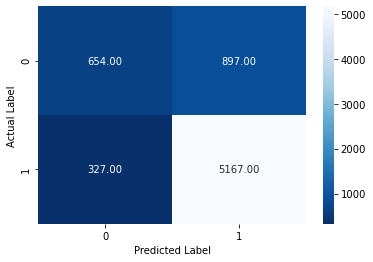

In [160]:
#Confusion Matrix
confusion_matrix = metrics.confusion_matrix(test_y, test_pred_sv)
sns.heatmap(confusion_matrix, annot = True, fmt = '.2f', cmap = 'Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [161]:
#Classification metrics scores of the model
print(metrics.classification_report(test_y, test_pred_sv))

              precision    recall  f1-score   support

           0       0.67      0.42      0.52      1551
           1       0.85      0.94      0.89      5494

    accuracy                           0.83      7045
   macro avg       0.76      0.68      0.71      7045
weighted avg       0.81      0.83      0.81      7045



#### <a>Extra Tree Model

In [162]:
#Using GridSearchCV to get best fit parameters
pm = {
      'max_depth' : [10],
       'splitter' : ['best'],
      'max_features' : [10]
     }

In [163]:
gscv_et = GridSearchCV(estimator = ExtraTreeClassifier(random_state = 123), 
                    param_grid = pm,
                    cv = 10,
                    scoring = 'roc_auc',
                    n_jobs = -1).fit(train_x, train_y)

#Using best fit parameters to fit the model
et = gscv_et.best_estimator_

In [164]:
#Making prediction on train and test data
train_pred_et = et.predict(train_x)
test_pred_et = et.predict(test_x)

In [165]:
#Calculating log loss
log_et = metrics.log_loss(test_y, et.predict_proba(test_x))

In [166]:
#Evaluating performance
print("Model Performance")
print("Train Dataset")
print("Accuracy : ", metrics.accuracy_score(train_y, train_pred_et))
print("AUC      : ", metrics.roc_auc_score(train_y, et.predict_proba(train_x)[:,1]))
print("")
print("Test Dataset")
acc_score_et = metrics.accuracy_score(test_y, test_pred_et)
print("Accuracy : ", acc_score_et)
auc_et = metrics.roc_auc_score(test_y, et.predict_proba(test_x)[:,1])
print("AUC      : ", auc_et)
print("Log Loss : ", log_et)

Model Performance
Train Dataset
Accuracy :  0.8103783915318166
AUC      :  0.7955554089206552

Test Dataset
Accuracy :  0.7853797019162526
AUC      :  0.7199535065156363
Log Loss :  0.9598578181958146


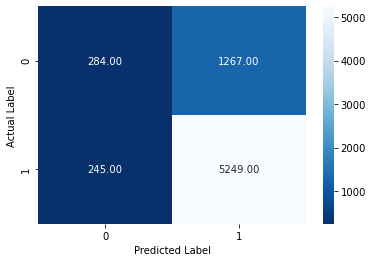

In [167]:
#Confusion Matrix
confusion_matrix = metrics.confusion_matrix(test_y, test_pred_et)
sns.heatmap(confusion_matrix, annot = True, fmt = '.2f',
            
            cmap = 'Blues_r'    
           )
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [168]:
#Classification metrics scores of the model
print(metrics.classification_report(test_y, test_pred_et))

              precision    recall  f1-score   support

           0       0.54      0.18      0.27      1551
           1       0.81      0.96      0.87      5494

    accuracy                           0.79      7045
   macro avg       0.67      0.57      0.57      7045
weighted avg       0.75      0.79      0.74      7045



#### <a>XG Boost Model

In [169]:
#Using GridSearchCV to get best fit parameters
pm = {
          'n_estimators' : [100],
          'learning_rate': [0.1]
     }


In [170]:
gscv_xg = GridSearchCV(estimator = XGBClassifier(random_state = 123), 
                    param_grid = pm,
                    cv = 10,
                    scoring = 'roc_auc',
                    n_jobs = -1).fit(train_x, train_y)

In [171]:
#Using best fit parameters to fit the model
xg = gscv_xg.best_estimator_

In [172]:
#Making prediction on train and test data
train_pred_xg = xg.predict(train_x)
test_pred_xg = xg.predict(test_x)

In [173]:
#Calculating log loss
log_xg = metrics.log_loss(test_y, xg.predict_proba(test_x))

In [174]:
#Evaluating performance
print("Model Performance")
print("Train Dataset")
print("Accuracy : ", metrics.accuracy_score(train_y, train_pred_xg))
print("AUC      : ", metrics.roc_auc_score(train_y, xg.predict_proba(train_x)[:,1]))
print("")
print("Test Dataset")
acc_score_xg = metrics.accuracy_score(test_y, test_pred_xg)
print("Accuracy : ", acc_score_xg)
auc_xg = metrics.roc_auc_score(test_y, xg.predict_proba(test_x)[:,1])
print("AUC      : ", auc_xg)
print("Log Loss : ", log_xg)

Model Performance
Train Dataset
Accuracy :  0.8870908869692177
AUC      :  0.9435254080955173

Test Dataset
Accuracy :  0.8242725337118524
AUC      :  0.841733975309094
Log Loss :  0.3874451579351977


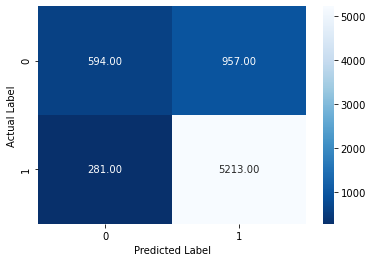

In [175]:
#Confusion Matrix
confusion_matrix = metrics.confusion_matrix(test_y, test_pred_xg)
sns.heatmap(confusion_matrix, annot = True, fmt = '.2f', cmap = 'Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [176]:
#Classification metrics scores of the model
print(metrics.classification_report(test_y, test_pred_xg))

              precision    recall  f1-score   support

           0       0.68      0.38      0.49      1551
           1       0.84      0.95      0.89      5494

    accuracy                           0.82      7045
   macro avg       0.76      0.67      0.69      7045
weighted avg       0.81      0.82      0.80      7045



#### <a>Comparing metrics of each model

In [177]:
#Getting accuracy and log loss for each model
metric_data = pd.DataFrame({'Classifiers' : ['SupportVectorClassifier', 'ExtraTreeClassifier', 'XGBClassifier','KNN Classifier','Logistic Regression '],
                        'Accuracy %' : [acc_score_sv, acc_score_et, acc_score_xg,acc_score_KNN ,acc_score_LR ],
                        'ROC_AUC_Score %' : [auc_sv, auc_et, auc_xg,auc_score_KNN , auc_score_LR],    
                        'Log_Loss' : [log_sv, log_et, log_xg,log_KNN,log_LR]})

In [178]:
metric_data[['Accuracy %','ROC_AUC_Score %']] = metric_data[['Accuracy %', 'ROC_AUC_Score %']].applymap(lambda x : round((x*100),3))

#metric_data.to_excel(output, 'Binomial Metric Data')
metric_data

,Classifiers,Accuracy %,ROC_AUC_Score %,Log_Loss
0,SupportVectorClassifier,82.626,83.996,0.389404
1,ExtraTreeClassifier,78.538,71.995,0.959858
2,XGBClassifier,82.427,84.173,0.387445
3,KNN Classifier,79.702,66.333,2.039497
4,Logistic Regression,85.266,66.333,0.342052


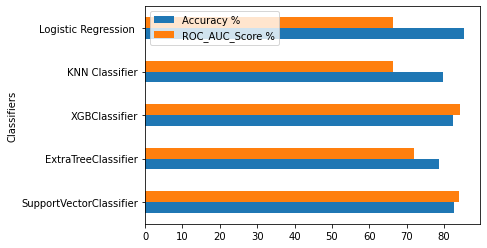

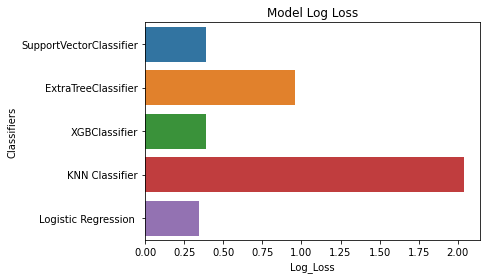

In [179]:
#Visualizing each model's accuracy and log loss metric

metric_data.plot(x = 'Classifiers', y = ['Accuracy %','ROC_AUC_Score %'], kind = 'barh')
plt.legend(loc = 2)
plt.show()

sns.barplot(data = metric_data, x = metric_data['Log_Loss'], y = metric_data.Classifiers)
plt.title('Model Log Loss')
plt.show()


<b>From above plots, Logistic Regression has highest accuracy but XGB has highest ROC AUC Score and Logistic Regression has lowest log loss. But we have Support Vector Classifier which has approximately same value as Logistic Regression .

#### Making Final Prediction

In [184]:
dtm_tfidf_test.shape

(7045, 110)

In [185]:
pd.DataFrame(lsvc_model.predict(dtm_tfidf_test))

,0
0,1
1,1
2,1
3,1
4,1
...,...
7040,1
7041,1
7042,1
7043,1


## Here dependent variable is Recommend_Flag

In [188]:
#Binary Classificaiton model
Y = yelp.Recommend_Flag
X = yelp.Review_Text

In [189]:
Y

0        1
1        1
2        0
3        1
4        1
        ..
23478    1
23479    1
23480    0
23481    1
23482    1
Name: Recommend_Flag, Length: 23483, dtype: int64

In [190]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=123)

In [191]:
#Initializing TfIdf Vectorizer
tfidf_vect = TfidfVectorizer(max_features = 2000, min_df = 0.05, max_df = 0.95,
                stop_words = stopwords.words('english'))  

In [192]:
X_train_tfidf = tfidf_vect.fit_transform(train_X)
X_test_tfidf = tfidf_vect.transform(test_X)

In [193]:
dtm_tfidf_train=pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())
dtm_tfidf_test=pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())

#### <a> Linear SVC 

In [194]:
from sklearn.svm import LinearSVC
lsvc_model = LinearSVC(C=1.0).fit(dtm_tfidf_train, train_y)  # Linear SVM, NB, KNN

In [195]:
import sklearn
print(sklearn.metrics.classification_report(train_y, lsvc_model.predict(dtm_tfidf_train)))

print(sklearn.metrics.classification_report(test_y, lsvc_model.predict(dtm_tfidf_test)))

              precision    recall  f1-score   support

           0       0.67      0.34      0.45      2933
           1       0.87      0.96      0.91     13505

    accuracy                           0.85     16438
   macro avg       0.77      0.65      0.68     16438
weighted avg       0.83      0.85      0.83     16438

              precision    recall  f1-score   support

           0       0.67      0.33      0.44      1239
           1       0.87      0.96      0.92      5806

    accuracy                           0.85      7045
   macro avg       0.77      0.65      0.68      7045
weighted avg       0.84      0.85      0.83      7045



In [230]:
acc_score_LR = metrics.accuracy_score(test_y, y_pred_class_test)
acc_score_LR

0.8526614620298084

In [197]:
auc_score_LR = metrics.roc_auc_score(test_y, y_pred_class_test) 


In [198]:
log_LR = metrics.log_loss(test_y, logreg.predict_proba(X=test_x))

#### <a> KNN Classifier 

In [199]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [200]:
param_grid = {'n_neighbors': [4,5,6,7,8,9], 'weights': ['distance','uniform']}

model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring = 'precision')
model = model.fit(train_x, train_y)

In [201]:
# make class predictions for X_test_dtm
y_pred_class_train = model.predict(train_x)
y_pred_class = model.predict(test_x)

In [235]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(train_y, y_pred_class_train))
print(metrics.accuracy_score(test_y, y_pred_class))
acc_score_KNN  = metrics.accuracy_score(test_y, y_pred_class)

0.8810682564788904
0.7970191625266146


In [203]:
# confusion matrix
print(metrics.confusion_matrix(test_y, y_pred_class))

print(metrics.classification_report(train_y, y_pred_class_train))

print(metrics.classification_report(test_y, y_pred_class))

[[ 525  714]
 [ 716 5090]]
              precision    recall  f1-score   support

           0       0.66      0.69      0.67      2933
           1       0.93      0.92      0.93     13505

    accuracy                           0.88     16438
   macro avg       0.80      0.81      0.80     16438
weighted avg       0.88      0.88      0.88     16438

              precision    recall  f1-score   support

           0       0.42      0.42      0.42      1239
           1       0.88      0.88      0.88      5806

    accuracy                           0.80      7045
   macro avg       0.65      0.65      0.65      7045
weighted avg       0.80      0.80      0.80      7045



In [204]:
auc_score_KNN  = metrics.roc_auc_score(test_y, y_pred_class_test)

In [205]:
#Calculating log loss
log_KNN = metrics.log_loss(test_y, model.predict_proba(X=test_x))

#### <a>Support Vector Classifier Model

In [206]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier
from xgboost import XGBClassifier

In [207]:
#Executing Model
sv = SVC(C = 1, random_state = 123, probability = True).fit(train_x, train_y)

#Making prediction on train and test data
train_pred_sv = sv.predict(train_x)
test_pred_sv = sv.predict(test_x)

In [208]:
#Calculating log loss
log_sv = metrics.log_loss(test_y, sv.predict_proba(test_x))

In [209]:
#Evaluating performance
print("Model Performance")
print("Train Dataset")
print("Accuracy : ", metrics.accuracy_score(train_y, train_pred_sv))
print("AUC      : ", metrics.roc_auc_score(train_y, sv.predict_proba(train_x)[:,1]))
print("")
print("Test Dataset")
acc_score_sv = metrics.accuracy_score(test_y, test_pred_sv)
print("Accuracy : ", acc_score_sv)
auc_sv = metrics.roc_auc_score(test_y, sv.predict_proba(test_x)[:,1])
print("AUC      : ", auc_sv)
print("Log Loss : ", log_sv )

Model Performance
Train Dataset
Accuracy :  0.9141623068499818
AUC      :  0.9703612822617628

Test Dataset
Accuracy :  0.8549325762952449
AUC      :  0.8426442740901191
Log Loss :  0.34623421404001603


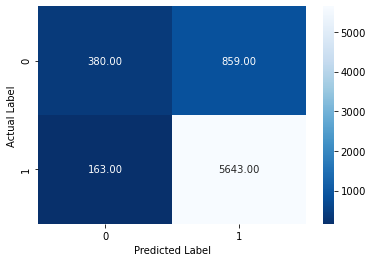

In [210]:
#Confusion Matrix
confusion_matrix = metrics.confusion_matrix(test_y, test_pred_sv)
sns.heatmap(confusion_matrix, annot = True, fmt = '.2f', cmap = 'Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [211]:
#Classification metrics scores of the model
print(metrics.classification_report(test_y, test_pred_sv))

              precision    recall  f1-score   support

           0       0.70      0.31      0.43      1239
           1       0.87      0.97      0.92      5806

    accuracy                           0.85      7045
   macro avg       0.78      0.64      0.67      7045
weighted avg       0.84      0.85      0.83      7045



#### <a>Extra Tree Model

In [212]:
#Using GridSearchCV to get best fit parameters
pm = {
      'max_depth' : [10],
       'splitter' : ['best'],
      'max_features' : [10]
     }

In [213]:
gscv_et = GridSearchCV(estimator = ExtraTreeClassifier(random_state = 123), 
                    param_grid = pm,
                    cv = 10,
                    scoring = 'roc_auc',
                    n_jobs = -1).fit(train_x, train_y)

In [214]:
#Using best fit parameters to fit the model
et = gscv_et.best_estimator_

In [215]:
#Making prediction on train and test data
train_pred_et = et.predict(train_x)
test_pred_et = et.predict(test_x)

In [216]:
#Calculating log loss
log_et = metrics.log_loss(test_y, et.predict_proba(test_x))

In [217]:
#Evaluating performance
print("Model Performance")
print("Train Dataset")
print("Accuracy : ", metrics.accuracy_score(train_y, train_pred_et))
print("AUC      : ", metrics.roc_auc_score(train_y, et.predict_proba(train_x)[:,1]))
print("")
print("Test Dataset")
acc_score_et = metrics.accuracy_score(test_y, test_pred_et)
print("Accuracy : ", acc_score_et)
auc_et = metrics.roc_auc_score(test_y, et.predict_proba(test_x)[:,1])
print("AUC      : ", auc_et)
print("Log Loss : ", log_et)

Model Performance
Train Dataset
Accuracy :  0.854909356369388
AUC      :  0.7952191312507786

Test Dataset
Accuracy :  0.8191625266146203
AUC      :  0.7135699425353028
Log Loss :  0.875438870493652


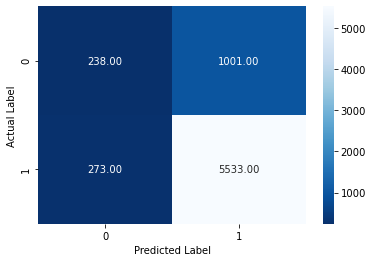

In [218]:
#Confusion Matrix
confusion_matrix = metrics.confusion_matrix(test_y, test_pred_et)
sns.heatmap(confusion_matrix, annot = True, fmt = '.2f',
            
            cmap = 'Blues_r'    
           )
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [219]:
#Classification metrics scores of the model
print(metrics.classification_report(test_y, test_pred_et))

              precision    recall  f1-score   support

           0       0.47      0.19      0.27      1239
           1       0.85      0.95      0.90      5806

    accuracy                           0.82      7045
   macro avg       0.66      0.57      0.58      7045
weighted avg       0.78      0.82      0.79      7045



#### <a>XG Boost Model

In [220]:
#Using GridSearchCV to get best fit parameters
pm = {
          'n_estimators' : [100],
          'learning_rate': [0.1]
     }


gscv_xg = GridSearchCV(estimator = XGBClassifier(random_state = 123), 
                    param_grid = pm,
                    cv = 10,
                    scoring = 'roc_auc',
                    n_jobs = -1).fit(train_x, train_y)

In [221]:
#Using best fit parameters to fit the model
xg = gscv_xg.best_estimator_

#Making prediction on train and test data
train_pred_xg = xg.predict(train_x)
test_pred_xg = xg.predict(test_x)

In [222]:
#Calculating log loss
log_xg = metrics.log_loss(test_y, xg.predict_proba(test_x))

In [223]:
#Evaluating performance
print("Model Performance")
print("Train Dataset")
print("Accuracy : ", metrics.accuracy_score(train_y, train_pred_xg))
print("AUC      : ", metrics.roc_auc_score(train_y, xg.predict_proba(train_x)[:,1]))
print("")
print("Test Dataset")
acc_score_xg = metrics.accuracy_score(test_y, test_pred_xg)
print("Accuracy : ", acc_score_xg)
auc_xg = metrics.roc_auc_score(test_y, xg.predict_proba(test_x)[:,1])
print("AUC      : ", auc_xg)
print("Log Loss : ", log_xg)

Model Performance
Train Dataset
Accuracy :  0.9001095023725514
AUC      :  0.9496236004066128

Test Dataset
Accuracy :  0.8526614620298084
AUC      :  0.8469306333905785
Log Loss :  0.34155980463677504


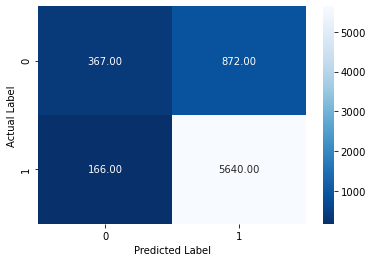

In [224]:
#Confusion Matrix
confusion_matrix = metrics.confusion_matrix(test_y, test_pred_xg)
sns.heatmap(confusion_matrix, annot = True, fmt = '.2f', cmap = 'Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


In [225]:
#Classification metrics scores of the model
print(metrics.classification_report(test_y, test_pred_xg))

              precision    recall  f1-score   support

           0       0.69      0.30      0.41      1239
           1       0.87      0.97      0.92      5806

    accuracy                           0.85      7045
   macro avg       0.78      0.63      0.66      7045
weighted avg       0.83      0.85      0.83      7045



#### <a>Comparing metrics of each model

In [236]:
#Getting accuracy and log loss for each model
metric_data = pd.DataFrame({'Classifiers' : ['SupportVectorClassifier', 'ExtraTreeClassifier', 'XGBClassifier','KNN Classifier','Logistic Regression '],
                        'Accuracy %' : [acc_score_sv, acc_score_et, acc_score_xg,acc_score_KNN ,acc_score_LR ],
                        'ROC_AUC_Score %' : [auc_sv, auc_et, auc_xg,auc_score_KNN , auc_score_LR],    
                        'Log_Loss' : [log_sv, log_et, log_xg,log_KNN,log_LR]})

In [237]:
metric_data[['Accuracy %','ROC_AUC_Score %']] = metric_data[['Accuracy %', 'ROC_AUC_Score %']].applymap(lambda x : round((x*100),3))

#metric_data.to_excel(output, 'Binomial Metric Data')
metric_data

,Classifiers,Accuracy %,ROC_AUC_Score %,Log_Loss
0,SupportVectorClassifier,85.493,84.264,0.346234
1,ExtraTreeClassifier,81.916,71.357,0.875439
2,XGBClassifier,85.266,84.693,0.341560
3,KNN Classifier,79.702,66.333,2.039497
4,Logistic Regression,85.266,66.333,0.342052


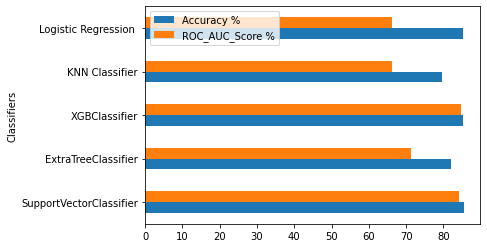

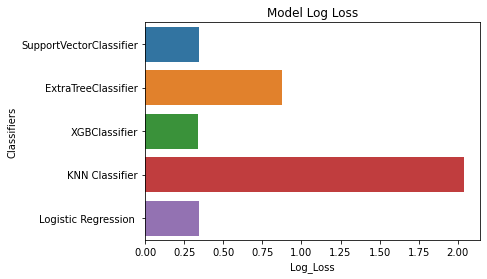

In [238]:
#Visualizing each model's accuracy and log loss metric
metric_data.plot(x = 'Classifiers', y = ['Accuracy %','ROC_AUC_Score %'], kind = 'barh')
plt.legend(loc = 2)
plt.show()

sns.barplot(data = metric_data, x = metric_data['Log_Loss'], y = metric_data.Classifiers)
plt.title('Model Log Loss')
plt.show()

<b>From above plots, XGB Classifier Model performs best. It has highest accuracy and ROC AUC Score and lowest log loss.